In [2879]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

# CREATION FONCTIONS

## FONCTION SCORE

In [2880]:
def score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred):
    from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score


    train_score = f'{r2_score( y_train,y_pred_train):.2f}'
    train_mae = f'{mean_absolute_error( y_train,y_pred_train):.2e}'
    train_mse = f'{mean_squared_error( y_train,y_pred_train):.2e}'
    train_mape = f'{mean_absolute_percentage_error( y_train,y_pred_train)*100:.2f}'

    test_score = f'{r2_score(y_test, y_pred_test):.2f}'
    test_mae = f'{mean_absolute_error(y_test, y_pred_test):.2e}'
    test_mse = f'{mean_squared_error(y_test, y_pred_test):.2e}'
    test_mape = f'{mean_absolute_percentage_error(y_test, y_pred_test)*100:.2f}'

    general_score = f'{r2_score(y, y_pred):.2f}'
    general_mae = f'{mean_absolute_error(y, y_pred):.2e}'
    general_mse = f'{mean_squared_error(y, y_pred):.2e}'
    general_mape = f'{mean_absolute_percentage_error(y, y_pred)*100:.2f}'

    return train_score,train_mae,train_mse,train_mape,\
    test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape


## FONCTION POUR LA REG LIN

In [2881]:
def reg_lin(DF,col_num,target,type,col_a_log):

    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
    from sklearn.preprocessing import RobustScaler

    X=DF[col_num]
    y_original=DF[target]
    if type=='RAS':
        y=y_original
    elif type=='log_target':
        y=np.log(y_original)
    elif type=='log_target_feature':
        y=np.log(y_original)
        X[col_a_log]=np.log(X[col_a_log])
    
    #Standardisation des features
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


    #train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



    # Créer et entraîner un modèle de régression linéaire
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)

    # Prédictions
    if type=='RAS':
        y_pred_linear = abs(linear_reg.predict(X_test))
        y_pred_linear_train=abs(linear_reg.predict(X_train))
        y_pred_linear_general=abs(linear_reg.predict(X_scaled))
    else:
        y_pred_linear = np.exp(abs(linear_reg.predict(X_test)))
        y_pred_linear_train=np.exp(abs(linear_reg.predict(X_train)))
        y_pred_linear_general=np.exp(abs(linear_reg.predict(X_scaled)))
    # Évaluation
    if type!='RAS':
        y_test=np.exp(y_test)
        y_train=np.exp(y_train)
        
    
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)
    mae_linear= mean_absolute_error(y_test,y_pred_linear)
    mape_linear = mean_absolute_percentage_error(y_test,y_pred_linear)

    print(f"Linear Regression R² Score test: {r2_linear:.2f}")
    print(f"Linear Regression MSE test: {mse_linear:.2e}")
    print(f"Linear Regression MAE test: {mae_linear:.2e}")
    print(f"Linear Regression MAPE test: {mape_linear*100:.2f} %")

    mse_linear_train = mean_squared_error(y_train, y_pred_linear_train)
    r2_linear_train = r2_score(y_train, y_pred_linear_train)
    mae_linear_train= mean_absolute_error(y_train,y_pred_linear_train)
    mape_linear_train = mean_absolute_percentage_error(y_train,y_pred_linear_train)

    print(f"Linear Regression R² Score train: {r2_linear_train:.2f}")
    print(f"Linear Regression MSE train: {mse_linear_train:.2e}")
    print(f"Linear Regression MAE train: {mae_linear_train:.2e}")
    print(f"Linear Regression MAPE train: {mape_linear_train*100:.2f} %")
    

    mse_linear_general = mean_squared_error(y_original, y_pred_linear_general)
    r2_linear_general = r2_score(y_original, y_pred_linear_general)
    mae_linear_general= mean_absolute_error(y_original, y_pred_linear_general)
    mape_linear_general = mean_absolute_percentage_error(y_original, y_pred_linear_general)

    print(f"Linear Regression R² Score general: {r2_linear_general:.2f}")
    print(f"Linear Regression MSE general: {mse_linear_general:.2e}")
    print(f"Linear Regression MAE general: {mae_linear_general:.2e}")
    print(f"Linear Regression MAPE general: {mape_linear_general*100:.2f} %")
    

    ### CREATION DE SERIES POUR LES SCORES AFIN DE COMPARER A LA FIN DE L'ETUDE
    mse_scores = pd.Series({
        'test': f'{mse_linear:.2e}',
        'train': f'{mse_linear_train:.2e}',
        'general': f'{mse_linear_general:.2e}'
    })

    # Pour les R²
    r2_scores = pd.Series({
        'test': f'{r2_linear:.2f}',
        'train': f'{r2_linear_train:.2f}',
        'general': f'{r2_linear_general:.2f}'
    })

    # Pour les mae
    mae_scores = pd.Series({
        'test': f'{mae_linear:.2e}',
        'train': f'{mae_linear_train:.2e}',
        'general': f'{mae_linear_general:.2e}'
    })

    # Pour les mape
    mape_scores = pd.Series({
        'test': f'{mape_linear*100:.2f}',
        'train': f'{mape_linear_train*100:.2f}',
        'general': f'{mape_linear_general*100:.2f}'
    })


    return X_test,y_test,y_pred_linear,y_pred_linear_train,y_pred_linear_general,mse_scores,r2_scores,\
    mape_scores,mae_scores,linear_reg


##  FONCTION DE REPRESENTATION DES PREDICTIONS

In [2882]:
def representation_predictions(y_test,y_pred,y_pred_linear):

    ### REPRESENTATION LINEAIRE VS DUMMY
    print('Représentation des prédictions linéaires et des prédictions dummy')
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Dummy Predictions')
    plt.scatter(y_test, y_pred_linear, color='red', label='Linear Regression Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Prédictions')
    plt.title('Comparaison des prédictions: Dummy vs Linear Regression')
    plt.legend()
    plt.show()

    

## FONCTION POUR L'ANALYSE DES HYPOTHESES DE LA REG LIN (PLOT DES RESIDUS/ DURBIN-WATSON/ BREUSCH-PAGAN/ QQ-PLOT/ DISTANCE DE COOK)

In [2883]:
def suite_hypothéses(X_test,y_test,y_pred_linear):
    
    import statsmodels.api as sm


    # Plot des résidus vs valeurs prédites
    print('0) Plot des résidus vs valeurs prédites')
    residus = y_test - y_pred_linear
    plt.scatter(y_pred_linear, residus)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Résidus')
    plt.title('Résidus vs Valeurs prédites')
    plt.show()




    ### DURBIN-WATSON
    print()
    print ('1) Indépendance des résidus (Test de Durbin-Watson)')
    from statsmodels.stats.stattools import durbin_watson
    dw_test = durbin_watson(residus)
    print(f"Durbin-Watson test: {dw_test}")
    if dw_test<1 or dw_test>3:
        print('Probléme')
    else:
        print('Plutot bon')


    ### HOMOSCEDASTICITE
    from statsmodels.stats.diagnostic import het_breuschpagan
    print()
    print("2) Etude de l'homoscedasticité")
    # Ajouter une constante à X
    X_avec_constante = sm.add_constant(X_test)

    # Calculer les résidus 
    residus = y_test - y_pred_linear

    # Effectuer le test de Breusch-Pagan
    test_stat, p_value, f_stat, fp_value = het_breuschpagan(residus, X_avec_constante)

    print('Statistiques du test de Breusch-Pagan:')
    print(f'p-value : {p_value:.4f}')
    print(f'statistique de test : {test_stat:.4f}')

    # Interprétation
    if p_value < 0.05:
        print("Il y a de l'hétéroscédasticité (rejet de H0)")
    else:
        print("Pas d'évidence d'hétéroscédasticité (non rejet de H0)")

    
    ### QQ-plot
    print()
    print("3) QQ-plot")
    plt.figure(figsize=(10,6))
    stats.probplot(residus, dist="norm", plot=plt)
    plt.title("Q-Q plot des résidus")
    plt.show()

    # Test de Shapiro-Wilk
    _, p_value = stats.shapiro(residus)
    print(f"p-value du test Shapiro-Wilk : {p_value}")
    if p_value < 0.05 : 
        print('résidus non normaux')
    else:
        print('résidus normaux')

    
    ### VALEURS ABERRANTES (DISTANCE DE COOK)
    print()
    print("4) Etude des valeurs aberrantes (Distance de Cook)")
    from statsmodels.stats.outliers_influence import OLSInfluence
    import statsmodels.api as sm

    # Ajuster le modèle avec statsmodels
    X_sm = sm.add_constant(X_test)
    model_sm = sm.OLS(y_test, X_sm).fit()

    # Calculer les distances de Cook
    influence = model_sm.get_influence()
    cook_distance = influence.cooks_distance[0]

    # Plot
    plt.stem(range(len(cook_distance)), cook_distance, markerfmt=',')
    plt.xlabel("Index d'observation")
    plt.ylabel("Distance de Cook")
    plt.show()
        


## FONCTION REGRESSION REGULARISEE (LASSO,RIDGE,ELASTICNET)

In [2884]:
def reg_regul(DF,col_num,target,type,log_feature,alpha=1.0,l1_ratio=0.5):
    from sklearn.linear_model import Ridge, Lasso, ElasticNet
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
    import numpy as np
    import matplotlib.pyplot as plt

    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
        y=np.log(y)
        if type=='log_target_feature':
            for col in log_feature:
                X[col]=np.log(X[col])



    # 1. Préparation des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 2. Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_scaled = scaler.transform(X)  # Pour l'évaluation générale

    # 3. Modèles avec régularisation
    # Ridge (L2)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)

    # Lasso (L1)
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)

    # ElasticNet (L1 + L2)
    elastic = ElasticNet(alpha=alpha,fit_intercept= True, l1_ratio=l1_ratio,max_iter=1000,random_state=42,selection='cyclic',tol=0.01)
    elastic.fit(X_train_scaled, y_train)

    # 4. Prédictions
    # Train
    y_pred_train_ridge = ridge.predict(X_train_scaled)
    y_pred_train_lasso = lasso.predict(X_train_scaled)
    y_pred_train_elastic = elastic.predict(X_train_scaled)

    if type!='RAS':
        y_pred_train_ridge=np.exp(y_pred_train_ridge)
        y_pred_train_lasso=np.exp(y_pred_train_lasso)
        y_pred_train_elastic=np.exp(y_pred_train_elastic)
    
    # Test
    y_pred_test_ridge = ridge.predict(X_test_scaled)
    y_pred_test_lasso = lasso.predict(X_test_scaled)
    y_pred_test_elastic = elastic.predict(X_test_scaled)

    if type!='RAS':
        y_pred_test_ridge=np.exp(y_pred_test_ridge)
        y_pred_test_lasso=np.exp(y_pred_test_lasso)
        y_pred_test_elastic=np.exp(y_pred_test_elastic)

    # Général
    y_pred_general_ridge = ridge.predict(X_scaled)
    y_pred_general_lasso = lasso.predict(X_scaled)
    y_pred_general_elastic = elastic.predict(X_scaled)

    if type!='RAS':
        y_pred_general_ridge=np.exp(y_pred_general_ridge)
        y_pred_general_lasso=np.exp(y_pred_general_lasso)
        y_pred_general_elastic=np.exp(y_pred_general_elastic)

    # 5. Fonction d'évaluation améliorée
    def evaluate_model(model_name, y_true_train, y_pred_train, 
                    y_true_test, y_pred_test, y_true_general, y_pred_general,type):
        # Suffix pour les noms selon le type de transformation
        suffix = "" if type == "RAS" else f"_{type}"
        
        # Création du dictionnaire des métriques
        metrics = {
            f'r2_{model_name}{suffix}': {
                'train': f'{r2_score(y_true_train, y_pred_train):.2f}',
                'test': f'{r2_score(y_true_test, y_pred_test):.2f}',
                'general': f'{r2_score(y_true_general, y_pred_general):.2f}'
            },
            f'mse_{model_name}{suffix}': {
                'train': f'{mean_squared_error(y_true_train, y_pred_train):.2e}',
                'test': f'{mean_squared_error(y_true_test, y_pred_test):.2e}',
                'general': f'{mean_squared_error(y_true_general, y_pred_general):.2e}'
            },
            f'mae_{model_name}{suffix}': {
                'train': f'{mean_absolute_error(y_true_train, y_pred_train):.2e}',
                'test': f'{mean_absolute_error(y_true_test, y_pred_test):.2e}',
                'general': f'{mean_absolute_error(y_true_general, y_pred_general):.2e}'
            },
            f'mape_{model_name}{suffix}': {
                'train': f'{mean_absolute_percentage_error(y_true_train, y_pred_train)*100:.2f}',
                'test': f'{mean_absolute_percentage_error(y_true_test, y_pred_test)*100:.2f}',
                'general': f'{mean_absolute_percentage_error(y_true_general, y_pred_general)*100:.2f}'
            }
        }
        
        return metrics
    
    if type!='RAS':
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)
        y=np.exp(y)

    # Dans la fonction principale
    all_metrics = {}

    # Pour chaque modèle
    for model_name, predictions in [("Ridge", [y_pred_train_ridge, y_pred_test_ridge, y_pred_general_ridge]),
                                ("Lasso", [y_pred_train_lasso, y_pred_test_lasso, y_pred_general_lasso]),
                                ("ElasticNet", [y_pred_train_elastic, y_pred_test_elastic, y_pred_general_elastic])]:
        metrics = evaluate_model(model_name, 
                            y_train, predictions[0],
                            y_test, predictions[1],
                            y, predictions[2],
                            type)
        all_metrics.update(metrics)

    # Création du DataFrame avec le format souhaité
    results_df = pd.DataFrame.from_dict(all_metrics, orient='index',\
                                         columns=['train', 'test', 'general']).sort_index()

    return ridge, lasso, elastic, results_df,y_test,y_pred_test_elastic,scaler

## FONCTION DECISION TREE

In [2885]:
def decision_tree_regressor(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2):

    from sklearn.tree import DecisionTreeRegressor, plot_tree
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])


    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

    # Création du modèle
    dt_reg = DecisionTreeRegressor(
        max_depth=5,                # Limite la profondeur de l'arbre
        min_samples_split=10,        # Minimum d'échantillons pour diviser un nœud
        min_samples_leaf=6,         # Minimum d'échantillons dans une feuille
        random_state=42
    )

    # Entraînement
    dt_reg.fit(X_train, y_train)

    # Prédictions
    y_pred_test = dt_reg.predict(X_test)
    y_pred_train=dt_reg.predict(X_train)
    y_pred=dt_reg.predict(X)
    if type!='RAS':
        y_pred_test=np.exp(y_pred_test)
        y_train=np.exp(y_train)
        y_pred_train=np.exp(y_pred_train)
        y_test=np.exp(y_test)
        y=np.exp(y)
        y_pred=np.exp(y_pred)


    # Score

    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)



    


    print(f"Score R² train : {train_score}")
    print(f"Score R² test : {test_score}")
    print(f"Score MAE train : {train_mae}")
    print(f"Score MAE test : {test_mae}")
    print(f"Score MAPE train : {train_mape} %")
    print(f"Score MAPE test : {test_mape} %")
    print(f"Score MSE train : {train_mse}")
    print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Decision Tree']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Decision Tree']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Decision Tree']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Decision Tree']

    R2=pd.concat([R2,nouvelle_ligne])


    # Visualisation de l'arbre
    plt.figure(figsize=(40,20))  # Taille doublée
    plot_tree(dt_reg, 
            feature_names=X_train.columns, 
            filled=True,
            fontsize=12,         # Taille de la police
            max_depth=5,         # Limite la visualisation aux 5 premiers niveaux
            precision=2)         # Nombre de décimales affichées
    plt.show()

    return dt_reg,MAE,MAPE,MSE,R2

## FONCTION RANDOM FOREST

In [2886]:
def random_forest(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score


    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
        
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])


    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


    # Création du modèle
    rf_reg = RandomForestRegressor(
        n_estimators=75,
        max_depth=10,           # même profondeur que notre meilleur Decision Tree
        min_samples_split=8,
        min_samples_leaf=5,
        random_state=42
    )

    # Entraînement
    rf_reg.fit(X_train, y_train)

    y_pred_test =rf_reg.predict(X_test)
    y_pred_train=rf_reg.predict(X_train)
    y_pred=rf_reg.predict(X)
    
    if type!='RAS':
        y_pred_test=np.exp(y_pred_test)
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)
        y_pred_train=np.exp(y_pred_train)
        y=np.exp(y)
        y_pred=np.exp(y_pred)
    
    
    
    
    # Score
    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)



    print(f"Score R² train : {train_score}")
    print(f"Score R² test : {test_score}")
    print(f"Score MAE train : {train_mae}")
    print(f"Score MAE test : {test_mae}")
    print(f"Score MAPE train : {train_mape} %")
    print(f"Score MAPE test : {test_mape} %")
    print(f"Score MSE train : {train_mse}")
    print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Random Forest']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Random Forest']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Random Forest']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Random Forest']

    R2=pd.concat([R2,nouvelle_ligne])

    # Feature importance
    #feature_importance = pd.DataFrame({
     #   'feature': X_train.columns,
      #  'importance': rf_reg.feature_importances_
    #})
    #print("\nImportance des features :")
    #print(feature_importance.sort_values('importance', ascending=False))

    return rf_reg,MAE,MAPE,MSE,R2

## FONCTION GRADIENT BOOSTING

In [2887]:
def gradient_boosting(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2):
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score


    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
        
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])


    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


    # Création du modèle
    gb_reg = GradientBoostingRegressor(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.05,     # learning rate réduit
        min_samples_split=12,   # augmenté
        min_samples_leaf=8,     # augmenté
        subsample=0.7,         # réduit pour plus de randomisation
        random_state=42
    )

    # Entraînement avec données log
    gb_reg.fit(X_train, y_train)

    y_pred_test=gb_reg.predict(X_test)
    y_pred_train=gb_reg.predict(X_train)
    y_pred=gb_reg.predict(X)
    
    if type!='RAS':
        y=np.exp(y)
        y_pred_test=np.exp(y_pred_test)
        y_pred_train=np.exp(y_pred_train)
        y_pred=np.exp(y_pred)
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)
    
    
    
    # Score
    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)


    print(f"Score R² train : {train_score}")
    print(f"Score R² test : {test_score}")
    print(f"Score MAE train : {train_mae}")
    print(f"Score MAE test : {test_mae}")
    print(f"Score MAPE train : {train_mape} %")
    print(f"Score MAPE test : {test_mape} %")
    print(f"Score MSE train : {train_mse}")
    print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Gradient Boosting']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Gradient Boosting']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Gradient Boosting']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Gradient Boosting']

    R2=pd.concat([R2,nouvelle_ligne])




    # Feature importance
    #feature_importance = pd.DataFrame({
     #   'feature': X_train_log.columns,
      #  'importance': gb_reg.feature_importances_
    #})
    #print("\nImportance des features :")
    #print(feature_importance.sort_values('importance', ascending=False))

    return gb_reg,MAE,MAPE,MSE,R2

## FONCTION XGBOOST

In [2888]:
def xgboost_reg(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2,verbose=True):

    import xgboost as xgb
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score



    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])
    
    

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


    # Création du modèle
    xgb_reg = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.05,     # même learning rate que notre meilleur GB
        min_child_weight=6,     # équivalent à min_samples_leaf
        subsample=0.7,          # même que notre meilleur GB
        colsample_bytree=0.8,   # échantillonnage des features
        reg_alpha=0.1,          # régularisation L1
        reg_lambda=1,           # régularisation L2
        random_state=42
    )

    # Entraînement avec données log
    xgb_reg.fit(X_train, y_train)

    y_pred_test=xgb_reg.predict(X_test)
    y_pred_train=xgb_reg.predict(X_train)
    y_pred=xgb_reg.predict(X)

    if type!='RAS':
        y=np.exp(y)
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)
        y_pred_test=np.exp(y_pred_test)
        y_pred_train=np.exp(y_pred_train)
        y_pred=np.exp(y_pred)
    
    
    
    
    
    
    # Score
    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)


    if verbose:
        print(f"Score R² train : {train_score}")
        print(f"Score R² test : {test_score}")
        print(f"Score MAE train : {train_mae}")
        print(f"Score MAE test : {test_mae}")
        print(f"Score MAPE train : {train_mape} %")
        print(f"Score MAPE test : {test_mape} %")
        print(f"Score MSE train : {train_mse}")
        print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['XGBoost']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['XGBoost']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['XGBoost']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['XGBoost']

    R2=pd.concat([R2,nouvelle_ligne])


    # Feature importance
    #feature_importance = pd.DataFrame({
     #   'feature': X_train_log.columns,
      #  'importance': xgb_reg.feature_importances_
    #})
    #print("\nImportance des features :")
    #print(feature_importance.sort_values('importance', ascending=False))

    return xgb_reg,MAE,MAPE,MSE,R2

## FONCTION SVR

In [2889]:
def svr_reg(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2,verbose=True,\
            params={'kernel':'rbf','C':1.0,'epsilon':0.1,'gamma':'scale'}):
    from sklearn.svm import SVR
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score



    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
    
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])


    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


    # Scaling des données log-transformées
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_scaled= scaler.transform(X)

    # Scaling de y aussi
    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

    # Création du modèle
    svr = SVR(
        kernel=params['kernel'],
        C=params['C'],
        epsilon=params['epsilon'],
        gamma=params['gamma']
    )

    # Entraînement
    svr.fit(X_train_scaled, y_train_scaled)

    # Prédictions
    y_train_pred_scaled = svr.predict(X_train_scaled)
    y_test_pred_scaled = svr.predict(X_test_scaled)
    y_pred_scaled = svr.predict(X_scaled)

    # Retransformation pour calculer le R²
    y_pred_train = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
    y_pred_test = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()

    if type!='RAS':
        y=np.exp(y)
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)

        y_pred_train=np.exp(y_pred_train)
        y_pred_test=np.exp(y_pred_test)
        y_pred = np.exp(y_pred)

    # Score
    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)


    if verbose:
        print(f"Score R² train : {train_score}")
        print(f"Score R² test : {test_score}")
        print(f"Score MAE train : {train_mae}")
        print(f"Score MAE test : {test_mae}")
        print(f"Score MAPE train : {train_mape} %")
        print(f"Score MAPE test : {test_mape} %")
        print(f"Score MSE train : {train_mse}")
        print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['SVR']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['SVR']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['SVR']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['SVR']

    R2=pd.concat([R2,nouvelle_ligne])

    return MAE,MAPE,MSE,R2,svr,scaler,scaler_y

## FONCTION NEURAL NETWORK

In [2890]:
def nn_reg_fonc(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2):

    from sklearn.neural_network import MLPRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score




    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
    
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])


    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


    # Scaling des données log-transformées
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_scaled = scaler.transform(X)

    # Scaling de y aussi
    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

    # Création du modèle
    nn_reg = MLPRegressor(
        hidden_layer_sizes=(24, 12, 6),  # Architecture pyramidale
        activation='relu',
        solver='adam',
        alpha=0.05,                      # Régularisation modérée
        batch_size=32,                   # Batch size explicite
        learning_rate='adaptive',
        learning_rate_init=0.005,        # Learning rate modéré
        early_stopping=True,             # Arrêt précoce
        validation_fraction=0.1,         # 10% des données pour validation
        n_iter_no_change=10,            # Patience pour early stopping
        max_iter=1000,
        random_state=42
    )

    # Entraînement
    nn_reg.fit(X_train_scaled, y_train_scaled)

    # Prédictions
    y_train_pred_scaled = nn_reg.predict(X_train_scaled)
    y_test_pred_scaled = nn_reg.predict(X_test_scaled)
    y_pred_scaled = nn_reg.predict(X_scaled)

    # Retransformation pour les scores
    y_pred_train = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
    y_pred_test = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    if type!='RAS':
        y=np.exp(y)
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)

        y_pred_train=np.exp(y_pred_train)
        y_pred_test=np.exp(y_pred_test)
        y_pred=np.exp(y_pred)



    # Score
    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)



    print(f"Score R² train : {train_score}")
    print(f"Score R² test : {test_score}")
    print(f"Score MAE train : {train_mae}")
    print(f"Score MAE test : {test_mae}")
    print(f"Score MAPE train : {train_mape} %")
    print(f"Score MAPE test : {test_mape} %")
    print(f"Score MSE train : {train_mse}")
    print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['NN']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['NN']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['NN']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['NN']

    R2=pd.concat([R2,nouvelle_ligne])

    return nn_reg,MAE,MAPE,MSE,R2,scaler,scaler_y

## TABLEAU DES SCORES


In [2891]:
Tableau_score_r2=pd.DataFrame(columns=['train','test','general'])
Tableau_score_mae=pd.DataFrame(columns=['train','test','general'])
Tableau_score_mape=pd.DataFrame(columns=['train','test','general'])
Tableau_score_mse=pd.DataFrame(columns=['train','test','general'])
Tableau_score_feature=pd.DataFrame(columns=['Nbre Feature Pertinentes'])

# DEBUT DE L'ETUDE

In [2892]:
DF_cleaned=pd.read_csv('DF_nettoyé.csv')

In [2893]:
DF_cleaned.head()

,BuildingType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,...,%_elec(kBtu),%_gas(kBtu),%_steam(kBtu),%_parking,%_immeuble,PrimaryPropertyType_Autres,PrimaryPropertyType_Education et Services Communautaires,PrimaryPropertyType_Immobilier Commercial,PrimaryPropertyType_Logistique et Stockage,PrimaryPropertyType_Santé
0,NonResidential,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1.0,...,55.0,18.0,28.0,0.0,100.0,0.0,0.0,1.0,0.0,0.0
1,NonResidential,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1.0,...,39.0,61.0,0.0,15.0,85.0,0.0,0.0,1.0,0.0,0.0
2,NonResidential,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1.0,...,68.0,2.0,30.0,21.0,79.0,0.0,0.0,1.0,0.0,0.0
3,NonResidential,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1.0,...,41.0,27.0,33.0,0.0,100.0,0.0,0.0,1.0,0.0,0.0
4,NonResidential,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1.0,...,38.0,62.0,0.0,35.0,65.0,0.0,0.0,1.0,0.0,0.0


In [2894]:
DF_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 36 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   BuildingType                                              1429 non-null   object 
 1   PropertyName                                              1429 non-null   object 
 2   Address                                                   1429 non-null   object 
 3   ZipCode                                                   1429 non-null   float64
 4   TaxParcelIdentificationNumber                             1429 non-null   object 
 5   CouncilDistrictCode                                       1429 non-null   int64  
 6   Neighborhood                                              1429 non-null   object 
 7   Latitude                                                  1429 non-null   float64
 8   Longitude         

In [2895]:
DF_cleaned.loc[DF_cleaned['TotalGHGEmissions']<=0]

,BuildingType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,...,%_elec(kBtu),%_gas(kBtu),%_steam(kBtu),%_parking,%_immeuble,PrimaryPropertyType_Autres,PrimaryPropertyType_Education et Services Communautaires,PrimaryPropertyType_Immobilier Commercial,PrimaryPropertyType_Logistique et Stockage,PrimaryPropertyType_Santé
1389,NonResidential,Bullitt Center,1501 E. Madison St.,98122.0,7234600195,3,CENTRAL,47.61432,-122.31257,1.0,...,100.0,-0.0,-0.0,0.0,100.0,0.0,0.0,1.0,0.0,0.0


IL Y A UNE ENTREE AVEC LA TARGET NEGATIVE CE QUI N'A AUCUN SENS DANS LE CADRE DE L'EMISSION DE GAZ A EFFET DE SERRE. ON VA DONC LA RETIRER


In [2896]:
DF_cleaned=DF_cleaned.loc[DF_cleaned['TotalGHGEmissions']>0]
DF_cleaned=DF_cleaned.reset_index()

ON VA DROP UNE COLONNE DU ONE HOT POUR LA REGRESSION LINEAIRE CAR SINON VARIABLES TROP CORELLEES

In [2897]:
DF_cleaned_lineaire=DF_cleaned.drop(['PrimaryPropertyType_Autres','index'],axis=1)


ON VA DROP SiteEnergyUseWN(kBtu) CAR PAS DISPO LORS DE L'ETUDE

In [2898]:
DF_cleaned_lineaire=DF_cleaned_lineaire.drop(['SiteEnergyUseWN(kBtu)'],axis=1)

In [2899]:
DF_cleaned_lineaire.shape

(1428, 34)

ICI ON VA SEPARER LES COLONNES NUMERIQUES DES COLONNES CATEGORIELLES

In [2900]:
col_num=[]
col_obj=[]
for col in DF_cleaned_lineaire.columns:
    if DF_cleaned_lineaire[col].dtype in ['int64','float64'] :
        col_num.append(col)
    else:
        col_obj.append(col)

ICI ON VA RETIRER LES COLONNES AVEC DES NAN DANS LES COLONNES NUMERIQUES

In [2901]:
colonne_à_retirer=[]
for col in col_num:
    if DF_cleaned_lineaire[col].isna().sum()!=0:
        colonne_à_retirer.append(col)
print(colonne_à_retirer)
for t in colonne_à_retirer:
    del(col_num[col_num.index(t)])

['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore']


# DEFINITION DE LA TARGET

In [2902]:
TARGET='TotalGHGEmissions'

In [2903]:
DF_cleaned_lineaire[TARGET].describe()

count     1428.000000
mean       168.788186
std        591.794757
min          0.400000
25%         19.670000
50%         48.035000
75%        134.717500
max      12307.160000
Name: TotalGHGEmissions, dtype: float64

ON CONSTATE QUE LES VALEURS DE LA TARGET S'ETALENT DE 0.4 A PLUS DE 12,000. IL SERA DONC NECESSAIRE DE LOG LA TARGET AFIN DE REDUIRE L'ETENDUE DES VALEURS

# VERIFICATION DES HYPOTHESES DE LA REGRESSION LINEAIRE

## 1) ETUDE DU VIF ( Variance Inflation Factor )

In [2904]:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data =DF_cleaned_lineaire[col_num]
X = sm.add_constant(data)

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

print("\n Analyse VIF (multicolinéarité)")
vif_data = calculate_vif(X.drop('const', axis=1))
print(vif_data)


 Analyse VIF (multicolinéarité)
                                             Variable           VIF
13                                         %_immeuble  5.408548e+07
12                                          %_parking  1.582927e+06
10                                        %_gas(kBtu)  5.369269e+04
9                                        %_elec(kBtu)  5.351432e+04
11                                      %_steam(kBtu)  6.634977e+03
6                                    PropertyGFATotal  3.087438e+00
5                                      NumberofFloors  2.637700e+00
15          PrimaryPropertyType_Immobilier Commercial  2.606873e+00
7                                   TotalGHGEmissions  2.344067e+00
16         PrimaryPropertyType_Logistique et Stockage  2.213534e+00
1                                 CouncilDistrictCode  2.150190e+00
14  PrimaryPropertyType_Education et Services Comm...  1.745933e+00
2                                            Latitude  1.625579e+00
4              

LES VIF N'INDIQUENT AUCUNE MULTICOLINEARITE IMPORTANTES

## 2) SCATTER PLOTS

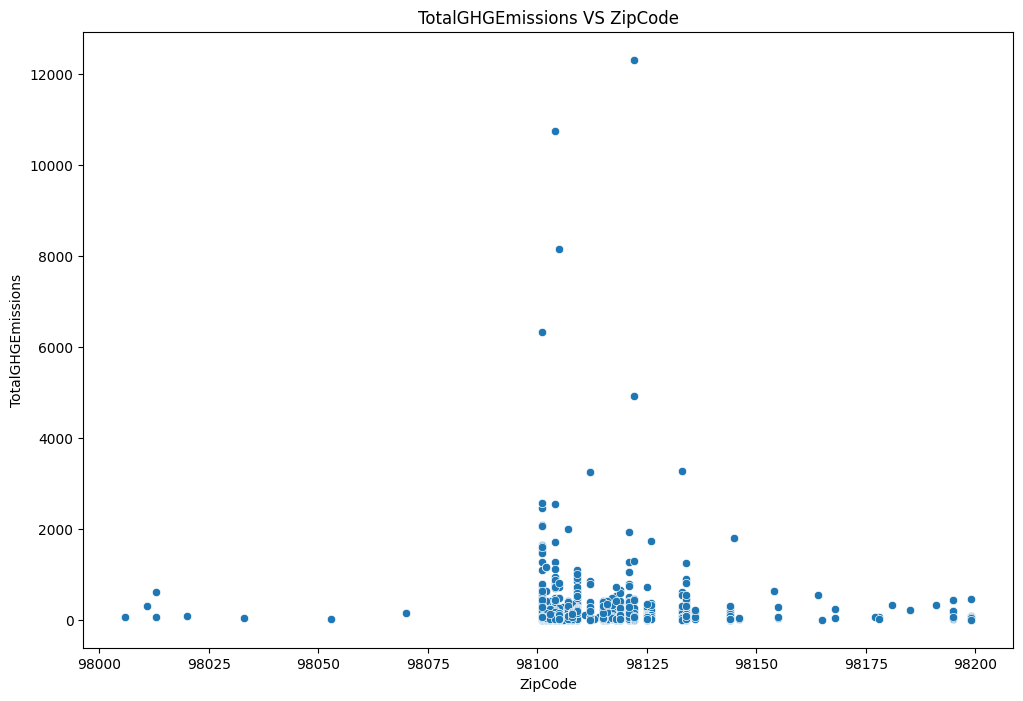

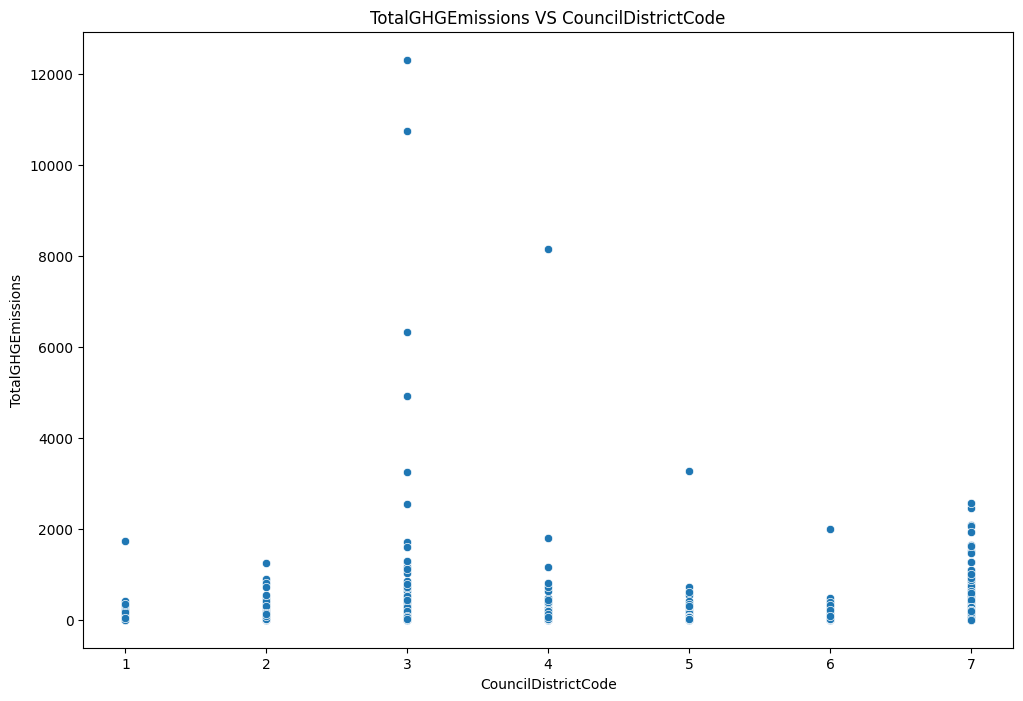

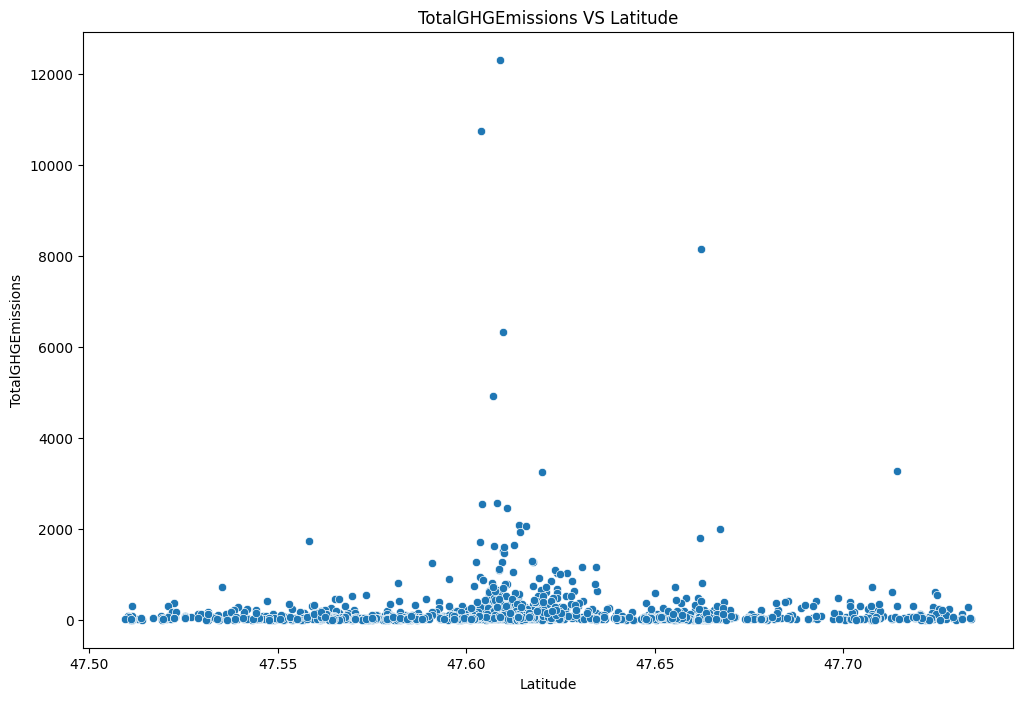

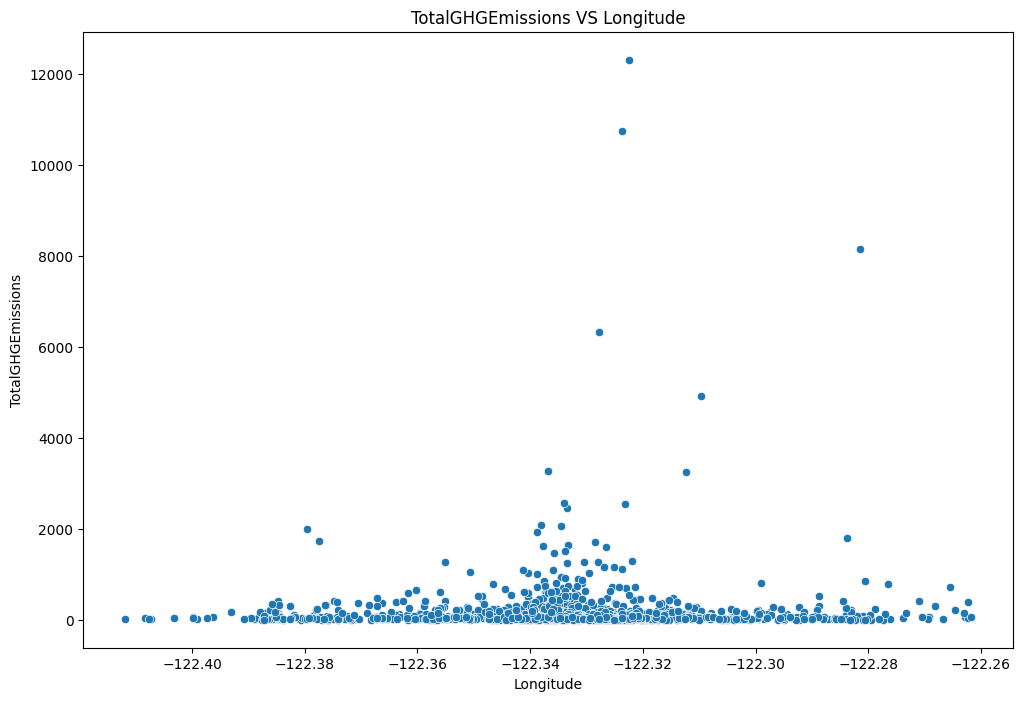

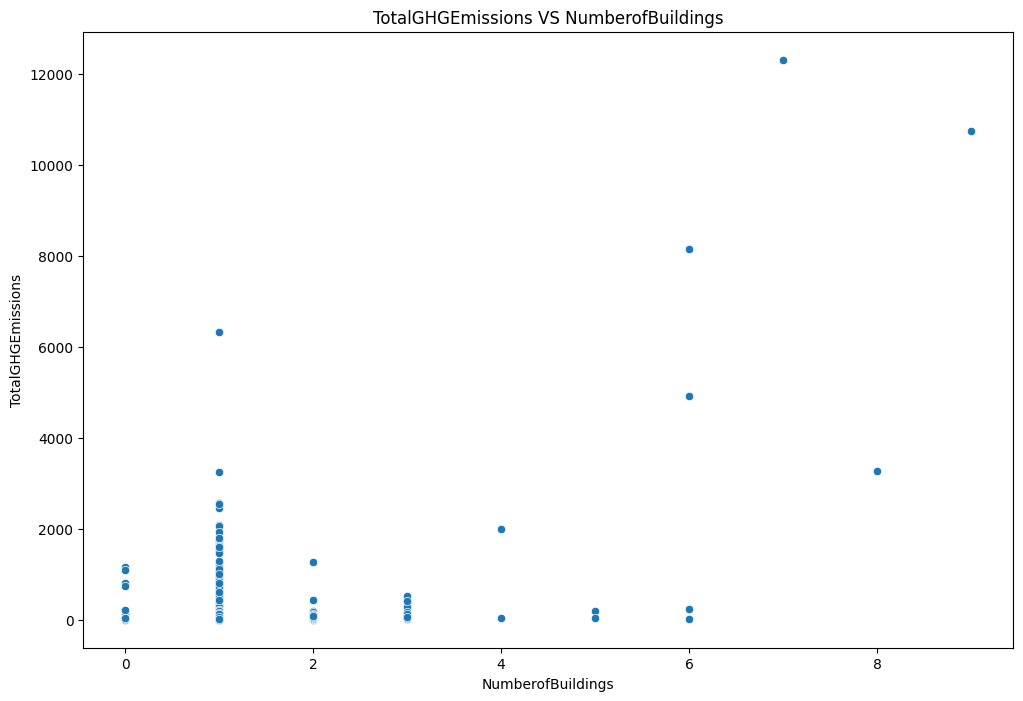

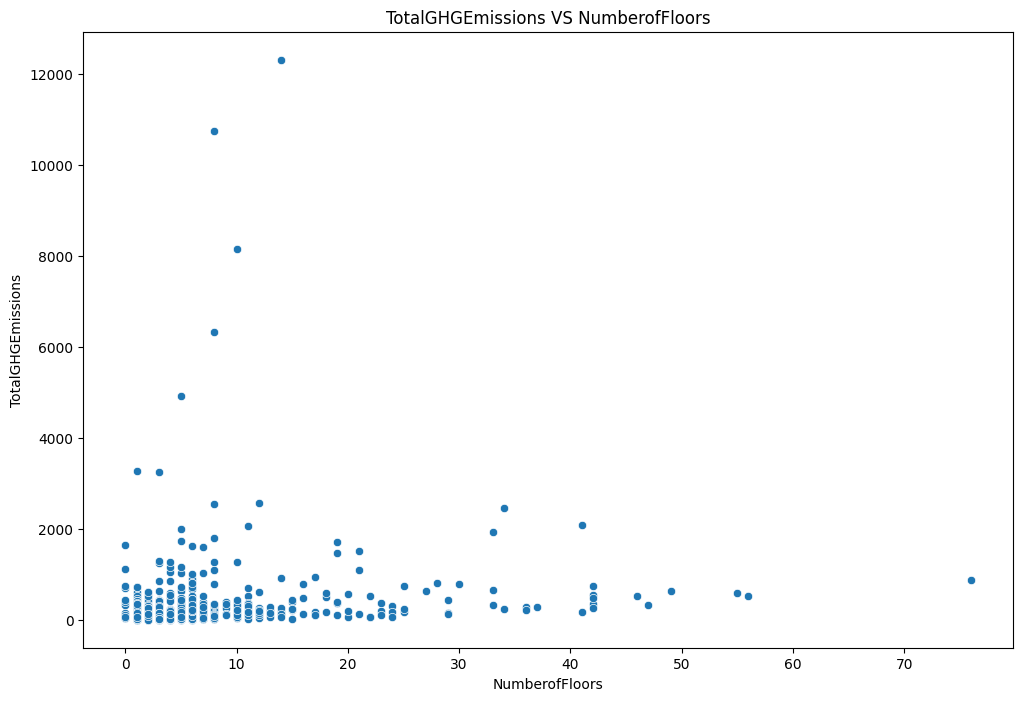

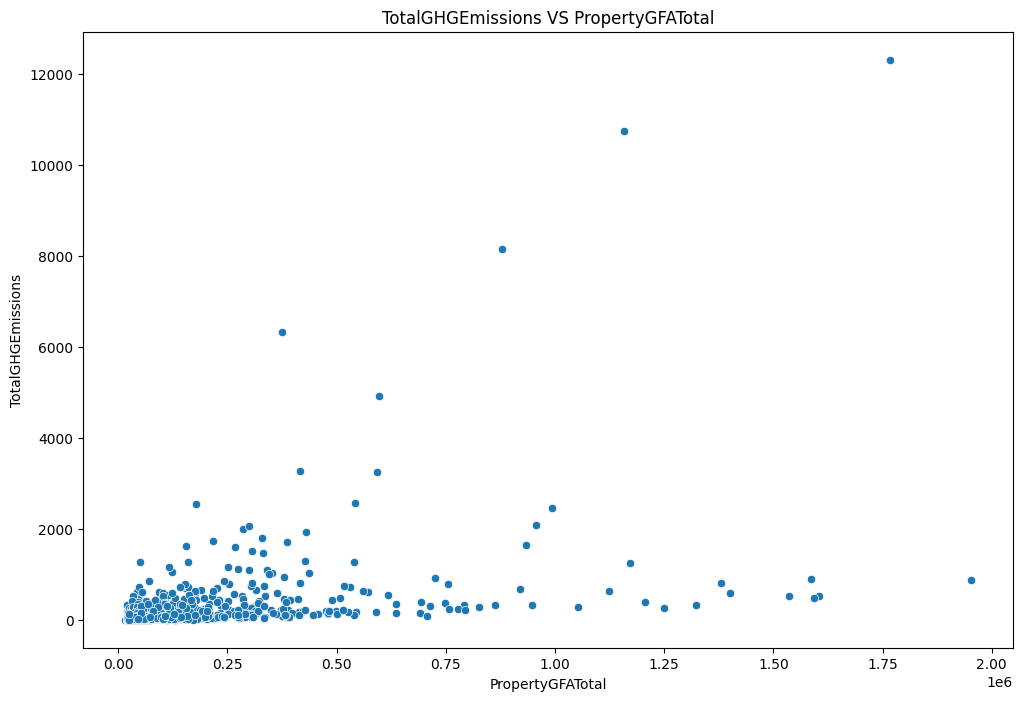

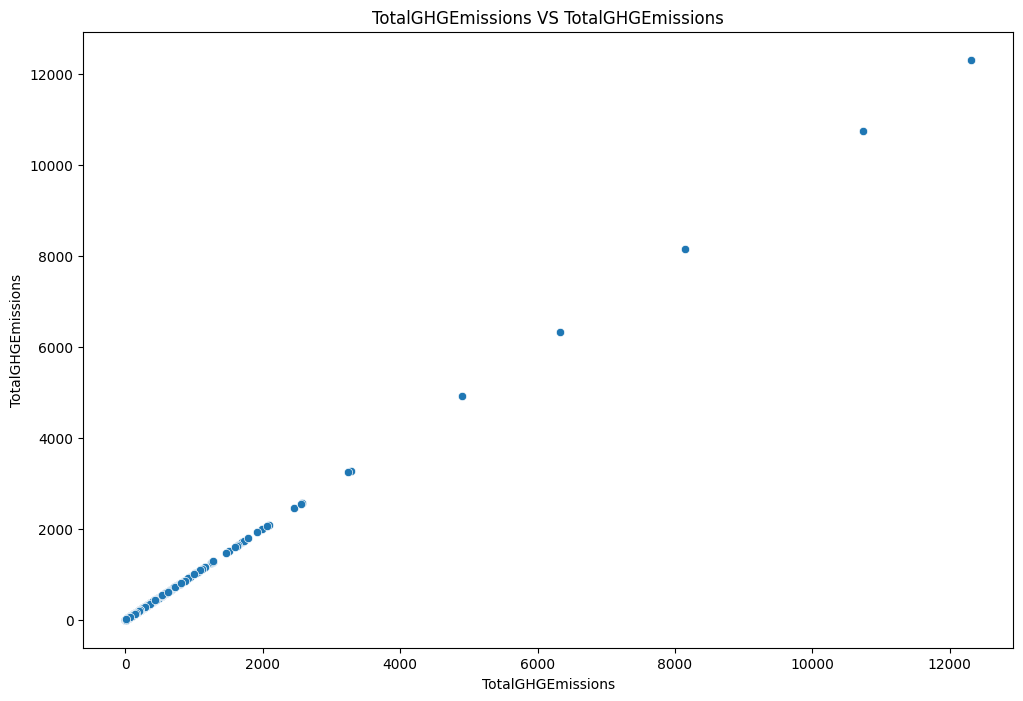

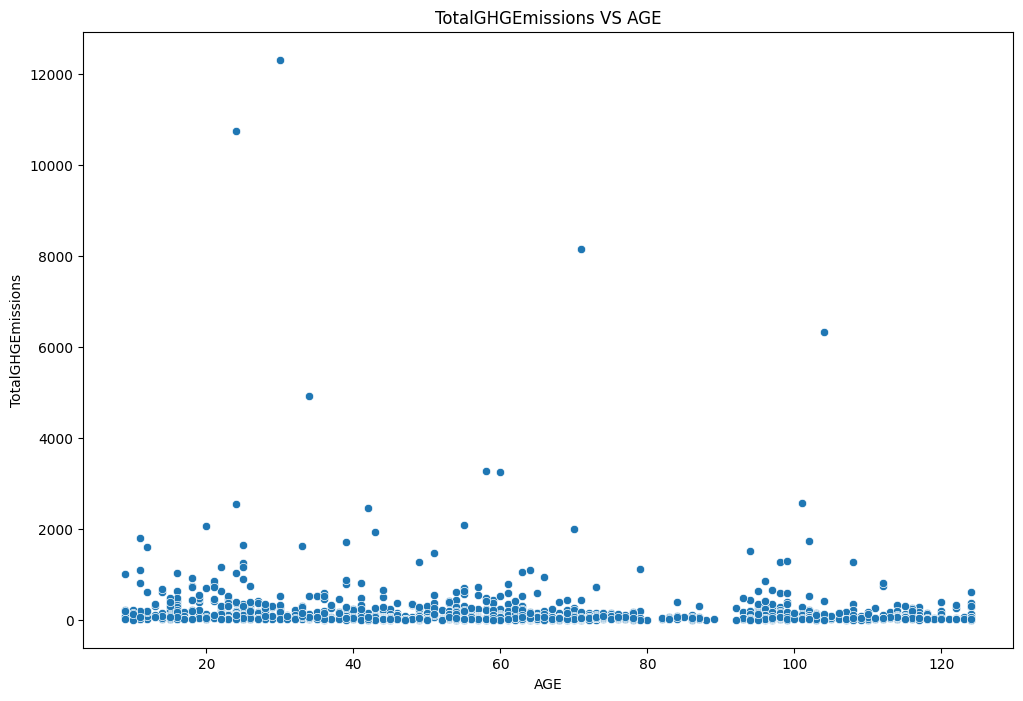

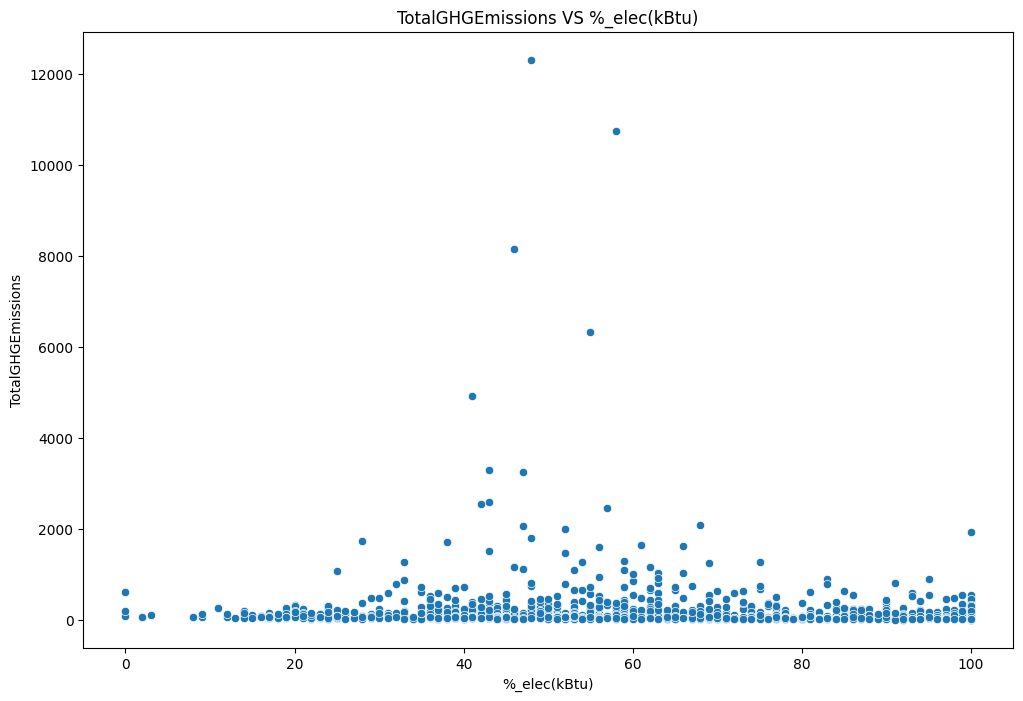

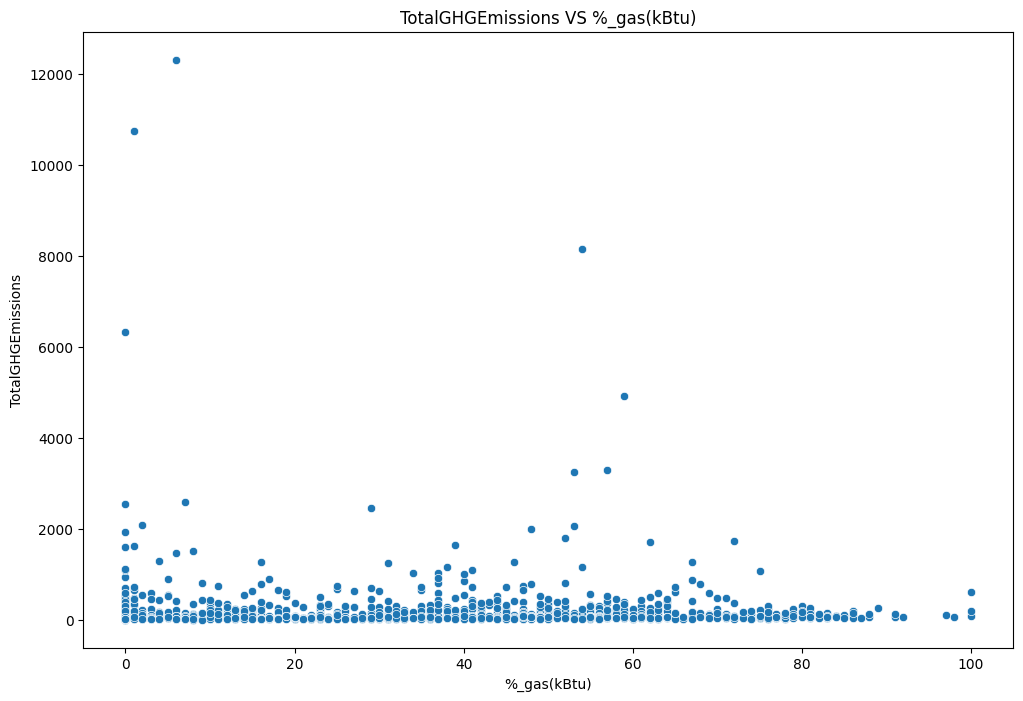

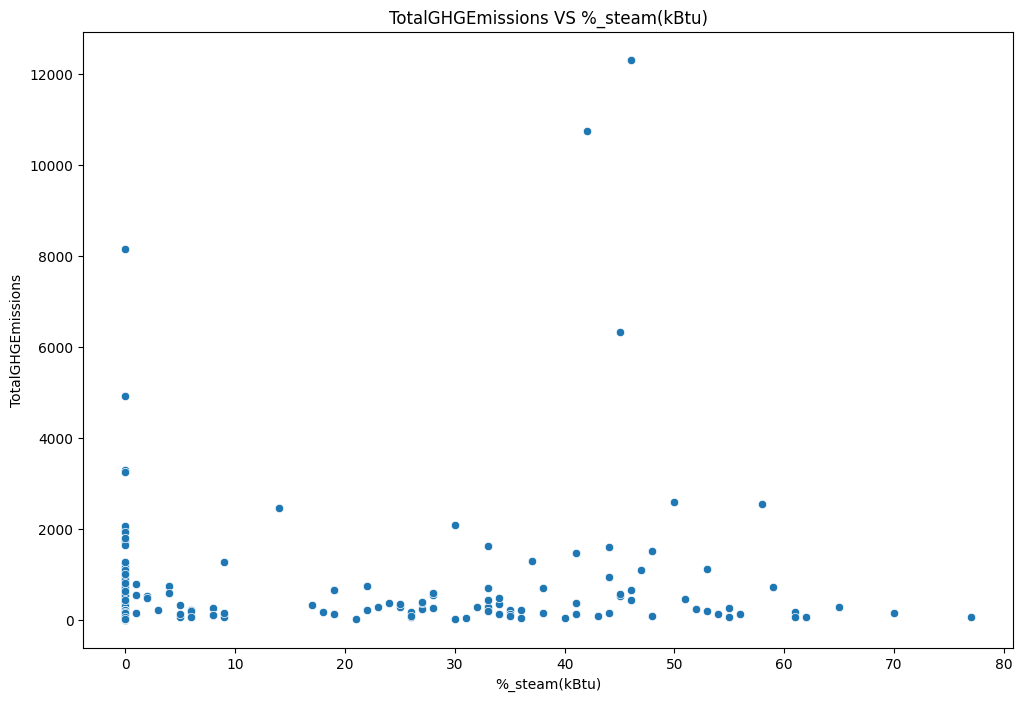

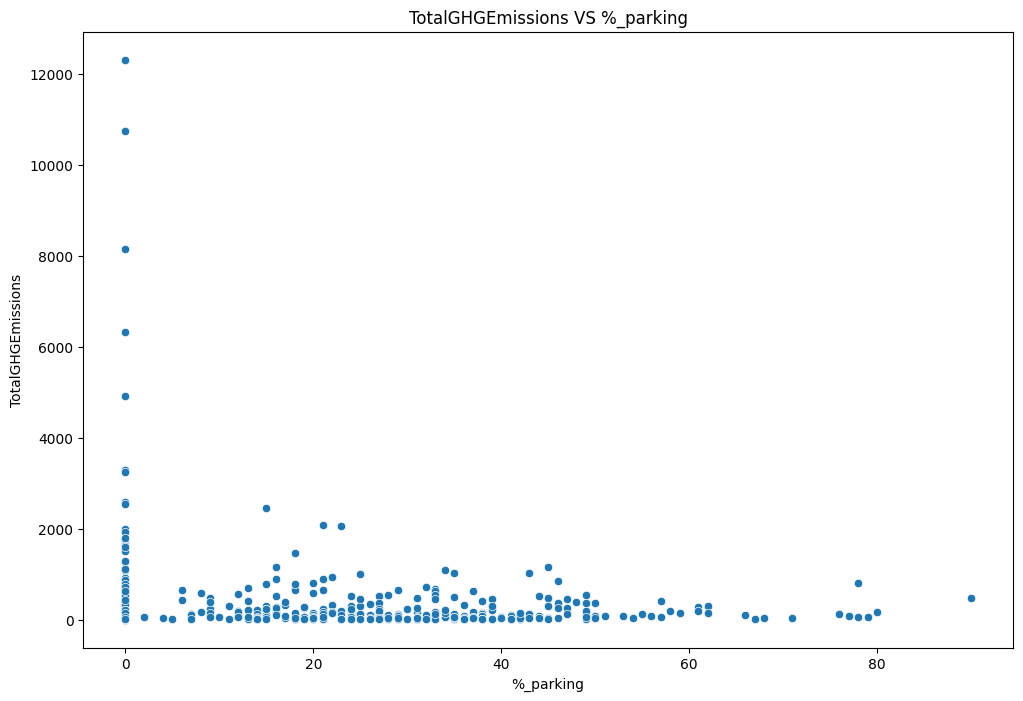

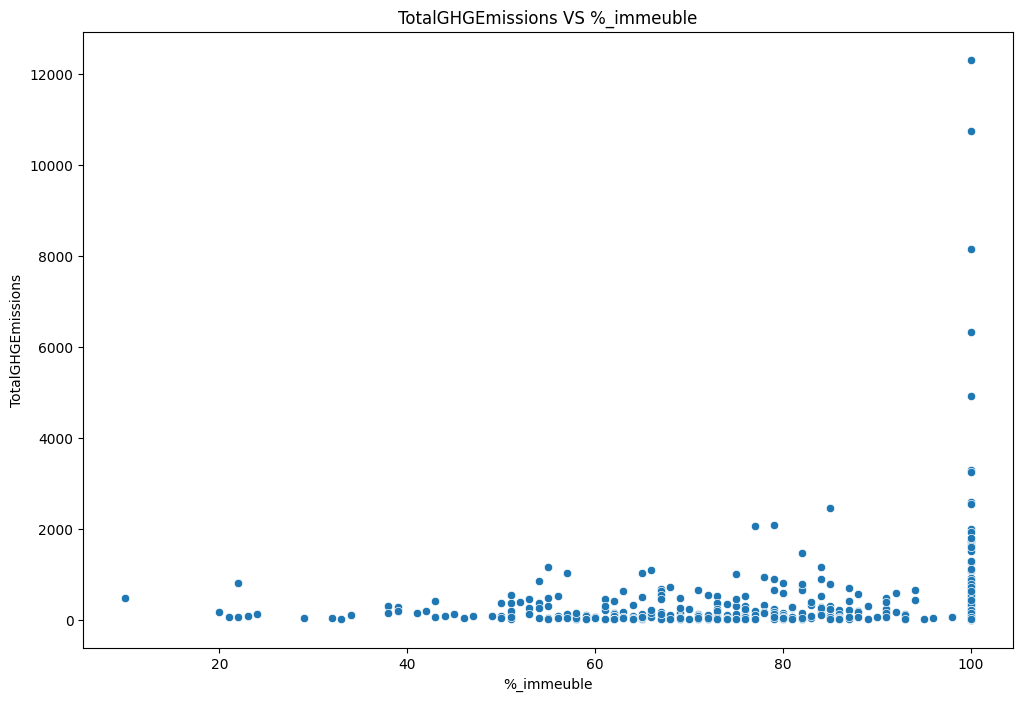

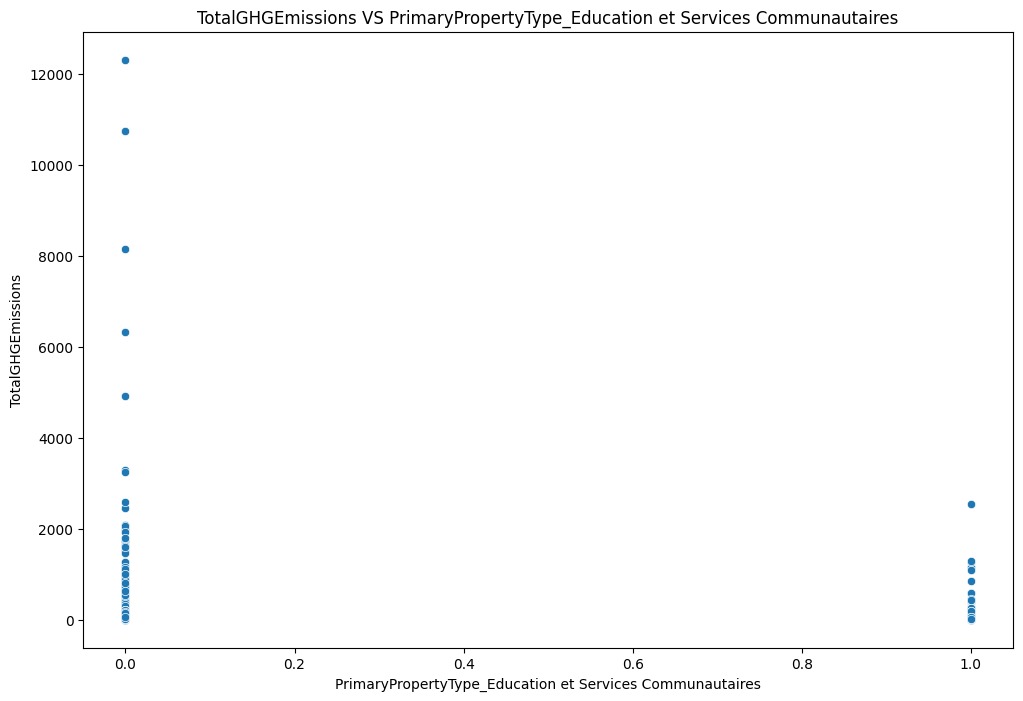

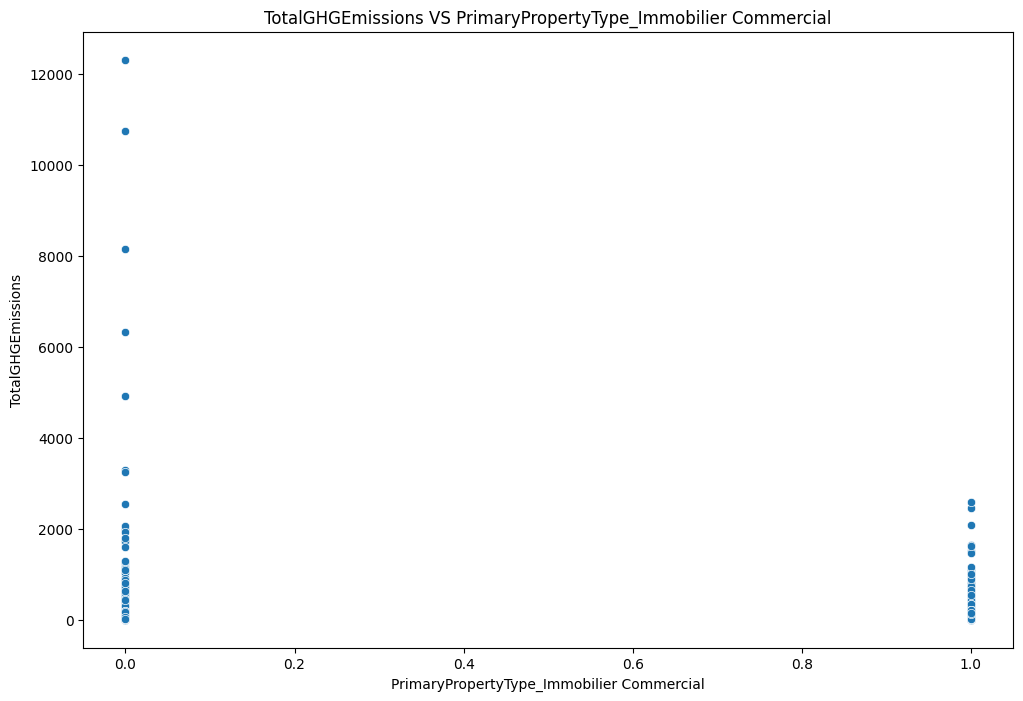

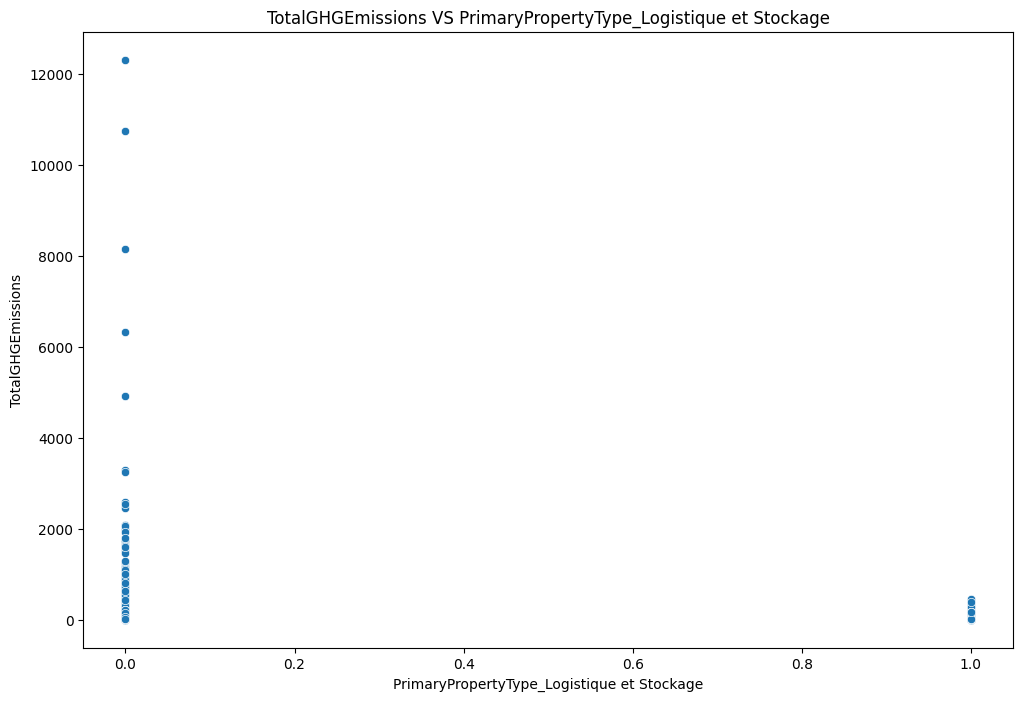

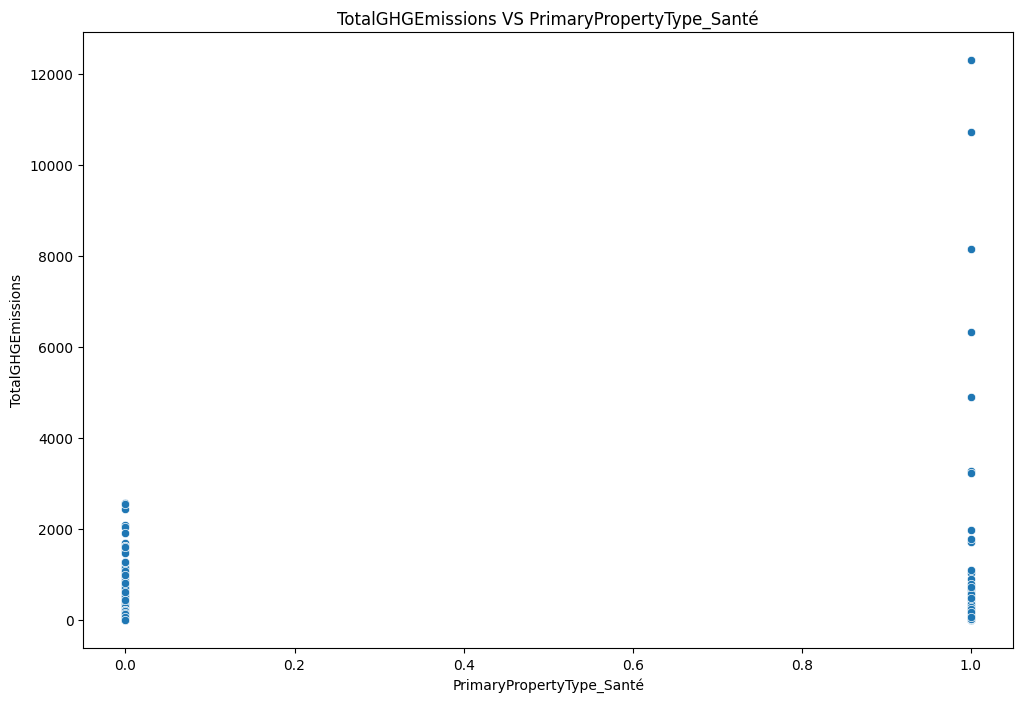

In [2905]:
for col in col_num:
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=DF_cleaned_lineaire[col],y=DF_cleaned_lineaire[TARGET])
    plt.title(f'{TARGET} VS {col}')
    plt.show()

ON CONSTATE UNE CERTAINE PSEUDO LINEARITE ENTRE LA TARGET ET LES VARIABLES NUMBER OF FLOORS ET PROPERTYGFATOTAL

## ANALYSE STATS MODELS

In [2906]:
X=DF_cleaned_lineaire[col_num].drop([TARGET],axis=1)
y=DF_cleaned_lineaire[TARGET]


X=sm.add_constant(X)

In [2907]:
model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     118.5
Date:                Tue, 12 Nov 2024   Prob (F-statistic):          3.57e-247
Time:                        16:33:27   Log-Likelihood:                -10533.
No. Observations:                1428   AIC:                         2.110e+04
Df Residuals:                    1411   BIC:                         2.119e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

## SELECTION VARIABLES

1. Analyse des corrélations

Corrélations avec SiteEnergyUse:
TotalGHGEmissions                                           1.000000
NumberofBuildings                                           0.569579
PropertyGFATotal                                            0.471924
PrimaryPropertyType_Santé                                   0.315120
%_steam(kBtu)                                               0.286214
NumberofFloors                                              0.207278
Longitude                                                   0.045229
%_gas(kBtu)                                                 0.036300
CouncilDistrictCode                                         0.033873
Latitude                                                    0.020868
%_parking                                                   0.018939
%_immeuble                                                 -0.018939
PrimaryPropertyType_Education et Services Communautaires   -0.021844
PrimaryPropertyType_Immobilier Commercial

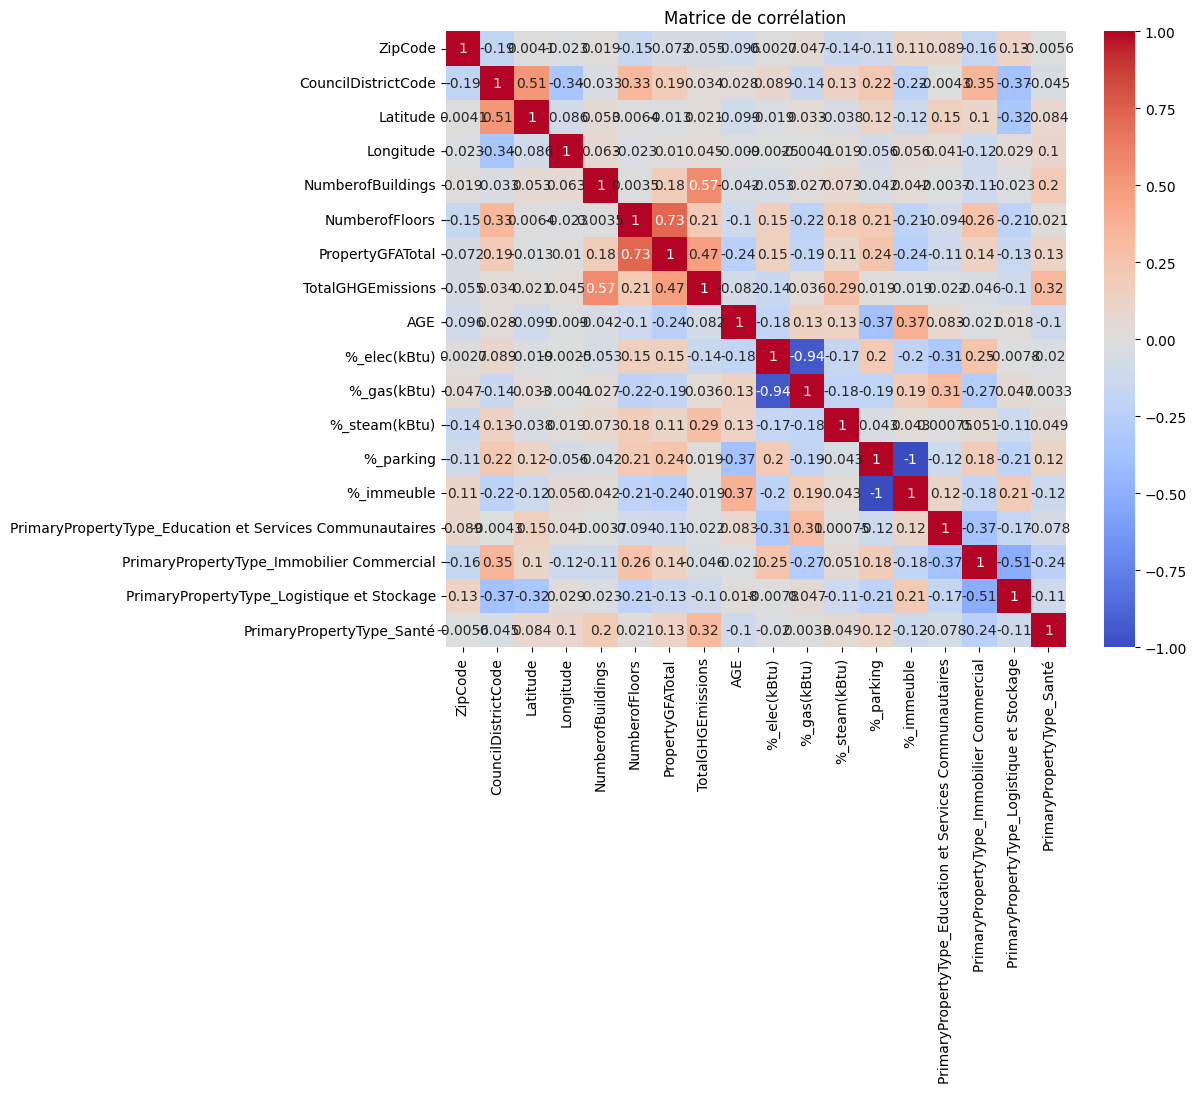

In [2908]:

from scipy import stats



data=DF_cleaned_lineaire[col_num]


# 1. Analyse des corrélations
print("1. Analyse des corrélations")
correlations = data[col_num].corr()[TARGET].sort_values(ascending=False)
print("\nCorrélations avec SiteEnergyUse:")
print(correlations)

# Visualisation de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(data[col_num].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()


In [2909]:

# 2. Test de significativité individuelle
print("\n2. Tests de significativité individuelle")
X = sm.add_constant(data.drop([TARGET],axis=1))
model = sm.OLS(data[TARGET], X).fit()
print("\nRésumé des p-values:")
p_values = pd.DataFrame({
    'Variable': X.columns,
    'P-value': model.pvalues,
    'Significatif': model.pvalues < 0.05
}).sort_values('P-value')
print(p_values)



2. Tests de significativité individuelle

Résumé des p-values:
                                                                                             Variable  \
NumberofBuildings                                                                   NumberofBuildings   
PropertyGFATotal                                                                     PropertyGFATotal   
PrimaryPropertyType_Santé                                                   PrimaryPropertyType_Santé   
NumberofFloors                                                                         NumberofFloors   
ZipCode                                                                                       ZipCode   
PrimaryPropertyType_Immobilier Commercial                   PrimaryPropertyType_Immobilier Commercial   
%_steam(kBtu)                                                                           %_steam(kBtu)   
%_gas(kBtu)                                                                               %_gas(

L'ETUDE DE SIGNIFICATIVITE NOUS MONTRE QUE QUATRES FEATURES SEMBLENT SIGNIFICATIVES : 

- NumberofBuildings

- PropertyGFATotal

- PrimaryPropertyType_Santé

- NumberofFloors

In [2910]:

# 4. Analyse des R² ajustés avec différentes combinaisons
def evaluate_feature_importance(data):
    results = []
    base_features = []
    remaining_features = list(data.drop(TARGET, axis=1).columns)
    
    while remaining_features:
        best_score = -np.inf
        best_feature = None
        
        for feature in remaining_features:
            current_features = base_features + [feature]
            X = sm.add_constant(data[current_features])
            model = sm.OLS(data[TARGET], X).fit()
            score = model.rsquared_adj
            
            results.append({
                'features': ', '.join(current_features),
                'feature_added': feature,
                'r2_adj': score
            })
            
            if score > best_score:
                best_score = score
                best_feature = feature
        
        if best_feature:
            base_features.append(best_feature)
            remaining_features.remove(best_feature)
            
    return pd.DataFrame(results)

print("\n4. Analyse progressive des caractéristiques")
feature_importance = evaluate_feature_importance(data=data)
print(feature_importance.sort_values('r2_adj', ascending=False).head())



4. Analyse progressive des caractéristiques
                                              features feature_added    r2_adj
122  NumberofBuildings, PropertyGFATotal, %_steam(k...    %_immeuble  0.569931
108  NumberofBuildings, PropertyGFATotal, %_steam(k...       ZipCode  0.569931
129  NumberofBuildings, PropertyGFATotal, %_steam(k...  %_elec(kBtu)  0.569842
121  NumberofBuildings, PropertyGFATotal, %_steam(k...  %_elec(kBtu)  0.569842
128  NumberofBuildings, PropertyGFATotal, %_steam(k...           AGE  0.569815


In [2911]:

# 5. Sélection finale des variables
def select_significant_variables(data, threshold_p_value=0.05, threshold_vif=125):
    # Première étape : sélection basée sur p-value
    X = sm.add_constant(data.drop([TARGET],axis=1))
    model = sm.OLS(data[TARGET], X).fit()
    significant_vars = X.columns[model.pvalues < threshold_p_value].tolist()
    
    
    
    # Deuxième étape : vérification VIF
    selected_vars = []
    X_significant = data[significant_vars]
    vif_data = calculate_vif(X_significant)
    
    for var in significant_vars:
        if vif_data[vif_data['Variable'] == var]['VIF'].values[0] < threshold_vif:
            selected_vars.append(var)
    #selected_vars.remove('const')
    return selected_vars

print("\n5. Sélection finale des variables")
selected_vars = select_significant_variables(data)
print("\nVariables sélectionnées:")
print(selected_vars)



5. Sélection finale des variables

Variables sélectionnées:
['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PrimaryPropertyType_Santé']


In [2912]:

# Modèle final avec les variables sélectionnées
X_final = sm.add_constant(data[selected_vars])
final_model = sm.OLS(data[TARGET], X_final).fit()
print("\nRésumé du modèle final:")
print(final_model.summary())


Résumé du modèle final:
                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     361.8
Date:                Tue, 12 Nov 2024   Prob (F-statistic):          5.59e-215
Time:                        16:33:28   Log-Likelihood:                -10640.
No. Observations:                1428   AIC:                         2.129e+04
Df Residuals:                    1423   BIC:                         2.132e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [2913]:
col_num_sel_lin=selected_vars
print(col_num_sel_lin)

['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PrimaryPropertyType_Santé']


VOILA LES VARIABLES SELECTIONNEES

### VERIFICATION DES CORRELATIONS

In [2914]:
def check_correlations(data, threshold=0.9):
    corr_matrix = data.corr().abs()
    high_corr = np.where(abs(corr_matrix) > threshold)
    pairs = [(data.columns[i], data.columns[j], corr_matrix.iloc[i,j]) 
             for i, j in zip(*high_corr) if i < j]
    if pairs:
        print("Attention : Fortes corrélations détectées")
        for var1, var2, corr in pairs:
            print(f"{var1} - {var2}: {corr:.3f}")
    return pairs

print('Voilà les features qui semblent corrélées entre elles :')
check_correlations(DF_cleaned_lineaire[col_num_sel_lin])

Voilà les features qui semblent corrélées entre elles :


[]

AUCUNE VARIABLES SELECTIONNEES NE SEMBLENT CORRELEES ENTRE ELLES

# 'TotalGHGEmissions'

CREATION DU DUMMY REGRESSOR AVEC STRATEGIE MEAN, C'EST A DIRE QUE LE DUMMY VA SE CONTENTER DE PREDIRE LA VALEUR MOYENNE DE LA TARGET

### DUMMY

In [2915]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X=DF_cleaned_lineaire[col_num_sel_lin]
y=DF_cleaned_lineaire[TARGET]

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un Dummy Regressor qui prédit la moyenne
dummy_reg = DummyRegressor(strategy="mean")

# Entraîner le modèle
dummy_reg.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_dummy = dummy_reg.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred_dummy)

print(f"Mean Squared Error: {mse}")

# Calculer la racine de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculer le coefficient de détermination R²
r2 = r2_score(y_test, y_pred_dummy)
print(f"R² Score: {r2}")


Mean Squared Error: 61448.32320984599
Root Mean Squared Error: 247.8877229913696
R² Score: -0.04878168995166421


### REGRESSION LINEAIRE AVEC SEULEMENT LES VARIABLES IMPORTANTES

In [2916]:

X_test,y_test,y_pred_linear,_,_,_,_,_,_,_=reg_lin(DF_cleaned_lineaire,col_num_sel_lin,TARGET,'RAS','None')

Linear Regression R² Score test: -0.14
Linear Regression MSE test: 6.66e+04
Linear Regression MAE test: 1.34e+02
Linear Regression MAPE test: 301.93 %
Linear Regression R² Score train: 0.53
Linear Regression MSE train: 1.97e+05
Linear Regression MAE train: 1.74e+02
Linear Regression MAPE train: 361.51 %
Linear Regression R² Score general: 0.51
Linear Regression MSE general: 1.71e+05
Linear Regression MAE general: 1.66e+02
Linear Regression MAPE general: 349.57 %


LES RESULTATS SONT TRES MAUVAIS

### REPRESENTATION

Représentation des prédictions linéaires et des prédictions dummy


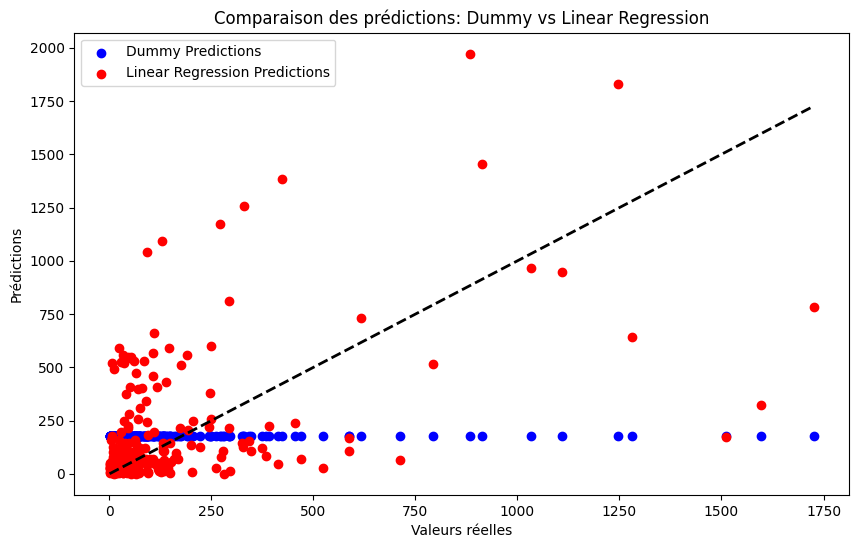

In [2917]:
representation_predictions(y_test,y_pred_dummy,y_pred_linear)

# ON CONTINUE LA VERIFICATION DES HYPOTHESES DE LA REGRESSION LINEAIRE


0) Plot des résidus vs valeurs prédites


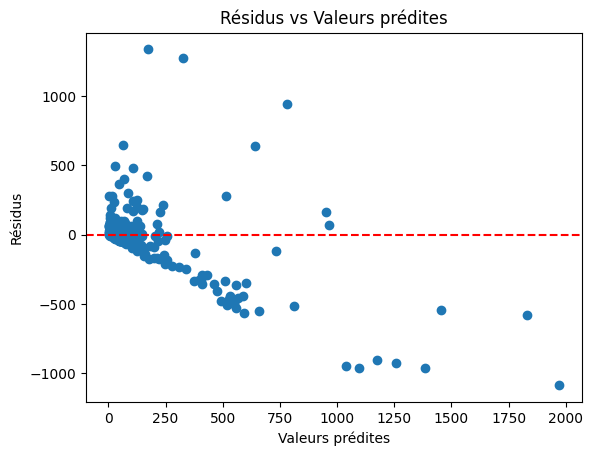


1) Indépendance des résidus (Test de Durbin-Watson)
Durbin-Watson test: 1.9257480887789615
Plutot bon

2) Etude de l'homoscedasticité
Statistiques du test de Breusch-Pagan:
p-value : 0.0000
statistique de test : 113.8463
Il y a de l'hétéroscédasticité (rejet de H0)

3) QQ-plot


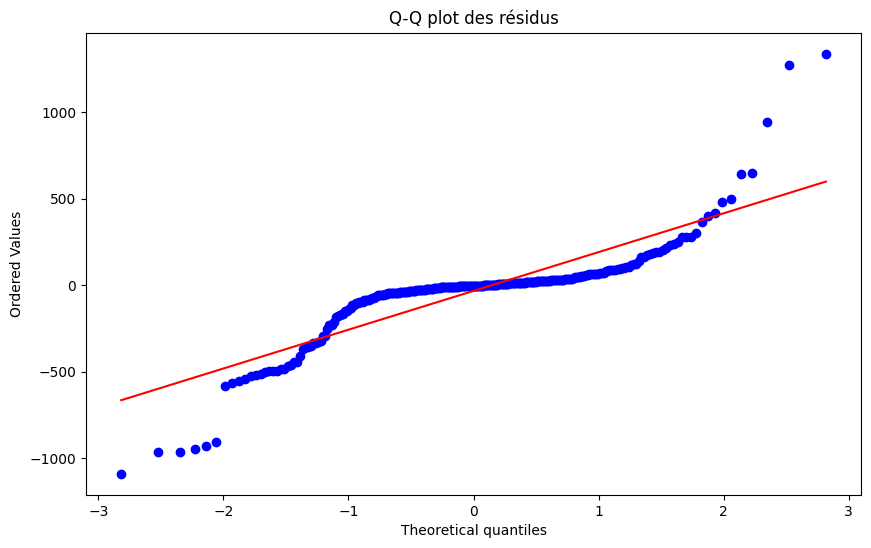

p-value du test Shapiro-Wilk : 4.7740908135528785e-20
résidus non normaux

4) Etude des valeurs aberrantes (Distance de Cook)


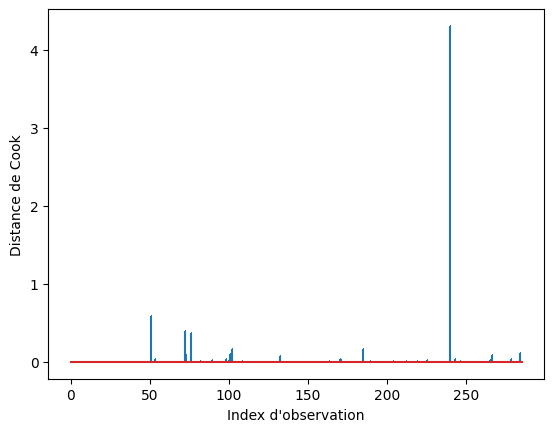

In [2918]:
suite_hypothéses(X_test,y_test,y_pred_linear)

# ON VA MAINTENANT LOG LA VARIABLE CIBLE

In [2919]:
X_test,y_test,y_pred_linear,_,_,_,_,_,_,_=\
    reg_lin(DF_cleaned_lineaire,col_num_sel_lin,TARGET,'log_target','None')

Linear Regression R² Score test: -237.79
Linear Regression MSE test: 1.40e+07
Linear Regression MAE test: 3.09e+02
Linear Regression MAPE test: 212.53 %
Linear Regression R² Score train: -10.53
Linear Regression MSE train: 4.87e+06
Linear Regression MAE train: 2.34e+02
Linear Regression MAPE train: 209.75 %
Linear Regression R² Score general: -18.14
Linear Regression MSE general: 6.70e+06
Linear Regression MAE general: 2.49e+02
Linear Regression MAPE general: 210.31 %


Représentation des prédictions linéaires et des prédictions dummy


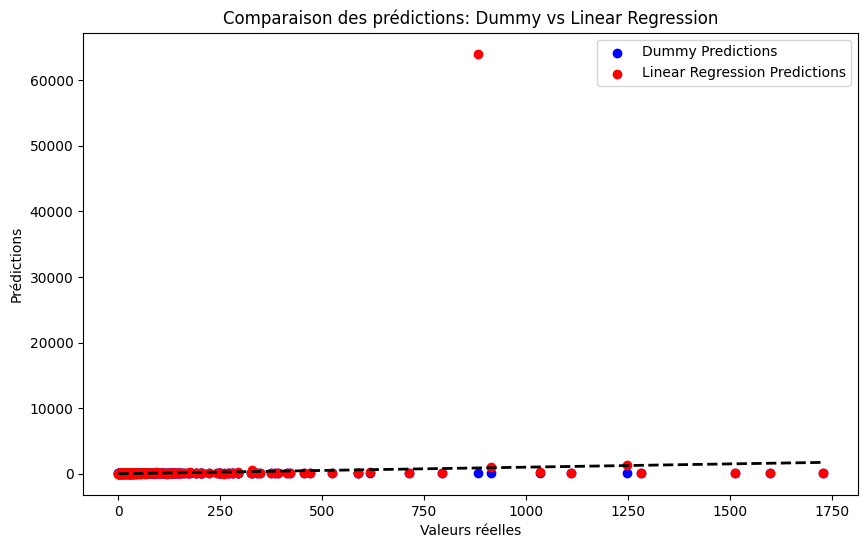

In [2920]:
representation_predictions(y_test,y_pred_dummy,y_pred_linear)

LES RESULTATS SONT TRES MAUVAIS AVEC CETTE APPROCHE

# ON VA MAINTENANT LOG LA VARIABLE PropertyGFATotal EN PLUS DE LA CIBLE


In [2921]:
X_test,y_test,y_pred_linear,_,_,mse_log_target_feature,r2_log_target_feature,mape_log_target_feature,\
    mae_log_target_feature,_=reg_lin(DF_cleaned_lineaire,col_num_sel_lin,TARGET,
                                     'log_target_feature','PropertyGFATotal')

Linear Regression R² Score test: 0.30
Linear Regression MSE test: 4.09e+04
Linear Regression MAE test: 8.79e+01
Linear Regression MAPE test: 158.90 %
Linear Regression R² Score train: 0.67
Linear Regression MSE train: 1.41e+05
Linear Regression MAE train: 1.21e+02
Linear Regression MAPE train: 168.38 %
Linear Regression R² Score general: 0.65
Linear Regression MSE general: 1.21e+05
Linear Regression MAE general: 1.15e+02
Linear Regression MAPE general: 166.48 %


ON OBTIENT DES RESULTATS MEILLEURS QU'AU DEPART MEME SI CES DERNIERS NE SONT PAS EXCEPTIONNELS LOIN DE LA 


Représentation des prédictions linéaires et des prédictions dummy


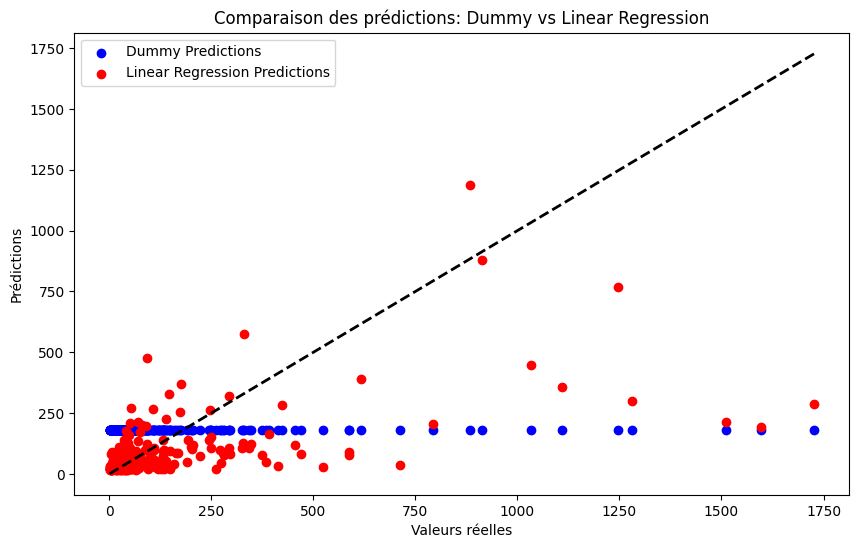

In [2922]:
representation_predictions(y_test,y_pred_dummy,y_pred_linear)

0) Plot des résidus vs valeurs prédites


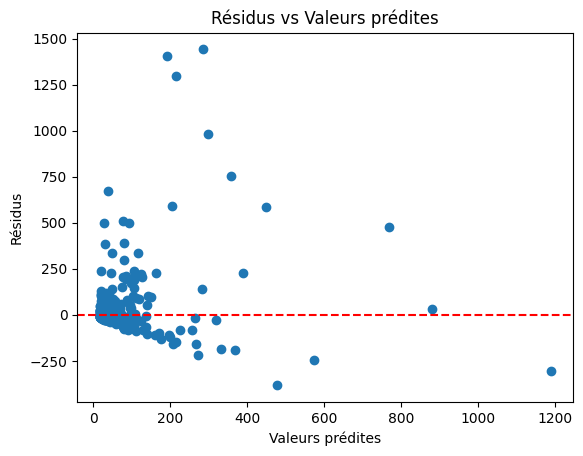


1) Indépendance des résidus (Test de Durbin-Watson)
Durbin-Watson test: 1.8171967991213092
Plutot bon

2) Etude de l'homoscedasticité
Statistiques du test de Breusch-Pagan:
p-value : 0.0000
statistique de test : 29.7805
Il y a de l'hétéroscédasticité (rejet de H0)

3) QQ-plot


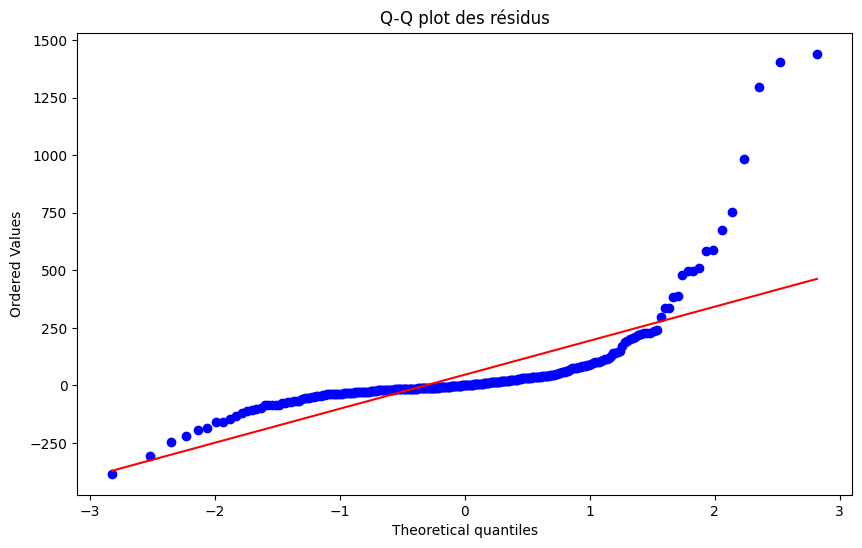

p-value du test Shapiro-Wilk : 3.685377705259462e-26
résidus non normaux

4) Etude des valeurs aberrantes (Distance de Cook)


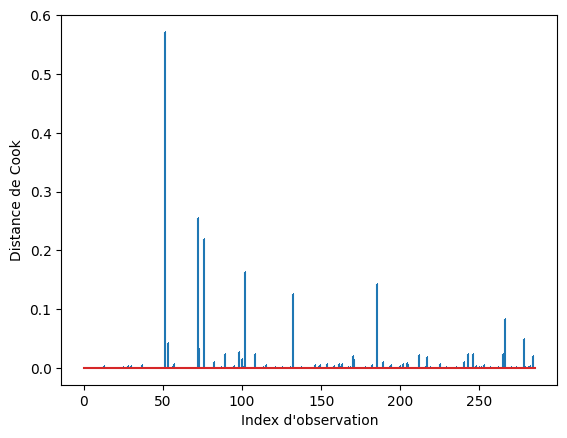

In [2923]:
suite_hypothéses(X_test,y_test,y_pred_linear)

In [2924]:
nouvelle_ligne=r2_log_target_feature.to_frame().T
nouvelle_ligne.index=['Reg_lin']

Tableau_score_r2=pd.concat([Tableau_score_r2,nouvelle_ligne])

nouvelle_ligne=mae_log_target_feature.to_frame().T
nouvelle_ligne.index=['Reg_lin']

Tableau_score_mae=pd.concat([Tableau_score_mae,nouvelle_ligne])

nouvelle_ligne=mape_log_target_feature.to_frame().T
nouvelle_ligne.index=['Reg_lin']

Tableau_score_mape=pd.concat([Tableau_score_mape,nouvelle_ligne])

nouvelle_ligne=mse_log_target_feature.to_frame().T
nouvelle_ligne.index=['Reg_lin']

Tableau_score_mse=pd.concat([Tableau_score_mse,nouvelle_ligne])

nouvelle_ligne=pd.Series([len(col_num_sel_lin)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['Reg_lin']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])


# REGRESSION REGULARISEE

In [2925]:
del(col_num[col_num.index(TARGET)])
print(col_num)

['ZipCode', 'CouncilDistrictCode', 'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'AGE', '%_elec(kBtu)', '%_gas(kBtu)', '%_steam(kBtu)', '%_parking', '%_immeuble', 'PrimaryPropertyType_Education et Services Communautaires', 'PrimaryPropertyType_Immobilier Commercial', 'PrimaryPropertyType_Logistique et Stockage', 'PrimaryPropertyType_Santé']


## REGRESSION AVEC TOUTES LES FEATURES

In [2926]:
ridge,lasso,elastic,resultats,_,_,_=\
    reg_regul(DF_cleaned_lineaire,col_num,TARGET,type='RAS',log_feature=['None'])

ETUDE DES COEFFICIENTS DES FEATURES


Comparaison des coefficients:
                                                         Ridge       Lasso  \
PropertyGFATotal                                    335.693194  332.921183   
NumberofBuildings                                   278.072760  277.973805   
%_steam(kBtu)                                       139.696308  133.247205   
PrimaryPropertyType_Santé                           109.639694  107.875650   
NumberofFloors                                     -133.639019 -130.411918   
%_elec(kBtu)                                        -61.221798  -76.853743   
%_parking                                           -20.786169  -39.769129   
PrimaryPropertyType_Immobilier Commercial            26.562300   23.192460   
AGE                                                 -18.156112  -16.370837   
PrimaryPropertyType_Logistique et Stockage          -10.949781  -11.168684   
ZipCode                                             -15.236142  -13.844699   
%_immeuble                       

<Figure size 1200x600 with 0 Axes>

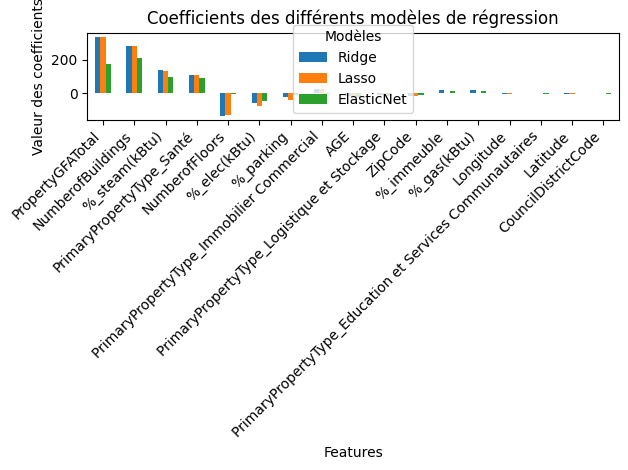


Variables sélectionnées par Lasso (coefficients non nuls):
                                              Feature  Coefficient
6                                    PropertyGFATotal   332.921183
4                                   NumberofBuildings   277.973805
10                                      %_steam(kBtu)   133.247205
5                                      NumberofFloors  -130.411918
16                          PrimaryPropertyType_Santé   107.875650
8                                        %_elec(kBtu)   -76.853743
11                                          %_parking   -39.769129
14          PrimaryPropertyType_Immobilier Commercial    23.192460
7                                                 AGE   -16.370837
0                                             ZipCode   -13.844699
15         PrimaryPropertyType_Logistique et Stockage   -11.168684
3                                           Longitude    -5.984879
2                                            Latitude    -4.504850
13

In [2927]:
X=DF_cleaned_lineaire[col_num]

# Création d'un DataFrame pour comparer les coefficients des différents modèles
def compare_coefficients(models, model_names, feature_names):
    coefficients = pd.DataFrame()
    for model, name in zip(models, model_names):
        coefficients[name] = model.coef_
    coefficients.index = feature_names
    
    # Trier par valeur absolue des coefficients (moyenne des 3 modèles)
    coefficients['Moyenne_Abs'] = coefficients.abs().mean(axis=1)
    coefficients = coefficients.sort_values('Moyenne_Abs', ascending=False)
    
    print("\nComparaison des coefficients:")
    print(coefficients)
    
    # Visualisation
    plt.figure(figsize=(12, 6))
    coefficients[model_names].plot(kind='bar')
    plt.title('Coefficients des différents modèles de régression')
    plt.xlabel('Features')
    plt.ylabel('Valeur des coefficients')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Modèles')
    plt.tight_layout()
    plt.show()
    
    return coefficients

# Utilisation de la fonction
models = [ridge, lasso, elastic]
model_names = ['Ridge', 'Lasso', 'ElasticNet']
coef_comparison = compare_coefficients(models, model_names, X.columns)

# Analyse spécifique pour Lasso (sélection de variables)
print("\nVariables sélectionnées par Lasso (coefficients non nuls):")
lasso_selected = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})
lasso_selected = lasso_selected[lasso_selected['Coefficient'] != 0]
lasso_selected = lasso_selected.sort_values('Coefficient', key=abs, ascending=False)
print(lasso_selected)


Features importantes (importance > 0.01):
                                                       Ridge     Lasso  \
PropertyGFATotal                                    1.000000  1.000000   
NumberofBuildings                                   0.828354  0.834954   
%_steam(kBtu)                                       0.416143  0.400236   
PrimaryPropertyType_Santé                           0.326607  0.324028   
NumberofFloors                                      0.398099  0.391720   
%_elec(kBtu)                                        0.182374  0.230847   
%_parking                                           0.061920  0.119455   
AGE                                                 0.054085  0.049173   
PrimaryPropertyType_Immobilier Commercial           0.079127  0.069664   
PrimaryPropertyType_Logistique et Stockage          0.032618  0.033548   
ZipCode                                             0.045387  0.041586   
%_immeuble                                          0.061920  0.00000

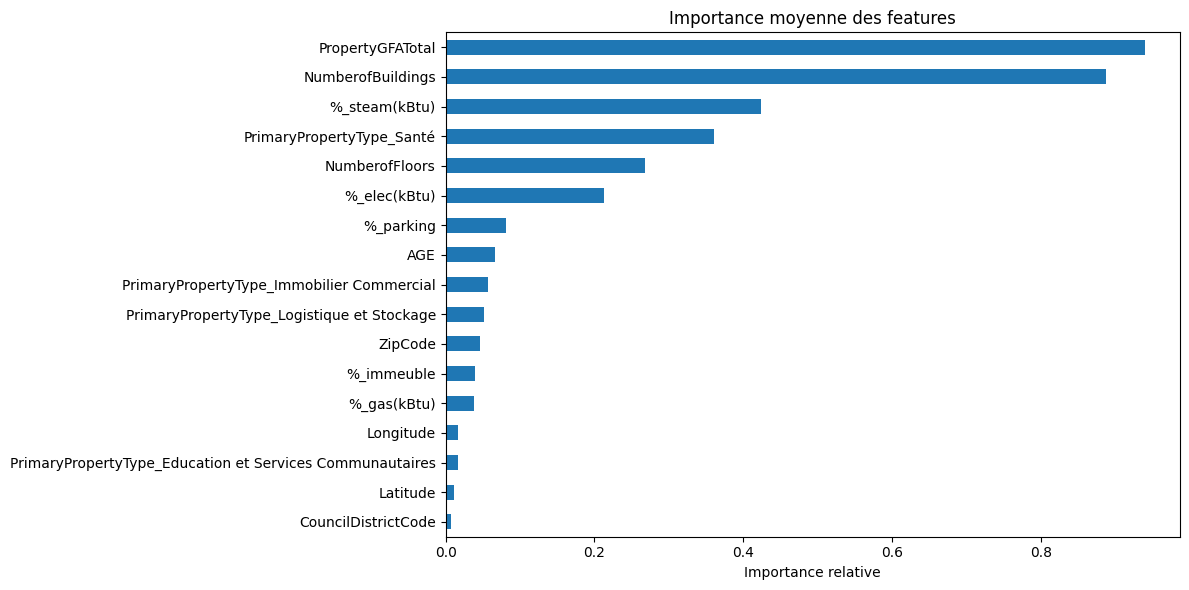

In [2928]:
def analyze_feature_importance(models, model_names, feature_names, threshold=0.01):
    importance_summary = pd.DataFrame()
    
    for model, name in zip(models, model_names):
        # Normaliser les coefficients
        normalized_coef = np.abs(model.coef_) / np.abs(model.coef_).max()
        importance_summary[name] = normalized_coef
    
    importance_summary.index = feature_names
    
    # Calculer le score moyen d'importance
    importance_summary['Importance_moyenne'] = importance_summary.mean(axis=1)
    
    # Identifier les features importantes
    important_features = importance_summary[
        importance_summary['Importance_moyenne'] > threshold
    ].sort_values('Importance_moyenne', ascending=False)
    
    print("\nFeatures importantes (importance > {}):".format(threshold))
    print(important_features)
    col_num_sel=list(important_features.head(6).index) # On recupere les 6 meilleurs features
    # Visualisation
    plt.figure(figsize=(12, 6))
    importance_summary['Importance_moyenne'].sort_values().plot(kind='barh')
    plt.title('Importance moyenne des features')
    plt.xlabel('Importance relative')
    plt.tight_layout()
    plt.show()
    
    return importance_summary,list(col_num_sel)

# Utilisation de la fonction
importance_analysis,col_num_sel_regu = analyze_feature_importance(models, model_names, X.columns)

## REGRESSION REGULARISEE AVEC LES 6 MEILLEURES COLONNES

In [2929]:
print(col_num_sel_regu)

['PropertyGFATotal', 'NumberofBuildings', '%_steam(kBtu)', 'PrimaryPropertyType_Santé', 'NumberofFloors', '%_elec(kBtu)']


VOILA LES 6 MEILLEURES FEATURES SELECTIONNEES

## REGRESSION REGULARISEE AVEC LOG TARGET ET FEATURE

In [2930]:
_,_,_,resultats,y_test,y_pred_elastic,_=\
    reg_regul(DF_cleaned_lineaire,col_num_sel_regu,TARGET,type='log_target_feature',
              log_feature=['PropertyGFATotal'],alpha=0.01,l1_ratio=0.4)

## RESUME DES RESULTATS

In [2931]:
resultats

,train,test,general
mae_ElasticNet_log_target_feature,8.64e+01,6.22e+01,8.15e+01
mae_Lasso_log_target_feature,8.65e+01,6.18e+01,8.16e+01
mae_Ridge_log_target_feature,8.61e+01,6.24e+01,8.14e+01
mape_ElasticNet_log_target_feature,83.29,82.59,83.15
mape_Lasso_log_target_feature,83.47,82.74,83.32
mape_Ridge_log_target_feature,83.10,82.61,83.00
mse_ElasticNet_log_target_feature,9.85e+04,1.80e+04,8.23e+04
mse_Lasso_log_target_feature,8.71e+04,1.78e+04,7.32e+04
mse_Ridge_log_target_feature,1.13e+05,1.82e+04,9.39e+04
r2_ElasticNet_log_target_feature,0.77,0.69,0.76


ON OBTIENT DE PLUTOT BONS RESULTATS SUR LES DIFFERENTES METRIQUES ON VA GARDER L'ELASTICNET POUR LA SUITE DE L'ETUDE

In [2932]:
nouvelle_ligne=resultats.loc['mae_ElasticNet_log_target_feature']
nouvelle_ligne=nouvelle_ligne.to_frame().T
nouvelle_ligne.index=['ElasticNet']

Tableau_score_mae=pd.concat([Tableau_score_mae,nouvelle_ligne])

nouvelle_ligne=resultats.loc['mape_ElasticNet_log_target_feature']
nouvelle_ligne=nouvelle_ligne.to_frame().T
nouvelle_ligne.index=['ElasticNet']

Tableau_score_mape=pd.concat([Tableau_score_mape,nouvelle_ligne])

nouvelle_ligne=resultats.loc['mse_ElasticNet_log_target_feature']
nouvelle_ligne=nouvelle_ligne.to_frame().T
nouvelle_ligne.index=['ElasticNet']

Tableau_score_mse=pd.concat([Tableau_score_mse,nouvelle_ligne])

nouvelle_ligne=resultats.loc['r2_ElasticNet_log_target_feature']
nouvelle_ligne=nouvelle_ligne.to_frame().T
nouvelle_ligne.index=['ElasticNet']

Tableau_score_r2=pd.concat([Tableau_score_r2,nouvelle_ligne])

nouvelle_ligne=pd.Series([len(col_num_sel_regu)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['Elastic Net']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

## AFFICHAGE DES PREDICTIONS

Représentation des prédictions linéaires et des prédictions dummy


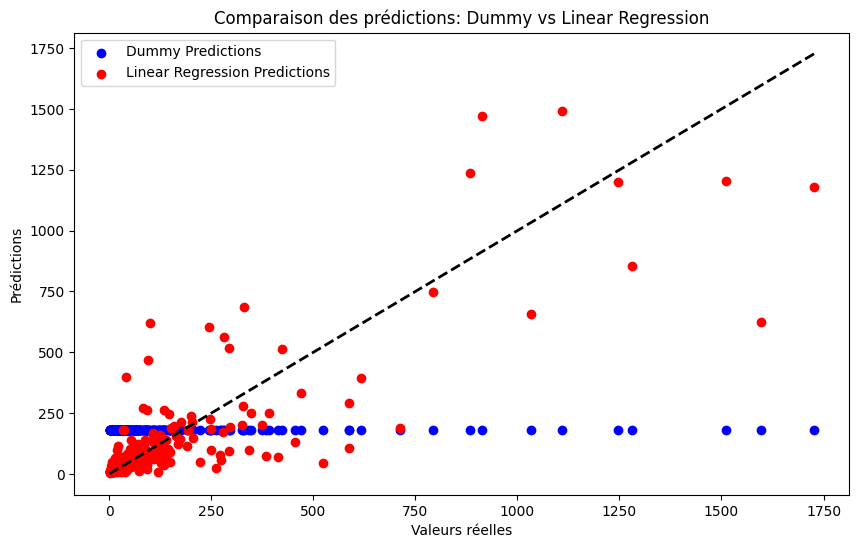

In [2933]:
representation_predictions(y_test,y_pred_dummy,y_pred_elastic)

# DECISION TREE REGRESSOR

Score R² train : 0.60
Score R² test : 0.53
Score MAE train : 1.09e+02
Score MAE test : 7.63e+01
Score MAPE train : 173.83 %
Score MAPE test : 153.21 %
Score MSE train : 1.69e+05
Score MSE test : 2.78e+04


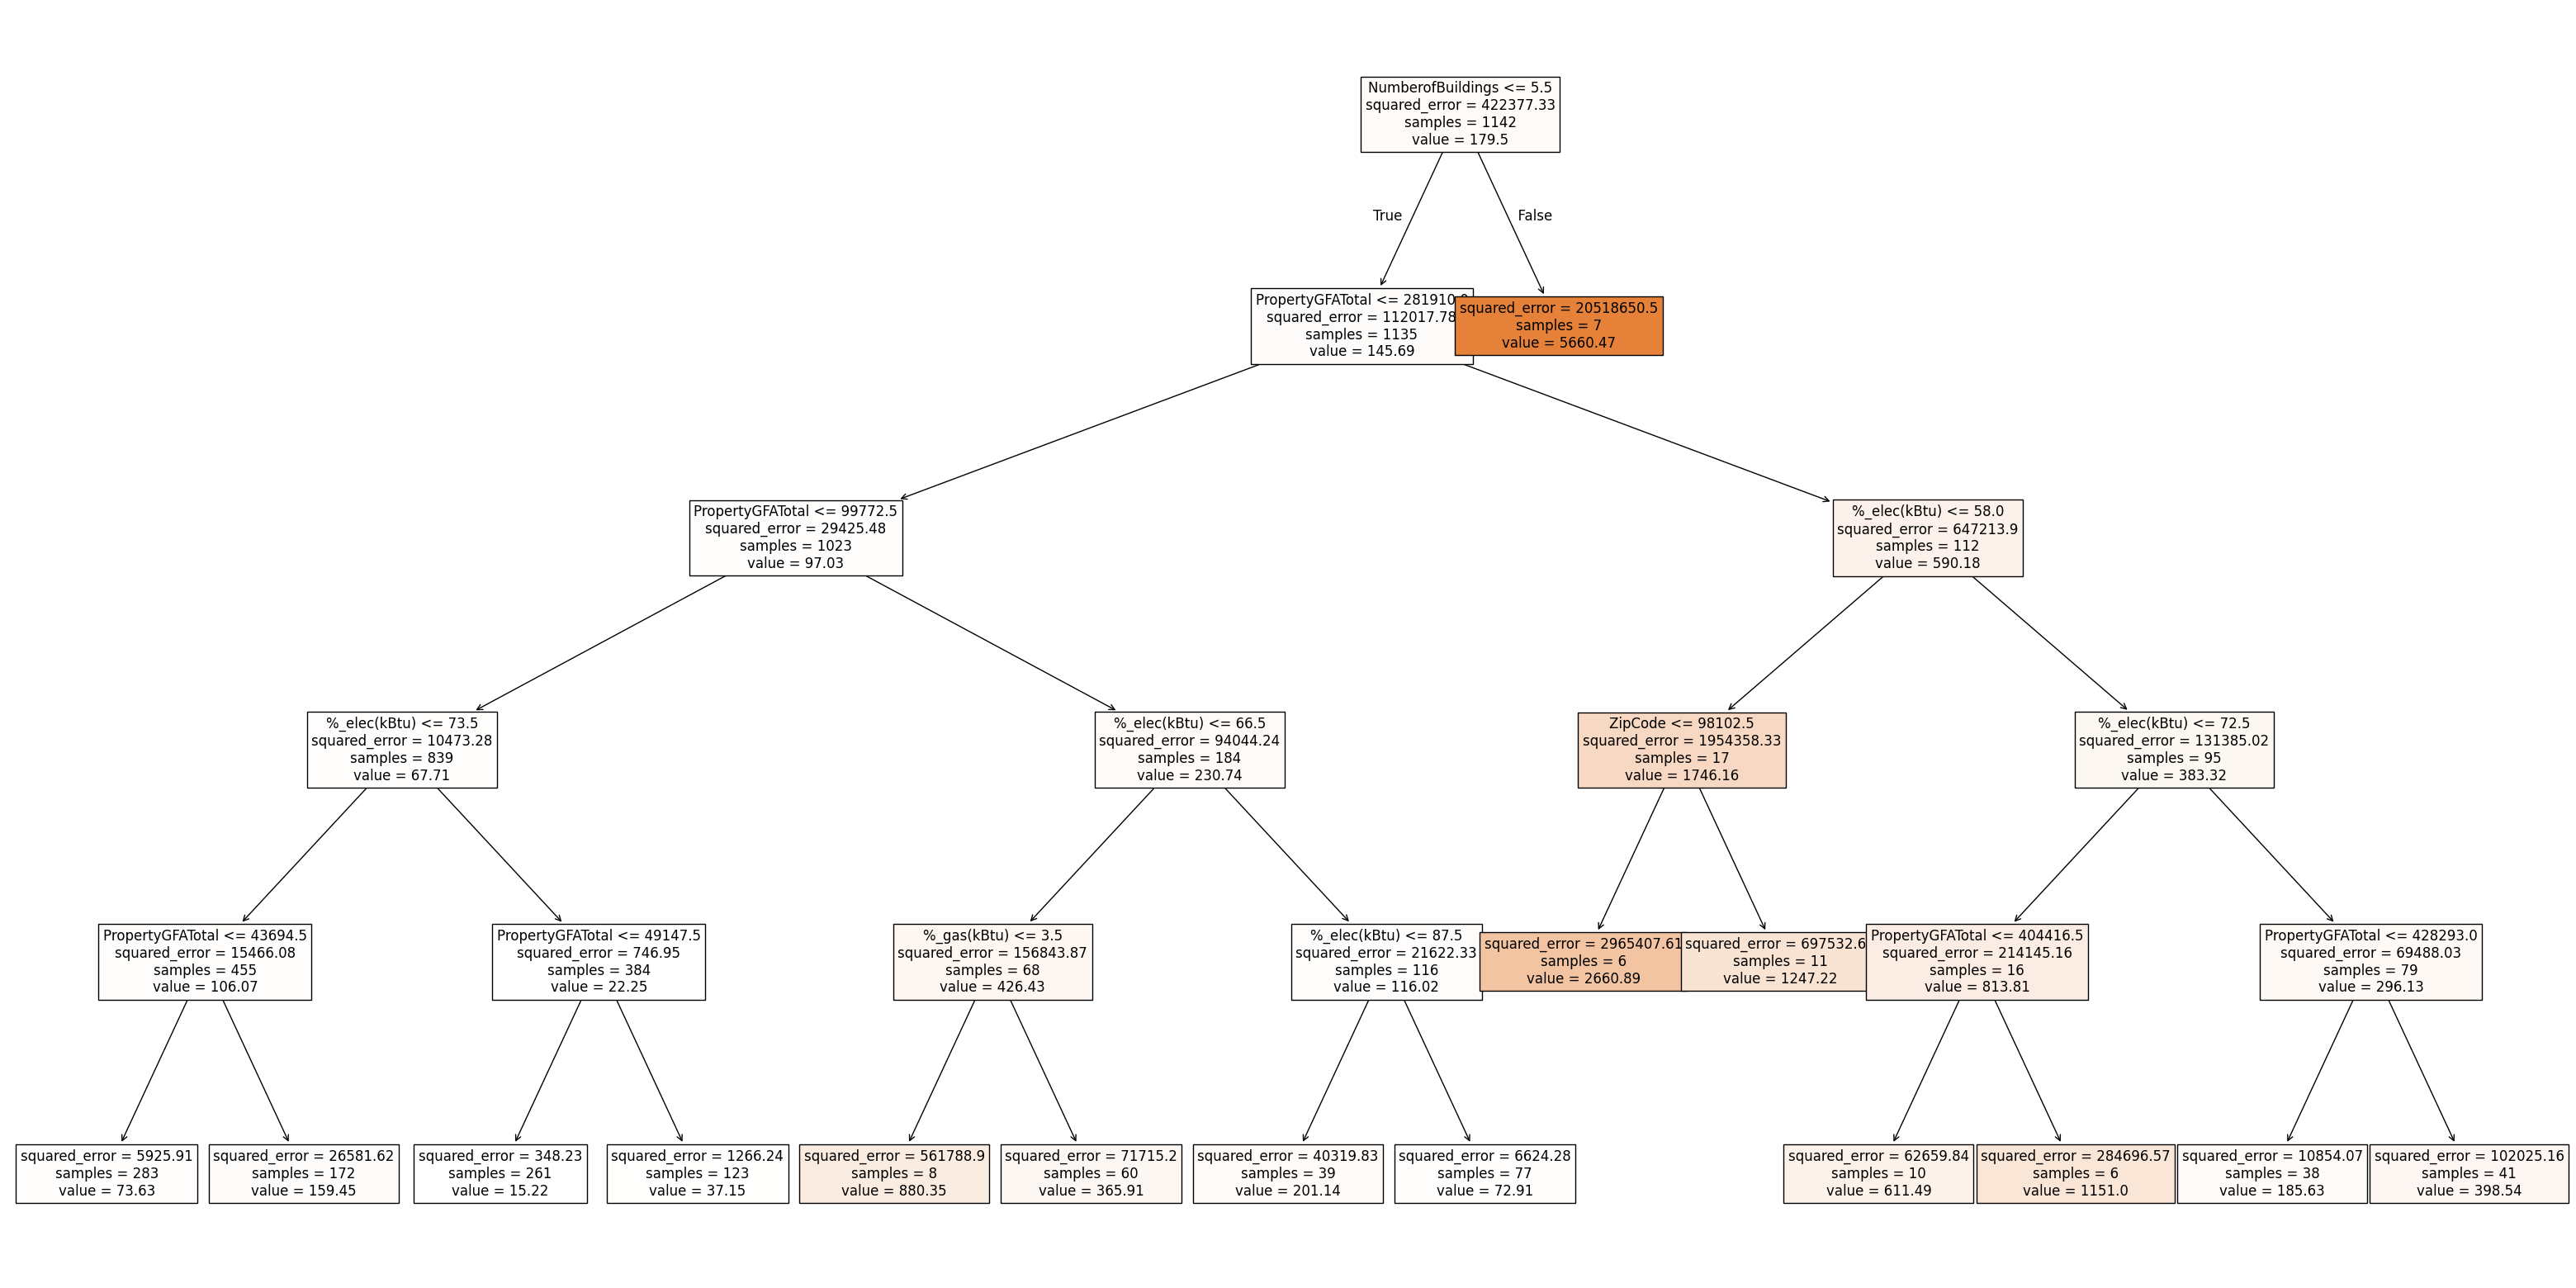

In [2934]:
dt_reg,_,_,_,_=\
    decision_tree_regressor(DF_cleaned,col_num,TARGET,'RAS',['None'],Tableau_score_mae,Tableau_score_mape,
                            Tableau_score_mse,Tableau_score_r2)

UN R2 DE 0.53 ET UN TRES MAUVAIS MAPE DE 153 %, C'EST A DIRE QU'EN MOYENNE IL COMMET 153% D'ECART AVEC LA VALEUR REELE

## FEATURE IMPORTANCE

In [2935]:
from sklearn.model_selection import train_test_split

X=DF_cleaned[col_num]
y=DF_cleaned[TARGET]



X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# Récupérer directement les importances et les noms des features
importances = dt_reg.feature_importances_
feature_names = X_train.columns

# Créer un dictionnaire simple
importances_dict = dict(zip(feature_names, importances))

# Trier par importance décroissante
sorted_importances = dict(sorted(importances_dict.items(), key=lambda x: x[1], reverse=True))

col_num_sel_dt=[]

# Afficher les résultats
for feature, importance in sorted_importances.items():
    print(f"{feature}: {importance:.4f}")
    if importance>0.0 and feature not in ['AGE','OSEBuildingID']:
        col_num_sel_dt.append(feature)

NumberofBuildings: 0.7322
%_elec(kBtu): 0.1259
PropertyGFATotal: 0.1086
ZipCode: 0.0269
%_gas(kBtu): 0.0065
CouncilDistrictCode: 0.0000
Latitude: 0.0000
Longitude: 0.0000
NumberofFloors: 0.0000
AGE: 0.0000
%_steam(kBtu): 0.0000
%_parking: 0.0000
%_immeuble: 0.0000
PrimaryPropertyType_Education et Services Communautaires: 0.0000
PrimaryPropertyType_Immobilier Commercial: 0.0000
PrimaryPropertyType_Logistique et Stockage: 0.0000
PrimaryPropertyType_Santé: 0.0000


ON VA CONSERVER TOUTES LES FEATURE AVEC UNE IMPORTANCE SUPERIEURE A 0

In [2936]:
print(col_num_sel_dt)

['NumberofBuildings', '%_elec(kBtu)', 'PropertyGFATotal', 'ZipCode', '%_gas(kBtu)']


In [2937]:
def check_correlations(data, threshold=0.9):
    corr_matrix = data.corr().abs()
    high_corr = np.where(abs(corr_matrix) > threshold)
    pairs = [(data.columns[i], data.columns[j], corr_matrix.iloc[i,j]) 
             for i, j in zip(*high_corr) if i < j]
    if pairs:
        print("Attention : Fortes corrélations détectées")
        for var1, var2, corr in pairs:
            print(f"{var1} - {var2}: {corr:.3f}")
    return pairs

print('Voilà les features qui semblent corrélées entre elles :')
check_correlations(DF_cleaned[col_num_sel_dt])

Voilà les features qui semblent corrélées entre elles :
Attention : Fortes corrélations détectées
%_elec(kBtu) - %_gas(kBtu): 0.938


[('%_elec(kBtu)', '%_gas(kBtu)', 0.9381004566526615)]

ON VA RETIRER '%_gas(kBtu)' TROP CORRELEES AVEC %_elec(kBtu)

In [2938]:
del(col_num_sel_dt[col_num_sel_dt.index('%_gas(kBtu)')])
print(col_num_sel_dt)

['NumberofBuildings', '%_elec(kBtu)', 'PropertyGFATotal', 'ZipCode']


CI DESSUS LES FEATURES CONSERVEES

## ESSAI AVEC LES FEATURES CONSERVEES ET EN LOGANT LA CIBLE ET PROPERTYGFA

Score R² train : 0.68
Score R² test : 0.56
Score MAE train : 9.38e+01
Score MAE test : 6.74e+01
Score MAPE train : 76.37 %
Score MAPE test : 85.57 %
Score MSE train : 1.34e+05
Score MSE test : 2.60e+04


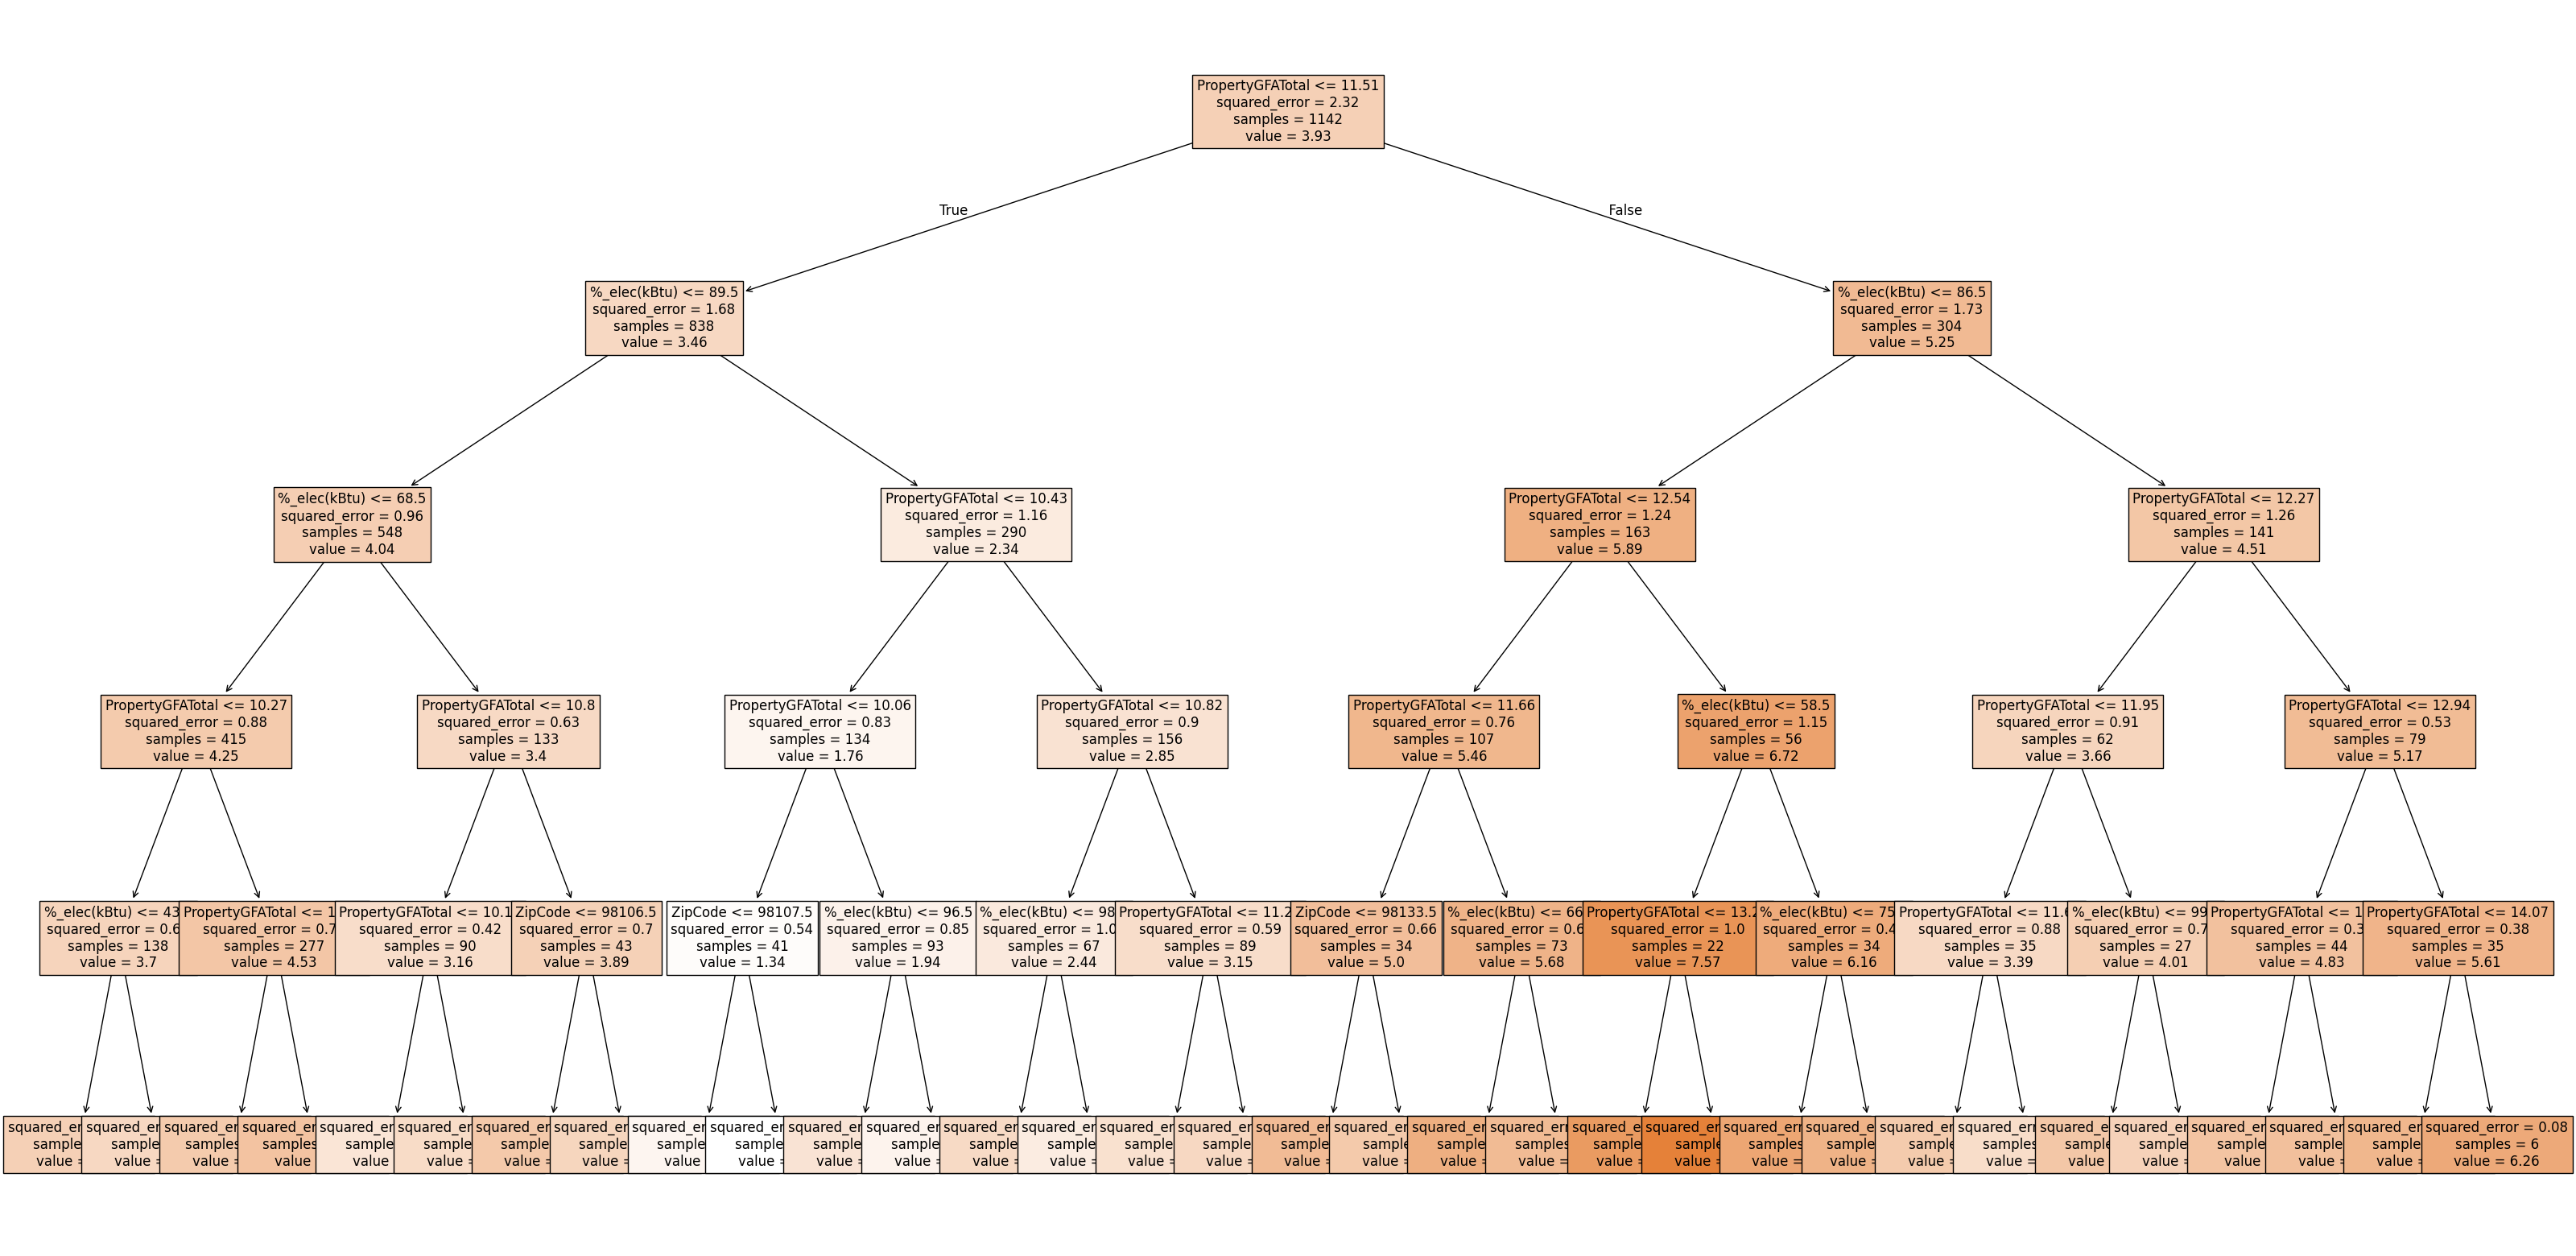

In [2939]:
dtr,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2=\
    decision_tree_regressor(DF_cleaned,col_num_sel_dt,TARGET,'log_target_feature',['PropertyGFATotal'],
                            Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

LEGERE AMELIORATION DU R2 MAIS SURTOUT BIEN MEILLEUR MAPE

RECUPERATION DU NOMBRE DE FEATURE POUR LA FIN DE L'ETUDE

In [2940]:
nouvelle_ligne=pd.Series([len(col_num_sel_dt)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['Decision Tree']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

# RANDOM FOREST

In [2941]:
rf_reg,_,_,_,_=\
    random_forest(DF_cleaned,col_num,TARGET,'RAS',['None'],Tableau_score_mae,Tableau_score_mape,
                  Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.63
Score R² test : 0.70
Score MAE train : 8.55e+01
Score MAE test : 6.54e+01
Score MAPE train : 101.45 %
Score MAPE test : 101.33 %
Score MSE train : 1.58e+05
Score MSE test : 1.76e+04


LE RANDOM FOREST A DE PLUTOT BONS RESULTATS DE BASE

## PERMUTATION POUR FEATURE IMPORTANCE

In [2942]:
from sklearn.inspection import permutation_importance

from sklearn.model_selection import train_test_split

X=DF_cleaned[col_num]
y=DF_cleaned[TARGET]




X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Calcul des permutation importances
result = permutation_importance(
   rf_reg, 
   X_test,  # On utilise le jeu de test pour éviter le biais
   y_test,
   n_repeats=10,  # Nombre de permutations à effectuer
   random_state=42
)

# Création d'un dictionnaire avec les importances moyennes
importances = result.importances_mean
feature_names = X_test.columns
importances_dict = dict(zip(feature_names, importances))

# Tri par importance décroissante
sorted_importances = dict(sorted(importances_dict.items(), key=lambda x: x[1], reverse=True))

col_num_sel_rf=[]
col_num_sel_rf=list(sorted_importances.keys())[:6] # On conserve les 6 meilleures features

# Affichage des résultats avec les écarts-types
for feature, importance in sorted_importances.items():
   std = result.importances_std[list(feature_names).index(feature)]
   print(f"{feature}: {importance:.4f} (±{std:.4f})")
   

PropertyGFATotal: 1.4911 (±0.2105)
%_elec(kBtu): 0.8624 (±0.1710)
%_steam(kBtu): 0.0477 (±0.0202)
PrimaryPropertyType_Logistique et Stockage: 0.0083 (±0.0045)
%_gas(kBtu): 0.0074 (±0.0062)
NumberofFloors: 0.0048 (±0.0038)
ZipCode: 0.0029 (±0.0041)
PrimaryPropertyType_Immobilier Commercial: 0.0023 (±0.0010)
PrimaryPropertyType_Education et Services Communautaires: 0.0011 (±0.0004)
PrimaryPropertyType_Santé: 0.0009 (±0.0001)
CouncilDistrictCode: 0.0007 (±0.0018)
NumberofBuildings: 0.0005 (±0.0001)
%_immeuble: 0.0000 (±0.0010)
%_parking: -0.0001 (±0.0013)
Longitude: -0.0011 (±0.0021)
AGE: -0.0040 (±0.0071)
Latitude: -0.0053 (±0.0061)


In [2943]:
print(col_num_sel_rf)

['PropertyGFATotal', '%_elec(kBtu)', '%_steam(kBtu)', 'PrimaryPropertyType_Logistique et Stockage', '%_gas(kBtu)', 'NumberofFloors']


In [2944]:
def check_correlations(data, threshold=0.9):
    corr_matrix = data.corr().abs()
    high_corr = np.where(abs(corr_matrix) > threshold)
    pairs = [(data.columns[i], data.columns[j], corr_matrix.iloc[i,j]) 
             for i, j in zip(*high_corr) if i < j]
    if pairs:
        print("Attention : Fortes corrélations détectées")
        for var1, var2, corr in pairs:
            print(f"{var1} - {var2}: {corr:.3f}")
    return pairs

print('Voilà les features qui semblent corrélées entre elles :')
check_correlations(DF_cleaned[col_num_sel_rf])

Voilà les features qui semblent corrélées entre elles :
Attention : Fortes corrélations détectées
%_elec(kBtu) - %_gas(kBtu): 0.938


[('%_elec(kBtu)', '%_gas(kBtu)', 0.9381004566526615)]

ON VA RETIRER '%_gas(kBtu)' TROP CORRELEES AVEC %_elec(kBtu)

In [2945]:
del(col_num_sel_rf[col_num_sel_rf.index('%_gas(kBtu)')])
print(col_num_sel_rf)

['PropertyGFATotal', '%_elec(kBtu)', '%_steam(kBtu)', 'PrimaryPropertyType_Logistique et Stockage', 'NumberofFloors']


CI DESSUS LES 5 MEILLEURES FEATURES CONSERVEES

## ESSAI AVEC LES FEATURES LES PLUS PERTINENTES + LOG

In [2946]:
_,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2=\
random_forest(DF_cleaned,col_num_sel_rf,TARGET,'log_target_feature',['PropertyGFATotal'],Tableau_score_mae,
              Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.57
Score R² test : 0.64
Score MAE train : 7.95e+01
Score MAE test : 6.20e+01
Score MAPE train : 48.07 %
Score MAPE test : 66.69 %
Score MSE train : 1.82e+05
Score MSE test : 2.11e+04


LEGERE BAISSE DU R2 MAIS NETTE AMELIORATION DU MAPE

RECUPERATION DU NOMBRE DE FEATURE POUR LA SUITE

In [2947]:
nouvelle_ligne=pd.Series([len(col_num_sel_rf)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['Random Forest']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

# GRADIENT BOOSTING 

In [2948]:
gb_reg,_,_,_,_=\
    gradient_boosting(DF_cleaned,col_num,TARGET,'RAS',['None'],Tableau_score_mae,Tableau_score_mape,
                      Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.81
Score R² test : 0.58
Score MAE train : 1.00e+02
Score MAE test : 7.92e+01
Score MAPE train : 215.22 %
Score MAPE test : 198.09 %
Score MSE train : 8.23e+04
Score MSE test : 2.48e+04


RESULTATS TRES MAUVAIS NOTAMMENT SUR LE MAPE

## PERMUTATION POUR FEATURE IMPORTANCE

In [2949]:
from sklearn.inspection import permutation_importance

X=DF_cleaned[col_num]
y=DF_cleaned[TARGET]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Calcul des permutation importances pour le Gradient Boosting
result = permutation_importance(
   gb_reg, 
   X_test,
   y_test,
   n_repeats=10,
   random_state=42
)

# Création d'un dictionnaire avec les importances moyennes
importances = result.importances_mean
feature_names = X_test.columns
importances_dict = dict(zip(feature_names, importances))

# Tri par importance décroissante
sorted_importances = dict(sorted(importances_dict.items(), key=lambda x: x[1], reverse=True))

col_num_sel_gb=[]

# Affichage des résultats avec les écarts-types
for feature, importance in sorted_importances.items():
   std = result.importances_std[list(feature_names).index(feature)]
   print(f"{feature}: {importance:.4f} (±{std:.4f})")
   if importance>0.01 and feature not in['AGE','OSEBuildingID']:
      col_num_sel_gb.append(feature)

PropertyGFATotal: 1.3726 (±0.3819)
%_elec(kBtu): 0.6147 (±0.2219)
%_steam(kBtu): 0.2564 (±0.0969)
PrimaryPropertyType_Santé: 0.0203 (±0.0700)
Longitude: 0.0122 (±0.0195)
NumberofFloors: 0.0105 (±0.0049)
AGE: 0.0064 (±0.0039)
%_gas(kBtu): 0.0039 (±0.0014)
PrimaryPropertyType_Logistique et Stockage: 0.0005 (±0.0004)
%_immeuble: 0.0003 (±0.0001)
CouncilDistrictCode: 0.0000 (±0.0000)
Latitude: 0.0000 (±0.0000)
%_parking: 0.0000 (±0.0000)
PrimaryPropertyType_Education et Services Communautaires: 0.0000 (±0.0000)
PrimaryPropertyType_Immobilier Commercial: 0.0000 (±0.0000)
ZipCode: -0.0003 (±0.0006)
NumberofBuildings: -0.0042 (±0.0064)


In [2950]:
def check_correlations(data, threshold=0.9):
    corr_matrix = data.corr().abs()
    high_corr = np.where(abs(corr_matrix) > threshold)
    pairs = [(data.columns[i], data.columns[j], corr_matrix.iloc[i,j]) 
             for i, j in zip(*high_corr) if i < j]
    if pairs:
        print("Attention : Fortes corrélations détectées")
        for var1, var2, corr in pairs:
            print(f"{var1} - {var2}: {corr:.3f}")
    return pairs

print('Voilà les features qui semblent corrélées entre elles :')
check_correlations(DF_cleaned[col_num_sel_gb])

Voilà les features qui semblent corrélées entre elles :


[]

In [2951]:
print(col_num_sel_gb)

['PropertyGFATotal', '%_elec(kBtu)', '%_steam(kBtu)', 'PrimaryPropertyType_Santé', 'Longitude', 'NumberofFloors']


CI DESSUS LES VARIABLES QUI DEPASSENT UNE IMPORTANCE DE 0.01

## ESSAI AVEC SEULEMENT LES FEATURES SELECTIONNEES + LOG DE LA TARGET ET DE 'PropertyGFATotal'

In [2952]:
_,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2=\
    gradient_boosting(DF_cleaned,col_num_sel_gb,TARGET,'log_target_feature',['PropertyGFATotal']
                  ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.82
Score R² test : 0.67
Score MAE train : 7.51e+01
Score MAE test : 6.20e+01
Score MAPE train : 66.62 %
Score MAPE test : 72.03 %
Score MSE train : 7.52e+04
Score MSE test : 1.92e+04


ON CONSTATE UNE AMELIORATION SUR TOUTES LES METRIQUES

ON RECUPERE LE NOMBRE DE FEATURE POUR LA SUITE


In [2953]:
nouvelle_ligne=pd.Series([len(col_num_sel_gb)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['Gradient Boosting']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

# XGBoost

In [2954]:
xgb_reg,_,_,_,_=\
    xgboost_reg(DF_cleaned,col_num,TARGET,'RAS',['None'],Tableau_score_mae,Tableau_score_mape,
                Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.84
Score R² test : 0.69
Score MAE train : 9.31e+01
Score MAE test : 7.46e+01
Score MAPE train : 148.54 %
Score MAPE test : 140.34 %
Score MSE train : 6.86e+04
Score MSE test : 1.81e+04


LE R2 EST PLUTOT BON MAIS LE MAPE EST MAUVAIS

## ESSAI DE PERMUTATION DES FEATURES

In [2955]:
X=DF_cleaned[col_num]
y=DF_cleaned[TARGET]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# Obtenir le booster sous-jacent
booster = xgb_reg.get_booster()

# Obtenir l'importance basée sur le gain
importance_dict = booster.get_score(importance_type='gain')

# Convertir en dictionnaire avec toutes les features (même celles avec gain=0)
all_features = X_train.columns
importance_dict_full = {feat: importance_dict.get(feat, 0) for feat in all_features}

# Trier par importance décroissante
sorted_importances = dict(sorted(importance_dict_full.items(), key=lambda x: x[1], reverse=True))

col_num_sel_xgb=[]
col_num_sel_xgb=list(sorted_importances.keys())[:8] # On va conserver les 8 meilleures features
# Afficher les résultats
for feature, importance in sorted_importances.items():
    print(f"{feature}: {importance:.4f}")
    

NumberofBuildings: 21068362.0000
CouncilDistrictCode: 11344890.0000
%_elec(kBtu): 7039876.5000
PropertyGFATotal: 6546340.5000
PrimaryPropertyType_Santé: 5832428.5000
%_steam(kBtu): 5604599.0000
NumberofFloors: 5356073.0000
%_parking: 3820940.0000
PrimaryPropertyType_Immobilier Commercial: 3814603.5000
Longitude: 2524529.0000
AGE: 2226135.7500
%_gas(kBtu): 1844624.7500
ZipCode: 1113654.2500
Latitude: 542268.7500
PrimaryPropertyType_Logistique et Stockage: 305223.3438
%_immeuble: 0.0000
PrimaryPropertyType_Education et Services Communautaires: 0.0000


In [2956]:
def check_correlations(data, threshold=0.9):
    corr_matrix = data.corr().abs()
    high_corr = np.where(abs(corr_matrix) > threshold)
    pairs = [(data.columns[i], data.columns[j], corr_matrix.iloc[i,j]) 
             for i, j in zip(*high_corr) if i < j]
    if pairs:
        print("Attention : Fortes corrélations détectées")
        for var1, var2, corr in pairs:
            print(f"{var1} - {var2}: {corr:.3f}")
    return pairs

print('Voilà les features qui semblent corrélées entre elles :')
check_correlations(DF_cleaned[col_num_sel_xgb])

Voilà les features qui semblent corrélées entre elles :


[]

In [2957]:
print(col_num_sel_xgb)

['NumberofBuildings', 'CouncilDistrictCode', '%_elec(kBtu)', 'PropertyGFATotal', 'PrimaryPropertyType_Santé', '%_steam(kBtu)', 'NumberofFloors', '%_parking']


CI DESSUS LES 8 MEILLEURES FEATURES

## ESSAI AVEC JUSTE LES FEATURE UTILES

In [2958]:
xgbreg,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2=\
    xgboost_reg(DF_cleaned,col_num_sel_xgb,TARGET,'log_target_feature',['PropertyGFATotal'],
            Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.77
Score R² test : 0.62
Score MAE train : 7.78e+01
Score MAE test : 6.39e+01
Score MAPE train : 68.75 %
Score MAPE test : 72.13 %
Score MSE train : 9.68e+04
Score MSE test : 2.21e+04


LEGERE BAISSE DU R2 MAIS NETTE AMELIORATION DU MAPE

ON RECUPERE LE NOMBRE DE FEATURES POUR LA SUITE

In [2959]:
nouvelle_ligne=pd.Series([len(col_num_sel_xgb)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['XGBoost']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

# SVR

In [2960]:
_,_,_,_,svr,scaler,scaler_y=\
        svr_reg(DF_cleaned,col_num,TARGET,'RAS',['None'],Tableau_score_mae,Tableau_score_mape,
                Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.32
Score R² test : 0.61
Score MAE train : 1.00e+02
Score MAE test : 7.77e+01
Score MAPE train : 218.01 %
Score MAPE test : 237.80 %
Score MSE train : 2.86e+05
Score MSE test : 2.28e+04


## PERMUTATIONS POUR FEATURE IMPORTANCE

In [2961]:
from sklearn.inspection import permutation_importance


X=DF_cleaned[col_num]
y=DF_cleaned[TARGET]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Scaling des données log-transformées

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaling de y aussi

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()




# Calcul des permutation importances pour le SVR
result = permutation_importance(
   svr, 
   X_test_scaled,
   y_test_scaled,
   n_repeats=10,
   random_state=42
)

# Création d'un dictionnaire avec les importances moyennes
importances = result.importances_mean
feature_names = X_test.columns
importances_dict = dict(zip(feature_names, importances))

# Tri par importance décroissante
sorted_importances = dict(sorted(importances_dict.items(), key=lambda x: x[1], reverse=True))

col_num_sel_svr=[]

# Affichage des résultats avec les écarts-types
for feature, importance in sorted_importances.items():
   std = result.importances_std[list(feature_names).index(feature)]
   print(f"{feature}: {importance:.4f} (±{std:.4f})")
   if importance>0.02:
      col_num_sel_svr.append(feature)

PropertyGFATotal: 0.4574 (±0.0637)
%_elec(kBtu): 0.1505 (±0.0167)
%_steam(kBtu): 0.1439 (±0.0232)
%_gas(kBtu): 0.1087 (±0.0142)
PrimaryPropertyType_Santé: 0.0676 (±0.0122)
NumberofFloors: 0.0624 (±0.0061)
PrimaryPropertyType_Immobilier Commercial: 0.0534 (±0.0105)
ZipCode: 0.0270 (±0.0095)
%_parking: 0.0261 (±0.0032)
%_immeuble: 0.0261 (±0.0032)
PrimaryPropertyType_Logistique et Stockage: 0.0242 (±0.0109)
PrimaryPropertyType_Education et Services Communautaires: 0.0201 (±0.0111)
AGE: 0.0170 (±0.0130)
CouncilDistrictCode: 0.0144 (±0.0040)
Latitude: 0.0135 (±0.0056)
Longitude: 0.0058 (±0.0038)
NumberofBuildings: 0.0042 (±0.0070)


ON A RECUPERER TOUTES LES FEATURES QUI DEPASSENT LE SEUIL DE 0.02 D'IMPORTANCE

In [2962]:
print(col_num_sel_svr)


['PropertyGFATotal', '%_elec(kBtu)', '%_steam(kBtu)', '%_gas(kBtu)', 'PrimaryPropertyType_Santé', 'NumberofFloors', 'PrimaryPropertyType_Immobilier Commercial', 'ZipCode', '%_parking', '%_immeuble', 'PrimaryPropertyType_Logistique et Stockage', 'PrimaryPropertyType_Education et Services Communautaires']


In [2963]:
def check_correlations(data, threshold=0.9):
    corr_matrix = data.corr().abs()
    high_corr = np.where(abs(corr_matrix) > threshold)
    pairs = [(data.columns[i], data.columns[j], corr_matrix.iloc[i,j]) 
             for i, j in zip(*high_corr) if i < j]
    if pairs:
        print("Attention : Fortes corrélations détectées")
        for var1, var2, corr in pairs:
            print(f"{var1} - {var2}: {corr:.3f}")
    return pairs

print('Voilà les features qui semblent corrélées entre elles :')
check_correlations(DF_cleaned[col_num_sel_svr])

Voilà les features qui semblent corrélées entre elles :
Attention : Fortes corrélations détectées
%_elec(kBtu) - %_gas(kBtu): 0.938
%_parking - %_immeuble: 1.000


[('%_elec(kBtu)', '%_gas(kBtu)', 0.9381004566526615),
 ('%_parking', '%_immeuble', 0.9999999999999997)]

ON VA RETIRER %_IMMEUBLE CAR TROP CORRELEES AVEC %_PARKING ET %_GAS CAR TROP CORRELEES AVEC %_ELEC

In [2964]:
del(col_num_sel_svr[col_num_sel_svr.index('%_immeuble')])

del(col_num_sel_svr[col_num_sel_svr.index('%_gas(kBtu)')])
print(col_num_sel_svr)

['PropertyGFATotal', '%_elec(kBtu)', '%_steam(kBtu)', 'PrimaryPropertyType_Santé', 'NumberofFloors', 'PrimaryPropertyType_Immobilier Commercial', 'ZipCode', '%_parking', 'PrimaryPropertyType_Logistique et Stockage', 'PrimaryPropertyType_Education et Services Communautaires']


## ESSAI AVEC REDUCTION DE FEATURE + LOG

In [2965]:
Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,svr_log,sclX,sclY=\
        svr_reg(DF_cleaned,col_num_sel_svr,TARGET,'log_target_feature',['PropertyGFATotal']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.63
Score R² test : 0.57
Score MAE train : 7.75e+01
Score MAE test : 6.27e+01
Score MAPE train : 57.73 %
Score MAPE test : 65.24 %
Score MSE train : 1.54e+05
Score MSE test : 2.50e+04


ON RECUPERE LE NOMBRE DE FEATURES POUR LA SUITE

In [2966]:
nouvelle_ligne=pd.Series([len(col_num_sel_svr)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['SVR']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

# NN


In [2967]:
nn_reg_mod,_,_,_,_,scal,scaly=\
    nn_reg_fonc(DF_cleaned,col_num,TARGET,'RAS',['None'],Tableau_score_mae,Tableau_score_mape,
                Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.95
Score R² test : -0.66
Score MAE train : 7.94e+01
Score MAE test : 1.12e+02
Score MAPE train : 163.41 %
Score MAPE test : 181.81 %
Score MSE train : 2.28e+04
Score MSE test : 9.75e+04


LES RESULTATS SONT TRES MAUVAIS AVEC UN TRES FORT OVERFITTING


## PERMUTATIONS

In [2968]:
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=DF_cleaned[col_num]
y=DF_cleaned[TARGET]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Scaling des données log-transformées
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaling de y aussi
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Calcul des permutation importances pour le Neural Network
result = permutation_importance(
    nn_reg_mod, 
    X_test_scaled,
    y_test_scaled,
    n_repeats=10,
    random_state=42
)

# Utilisation des noms de colonnes originaux
feature_names = X_test.columns  # ou X_train_log.columns selon ce que vous avez

# Création d'un dictionnaire avec les importances moyennes
importances = result.importances_mean
importances_dict = dict(zip(feature_names, importances))

# Tri par importance décroissante
sorted_importances = dict(sorted(importances_dict.items(), key=lambda x: x[1], reverse=True))

col_num_sel_nn=[]
col_num_sel_nn=list(sorted_importances.keys())[:8] # On récupére les 8 meilleures features

# Affichage des résultats avec les écarts-types
for feature, importance in sorted_importances.items():
    std = result.importances_std[list(feature_names).index(feature)]
    print(f"{feature}: {importance:.4f} (±{std:.4f})")
    

PropertyGFATotal: 0.8361 (±0.5837)
%_elec(kBtu): 0.2828 (±0.2618)
PrimaryPropertyType_Immobilier Commercial: 0.1602 (±0.1376)
NumberofFloors: 0.0848 (±0.1897)
%_immeuble: 0.0812 (±0.0528)
CouncilDistrictCode: 0.0584 (±0.2048)
PrimaryPropertyType_Education et Services Communautaires: 0.0547 (±0.0530)
%_gas(kBtu): 0.0516 (±0.0874)
ZipCode: 0.0361 (±0.1253)
AGE: 0.0250 (±0.1553)
Latitude: 0.0043 (±0.0343)
%_parking: -0.0430 (±0.0917)
Longitude: -0.0513 (±0.1567)
NumberofBuildings: -0.0877 (±0.0317)
PrimaryPropertyType_Logistique et Stockage: -0.1426 (±0.1431)
%_steam(kBtu): -0.3664 (±0.3480)
PrimaryPropertyType_Santé: -0.6358 (±0.2415)


In [2969]:
print(col_num_sel_nn)


['PropertyGFATotal', '%_elec(kBtu)', 'PrimaryPropertyType_Immobilier Commercial', 'NumberofFloors', '%_immeuble', 'CouncilDistrictCode', 'PrimaryPropertyType_Education et Services Communautaires', '%_gas(kBtu)']


CI DESSUS LES 8 FEATURES CONSERVEES

In [2970]:
def check_correlations(data, threshold=0.9):
    corr_matrix = data.corr().abs()
    high_corr = np.where(abs(corr_matrix) > threshold)
    pairs = [(data.columns[i], data.columns[j], corr_matrix.iloc[i,j]) 
             for i, j in zip(*high_corr) if i < j]
    if pairs:
        print("Attention : Fortes corrélations détectées")
        for var1, var2, corr in pairs:
            print(f"{var1} - {var2}: {corr:.3f}")
    return pairs

print('Voilà les features qui semblent corrélées entre elles :')
check_correlations(DF_cleaned[col_num_sel_nn])

Voilà les features qui semblent corrélées entre elles :
Attention : Fortes corrélations détectées
%_elec(kBtu) - %_gas(kBtu): 0.938


[('%_elec(kBtu)', '%_gas(kBtu)', 0.9381004566526615)]

ON VA RETIRER %_gas(kBtu) CAR TROP CORRELEE AVEC %_elec(kBtu)

In [2971]:
del(col_num_sel_nn[col_num_sel_nn.index('%_gas(kBtu)')])
print(col_num_sel_nn)

['PropertyGFATotal', '%_elec(kBtu)', 'PrimaryPropertyType_Immobilier Commercial', 'NumberofFloors', '%_immeuble', 'CouncilDistrictCode', 'PrimaryPropertyType_Education et Services Communautaires']


## ESSAI AVEC SEULEMENT LES FEATURE IMPORTANTES + LOG

In [2972]:
nnreg,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,scalerX,scalerY=\
    nn_reg_fonc(DF_cleaned,col_num_sel_nn,TARGET,'log_target_feature',['PropertyGFATotal']
            ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.53
Score R² test : 0.55
Score MAE train : 9.57e+01
Score MAE test : 6.40e+01
Score MAPE train : 63.12 %
Score MAPE test : 65.96 %
Score MSE train : 2.00e+05
Score MSE test : 2.61e+04


LES RESULTATS SONT BIEN MEILLEURS

ON RECUPERE LE NOMBRE DE FEATURE POUR LA SUITE

In [2973]:
nouvelle_ligne=pd.Series([len(col_num_sel_nn)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['NN']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

# AFFICHAGE DES SCORES

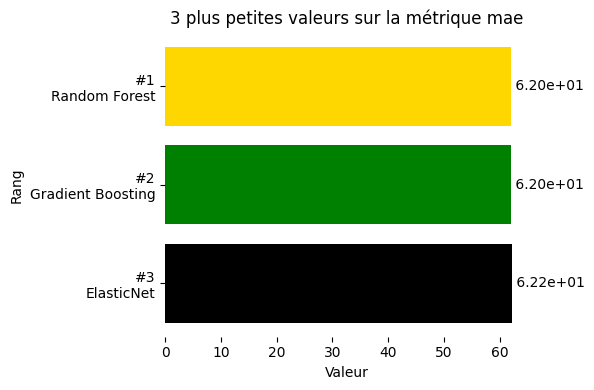


Bottom 3 des valeurs:
#3: Modéle ElasticNet, Valeur: 6.22e+01
#2: Modéle Gradient Boosting, Valeur: 6.20e+01
#1: Modéle Random Forest, Valeur: 6.20e+01


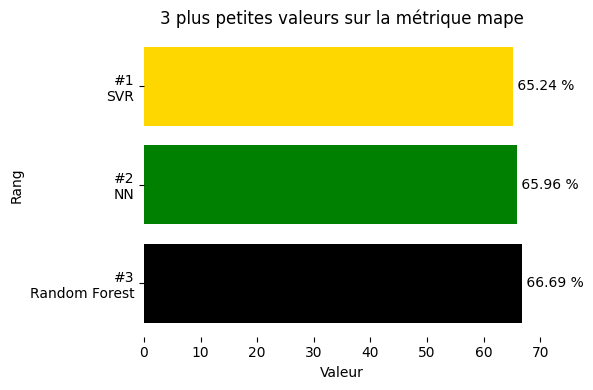


Bottom 3 des valeurs:
#3: Modéle Random Forest, Valeur: 66.69 %
#2: Modéle NN, Valeur: 65.96 %
#1: Modéle SVR, Valeur: 65.24 %


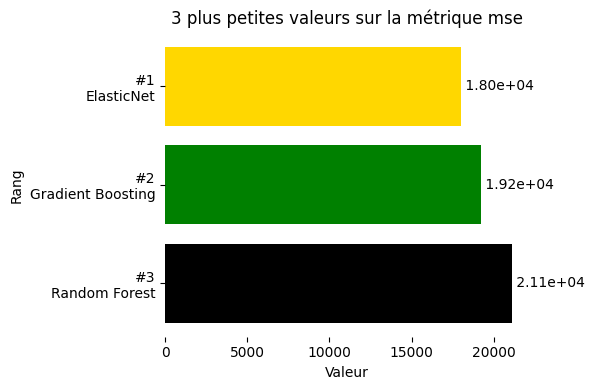


Bottom 3 des valeurs:
#3: Modéle Random Forest, Valeur: 2.11e+04
#2: Modéle Gradient Boosting, Valeur: 1.92e+04
#1: Modéle ElasticNet, Valeur: 1.80e+04


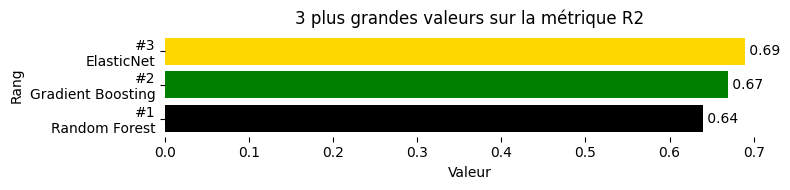


Bottom 3 des valeurs:
#1: Index Random Forest, Valeur: 0.64
#2: Index Gradient Boosting, Valeur: 0.67
#3: Index ElasticNet, Valeur: 0.69


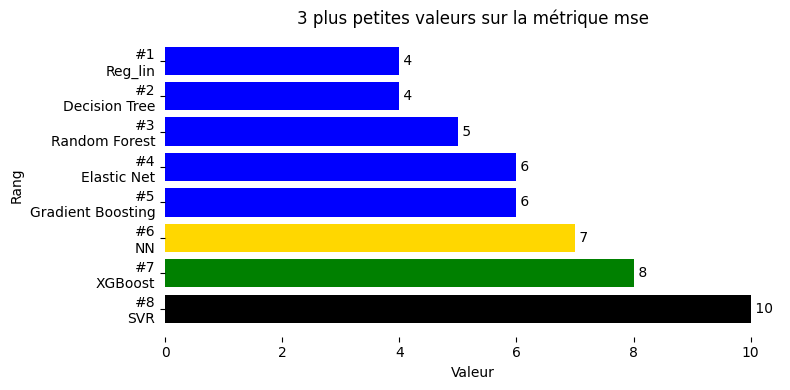

In [2974]:
for DF,nom in [(Tableau_score_mae,'Tableau_score_mae'),(Tableau_score_mape,'Tableau_score_mape'),\
           (Tableau_score_mse,'Tableau_score_mse')]:
    
    DF['test']=pd.to_numeric(DF['test'])

    plt.rcParams['figure.max_open_warning'] = False
    plt.rcParams['agg.path.chunksize'] = 1000

    # Sélection des 3 plus petites valeurs
    bottom3_series = DF['test'].nsmallest(3)[::-1]
    bottom3_indices = bottom3_series.index
    bottom3_values = bottom3_series.values

    # Définition des couleurs
    colors = {
        2: 'gold',    # Or
        1: 'green',    # Argent
        0: 'black'     # Bronze
    }

    # Création de la figure avec taille contrôlée
    fig, ax = plt.subplots(figsize=(6, 4))  # Taille réduite et contrôlée

    # Création du graphique horizontal
    barh = ax.barh(range(3), bottom3_values, color=[colors[i] for i in range(3)])

    # Personnalisation du graphique
    ax.set_title(f'3 plus petites valeurs sur la métrique {nom.split('_')[-1]}')
    ax.set_xlabel('Valeur')
    ax.set_ylabel('Rang')

    # Personnalisation des labels de l'axe y
    ax.set_yticks(range(3))
    ax.set_yticklabels([f"#{3-i}\n{idx}" for i, idx in enumerate(bottom3_indices)])

    # Retirer le cadre
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Ajout des valeurs sur les barres
    for i, value in enumerate(bottom3_values):
        if nom in ['Tableau_score_mae','Tableau_score_mse']:
            ax.text(value, i, f' {value:.2e}', va='center')
        else:
            ax.text(value, i, f' {value:.2f} %', va='center')
    # Ajuster les marges
    plt.tight_layout()

    plt.show()

    # Affichage des valeurs dans le terminal
    print("\nBottom 3 des valeurs:")
    for i, (idx, val) in enumerate(zip(bottom3_indices, bottom3_values), 1):
        if nom in ['Tableau_score_mae','Tableau_score_mse']:
            print(f"#{4-i}: Modéle {idx}, Valeur: {val:.2e}")
        else:
            print(f"#{4-i}: Modéle {idx}, Valeur: {val:.2f} %")


Tableau_score_r2['test']=pd.to_numeric(Tableau_score_r2['test'])

plt.rcParams['figure.max_open_warning'] = False
plt.rcParams['agg.path.chunksize'] = 1000

# Sélection des 3 plus petites valeurs
bottom3_series = Tableau_score_r2['test'].nlargest(3)[::-1]
bottom3_indices = bottom3_series.index
bottom3_values = bottom3_series.values

# Définition des couleurs
colors = {
    2: 'gold',    # Or
    1: 'green',    # Argent
    0: 'black'     # Bronze
}

# Création de la figure avec taille contrôlée
fig, ax = plt.subplots(figsize=(8, 2))  # Taille réduite et contrôlée

# Création du graphique horizontal
barh = ax.barh(range(3), bottom3_values, color=[colors[i] for i in range(3)])

# Personnalisation du graphique
ax.set_title('3 plus grandes valeurs sur la métrique R2')
ax.set_xlabel('Valeur')
ax.set_ylabel('Rang')

# Personnalisation des labels de l'axe y
ax.set_yticks(range(3))
ax.set_yticklabels([f"#{i+1}\n{idx}" for i, idx in enumerate(bottom3_indices)])

# Retirer le cadre
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Ajout des valeurs sur les barres
for i, value in enumerate(bottom3_values):
    ax.text(value, i, f' {value:.2f}', va='center')

# Ajuster les marges
plt.tight_layout()

plt.show()

# Affichage des valeurs dans le terminal
print("\nBottom 3 des valeurs:")
for i, (idx, val) in enumerate(zip(bottom3_indices, bottom3_values), 1):
    print(f"#{i}: Index {idx}, Valeur: {val:.2f}")


Tableau_score_feature['Nbre Feature Pertinentes']=\
    pd.to_numeric(Tableau_score_feature['Nbre Feature Pertinentes'])

plt.rcParams['figure.max_open_warning'] = False
plt.rcParams['agg.path.chunksize'] = 1000

# Sélection des 3 plus petites valeurs
bottom3_series = Tableau_score_feature['Nbre Feature Pertinentes']\
    .nsmallest(len(Tableau_score_feature['Nbre Feature Pertinentes']))[::-1]
bottom3_indices = bottom3_series.index
bottom3_values = bottom3_series.values

# Définition des couleurs
colors = {
    8:'blue',
    7:'blue',
    6:'blue',
    5:'blue',
    4:'blue',
    3:'blue',
    2: 'gold',    # Or
    1: 'green',    # Argent
    0: 'black'     # Bronze
}

# Création de la figure avec taille contrôlée
fig, ax = plt.subplots(figsize=(8, 4))  # Taille réduite et contrôlée

# Création du graphique horizontal
barh = ax.barh(range(8), bottom3_values, color=[colors[i] for i in range(8)])

# Personnalisation du graphique
ax.set_title(f'3 plus petites valeurs sur la métrique {nom.split('_')[-1]}')
ax.set_xlabel('Valeur')
ax.set_ylabel('Rang')

# Personnalisation des labels de l'axe y
ax.set_yticks(range(8))
ax.set_yticklabels([f"#{8-i}\n{idx}" for i, idx in enumerate(bottom3_indices)])

# Retirer le cadre
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Ajout des valeurs sur les barres
for i, value in enumerate(bottom3_values):
    ax.text(value, i, f' {value}', va='center')
    
# Ajuster les marges
plt.tight_layout()

plt.show()


    



# GRID SEARCH

In [2975]:

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Grilles d'hyperparamètres simples pour le premier test
param_grids = {
    'elastic': {
        'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    },
    'svr': {
        'kernel':['linear','rbf'],
        'C': [ 1.0, 10.0, 25, 100],
        'epsilon': [0.01, 0.05, 0.1, 0.5, 1],
        'gamma': ['scale', 'auto', 0.01, 0.1,1]
    },
    'xgb': {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [2, 4, 6, 8, None],
        'learning_rate': [0.001, 0.01, 0.1, 0.3],
        'subsample': [0.5, 0.7, 0.9],
        'min_child_weight': [1, 3, 5],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
}


def grid_search_elastic(DF, col_num, target, type, log_feature):
    """Grid search pour Elastic Net avec affichage minimal"""
    results = []
    best_r2 = -np.inf
    best_mape = np.inf
    
    total = len(param_grids['elastic']['alpha']) * len(param_grids['elastic']['l1_ratio'])
    with tqdm(total=total, desc="Elastic Net") as pbar:
        for alpha in param_grids['elastic']['alpha']:
            for l1_ratio in param_grids['elastic']['l1_ratio']:
                _, _, _, results_df, _, _ ,_= reg_regul(
                    DF=DF,
                    col_num=col_num,
                    target=target,
                    type=type,
                    log_feature=log_feature,
                    alpha=alpha,
                    l1_ratio=l1_ratio
                )
                
                r2_value = float(results_df.loc['r2_ElasticNet_log_target_feature', 'test'])
                mape_value = float(results_df.loc['mape_ElasticNet_log_target_feature', 'test'])
                
                if r2_value > best_r2:
                    best_r2 = r2_value
                    print(f"\nElastic Net - Nouveau meilleur R² : {r2_value:.4f} avec alpha={alpha}, l1_ratio={l1_ratio}")
                
                if mape_value < best_mape:
                    best_mape = mape_value
                    print(f"\nElastic Net - Nouveau meilleur MAPE : {mape_value:.4f} avec alpha={alpha}, l1_ratio={l1_ratio}")
                
                results.append({
                    'alpha': alpha,
                    'l1_ratio': l1_ratio,
                    'r2_test': r2_value,
                    'mape_test': mape_value
                })
                pbar.update(1)
    
    return pd.DataFrame(results)

def grid_search_svr(DF, col_num, target, type, log_feature, MAE, MAPE, MSE, R2):
    """Grid search pour SVR avec vérifications et affichage minimal"""
    
    # 1. Vérifications préliminaires des données
    X = DF[col_num]
    y = DF[target]
    
    print("\nVérifications préliminaires:")
    print(f"Valeurs infinies dans X: {np.isinf(X).sum().sum()}")
    print(f"NaN dans X: {np.isnan(X).sum().sum()}")
    print(f"Valeurs infinies dans y: {np.isinf(y).sum()}")
    print(f"NaN dans y: {np.isnan(y).sum()}")
    
    # Stats des données
    print("\nStatistiques des données:")
    print(f"X min/max: {X.min().min():.2e} / {X.max().max():.2e}")
    print(f"y min/max: {y.min():.2e} / {y.max():.2e}")
    
    results = []
    best_r2 = -np.inf
    best_mape = np.inf
    
    total = len(param_grids['svr']['kernel']) * len(param_grids['svr']['C']) * \
            len(param_grids['svr']['epsilon']) * len(param_grids['svr']['gamma'])
            
    with tqdm(total=total, desc="SVR") as pbar:
        for kernel in param_grids['svr']['kernel']:
            for C in param_grids['svr']['C']:
                for epsilon in param_grids['svr']['epsilon']:
                    for gamma in param_grids['svr']['gamma']:
                        try:
                            params = {'kernel': kernel, 'C': C, 'epsilon': epsilon, 'gamma': gamma}
                            MAE_new, MAPE_new, MSE_new, R2_new, sv, _, _ = svr_reg(
                                DF=DF,
                                col_num=col_num,
                                target=target,
                                type=type,
                                col_a_log=log_feature,
                                MAE=MAE.copy(),
                                MAPE=MAPE.copy(),
                                MSE=MSE.copy(),
                                R2=R2.copy(),
                                verbose=False,
                                params=params
                            )
                            
                            r2_value = float(R2_new.loc['SVR', 'test'])
                            mape_value = float(MAPE_new.loc['SVR', 'test'])
                            
                            # Vérification des résultats
                            if np.isfinite(r2_value) and np.isfinite(mape_value):
                                if r2_value > best_r2:
                                    best_r2 = r2_value
                                    print(f"\nSVR - Nouveau meilleur R² : {r2_value:.4f} avec kernel={kernel}, C={C}, epsilon={epsilon}, gamma={gamma}")
                                
                                if mape_value < best_mape:
                                    best_mape = mape_value
                                    print(f"\nSVR - Nouveau meilleur MAPE : {mape_value:.4f} avec kernel={kernel}, C={C}, epsilon={epsilon}, gamma={gamma}")
                                
                                results.append({
                                    'kernel': kernel,
                                    'C': C,
                                    'epsilon': epsilon,
                                    'gamma': gamma,
                                    'r2_test': r2_value,
                                    'mape_test': mape_value
                                })
                            else:
                                print(f"\nAvertissement: Résultats non valides pour kernel={kernel}, C={C}, epsilon={epsilon}, gamma={gamma}")
                                
                        except Exception as e:
                            print(f"\nErreur avec kernel={kernel}, C={C}, epsilon={epsilon}, gamma={gamma}: {str(e)}")
                            continue
                            
                        pbar.update(1)
    
    if not results:
        raise ValueError("Aucune combinaison de paramètres n'a donné de résultats valides")
    
    return pd.DataFrame(results)

def grid_search_xgb(DF, col_num, target, type, log_feature, MAE, MAPE, MSE, R2):
    """Grid search pour XGBoost avec affichage minimal"""
    results = []
    best_r2 = -np.inf
    best_mape = np.inf
    
    total = len(param_grids['xgb']['n_estimators']) * len(param_grids['xgb']['max_depth']) * len(param_grids['xgb']['learning_rate'])
    with tqdm(total=total, desc="XGBoost") as pbar:
        for n_estimators in param_grids['xgb']['n_estimators']:
            for max_depth in param_grids['xgb']['max_depth']:
                for learning_rate in param_grids['xgb']['learning_rate']:
                    xgb_reg, new_MAE, new_MAPE, new_MSE, new_R2 = xgboost_reg(
                        DF=DF,
                        col_num=col_num,
                        target=target,
                        type=type,
                        col_a_log=log_feature,
                        MAE=MAE.copy(),
                        MAPE=MAPE.copy(),
                        MSE=MSE.copy(),
                        R2=R2.copy(),
                        verbose=False
                    )
                    
                    r2_value = float(new_R2.loc['XGBoost', 'test'])
                    mape_value = float(new_MAPE.loc['XGBoost', 'test'])
                    
                    if r2_value > best_r2:
                        best_r2 = r2_value
                        print(f"\nXGBoost - Nouveau meilleur R² : {r2_value:.4f} avec n_estimators={n_estimators}, max_depth={max_depth}, learning_rate={learning_rate}")
                    
                    if mape_value < best_mape:
                        best_mape = mape_value
                        print(f"\nXGBoost - Nouveau meilleur MAPE : {mape_value:.4f} avec n_estimators={n_estimators}, max_depth={max_depth}, learning_rate={learning_rate}")
                    
                    results.append({
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'learning_rate': learning_rate,
                        'r2_test': r2_value,
                        'mape_test': mape_value
                    })
                    pbar.update(1)
    
    return pd.DataFrame(results)

In [2976]:
# Initialisation des DataFrames pour les métriques
MAE = pd.DataFrame(columns=['train', 'test', 'general'])
MAPE = pd.DataFrame(columns=['train', 'test', 'general'])
MSE = pd.DataFrame(columns=['train', 'test', 'general'])
R2 = pd.DataFrame(columns=['train', 'test', 'general'])

# Exécution des grid searches
results_elastic = grid_search_elastic(
    DF=DF_cleaned_lineaire,
    col_num=col_num_sel_regu,
    target='TotalGHGEmissions',
    type='log_target_feature',
    log_feature=['PropertyGFATotal']
)

results_svr = grid_search_svr(
    DF=DF_cleaned,
    col_num=col_num_sel_svr,
    target='TotalGHGEmissions',
    type='log_target_feature',
    log_feature=['PropertyGFATotal'],
    MAE=MAE.copy(),
    MAPE=MAPE.copy(),
    MSE=MSE.copy(),
    R2=R2.copy()
)

results_xgb = grid_search_xgb(
    DF=DF_cleaned,
    col_num=col_num_sel_xgb,
    target='TotalGHGEmissions',
    type='log_target_feature',
    log_feature=['PropertyGFATotal'],
    MAE=MAE.copy(),
    MAPE=MAPE.copy(),
    MSE=MSE.copy(),
    R2=R2.copy()
)

# Affichage des meilleurs résultats
print("\n=== Résultats Finaux ===")
print("\nElastic Net - Meilleurs paramètres :")
print(results_elastic.sort_values('r2_test', ascending=False).head(1))

print("\nSVR - Meilleurs paramètres :")
print(results_svr.sort_values('r2_test', ascending=False).head(1))

print("\nXGBoost - Meilleurs paramètres :")
print(results_xgb.sort_values('r2_test', ascending=False).head(1))

Elastic Net:  29%|██▊       | 10/35 [00:00<00:00, 44.45it/s]


Elastic Net - Nouveau meilleur R² : 0.6900 avec alpha=1e-05, l1_ratio=0.1

Elastic Net - Nouveau meilleur MAPE : 82.6100 avec alpha=1e-05, l1_ratio=0.1

Elastic Net - Nouveau meilleur MAPE : 82.6000 avec alpha=0.0001, l1_ratio=0.1


Elastic Net:  43%|████▎     | 15/35 [00:00<00:00, 41.98it/s]


Elastic Net - Nouveau meilleur MAPE : 82.5900 avec alpha=0.001, l1_ratio=0.1

Elastic Net - Nouveau meilleur MAPE : 82.4900 avec alpha=0.01, l1_ratio=0.1


Elastic Net:  71%|███████▏  | 25/35 [00:00<00:00, 44.56it/s]


Elastic Net - Nouveau meilleur R² : 0.7000 avec alpha=0.01, l1_ratio=0.7


Elastic Net: 100%|██████████| 35/35 [00:00<00:00, 43.46it/s]



Vérifications préliminaires:
Valeurs infinies dans X: 0
NaN dans X: 0
Valeurs infinies dans y: 0
NaN dans y: 0

Statistiques des données:
X min/max: 0.00e+00 / 1.95e+06
y min/max: 4.00e-01 / 1.23e+04


SVR:   0%|          | 1/200 [00:00<00:41,  4.79it/s]


SVR - Nouveau meilleur R² : 0.6400 avec kernel=linear, C=1.0, epsilon=0.01, gamma=scale

SVR - Nouveau meilleur MAPE : 69.8900 avec kernel=linear, C=1.0, epsilon=0.01, gamma=scale


SVR:   4%|▎         | 7/200 [00:01<00:37,  5.14it/s]


SVR - Nouveau meilleur MAPE : 69.6600 avec kernel=linear, C=1.0, epsilon=0.05, gamma=scale


SVR:  28%|██▊       | 56/200 [00:24<03:01,  1.26s/it]


SVR - Nouveau meilleur MAPE : 69.6500 avec kernel=linear, C=25, epsilon=0.05, gamma=scale


SVR:  40%|████      | 81/200 [01:12<09:09,  4.61s/it]


SVR - Nouveau meilleur MAPE : 69.6000 avec kernel=linear, C=100, epsilon=0.05, gamma=scale


SVR:  50%|█████     | 101/200 [01:50<00:36,  2.75it/s]


SVR - Nouveau meilleur MAPE : 63.5900 avec kernel=rbf, C=1.0, epsilon=0.01, gamma=scale


SVR:  52%|█████▏    | 103/200 [01:50<00:30,  3.16it/s]


SVR - Nouveau meilleur R² : 0.7100 avec kernel=rbf, C=1.0, epsilon=0.01, gamma=0.01

SVR - Nouveau meilleur MAPE : 63.5200 avec kernel=rbf, C=1.0, epsilon=0.01, gamma=0.01


SVR:  64%|██████▍   | 128/200 [01:55<00:11,  6.16it/s]


SVR - Nouveau meilleur MAPE : 62.2400 avec kernel=rbf, C=10.0, epsilon=0.01, gamma=0.01


SVR:  66%|██████▋   | 133/200 [01:56<00:16,  4.03it/s]


SVR - Nouveau meilleur MAPE : 62.0000 avec kernel=rbf, C=10.0, epsilon=0.05, gamma=0.01


SVR:  82%|████████▏ | 163/200 [02:03<00:10,  3.49it/s]


SVR - Nouveau meilleur MAPE : 61.9700 avec kernel=rbf, C=25, epsilon=0.1, gamma=0.01


XGBoost:   2%|▎         | 2/80 [00:00<00:04, 16.36it/s]


XGBoost - Nouveau meilleur R² : 0.6200 avec n_estimators=50, max_depth=2, learning_rate=0.001

XGBoost - Nouveau meilleur MAPE : 72.1300 avec n_estimators=50, max_depth=2, learning_rate=0.001


XGBoost: 100%|██████████| 80/80 [00:05<00:00, 15.90it/s]


=== Résultats Finaux ===

Elastic Net - Meilleurs paramètres :
    alpha  l1_ratio  r2_test  mape_test
19   0.01       0.9      0.7      82.74

SVR - Meilleurs paramètres :
    kernel    C  epsilon gamma  r2_test  mape_test
102    rbf  1.0     0.01  0.01     0.71      63.52

XGBoost - Meilleurs paramètres :
   n_estimators  max_depth  learning_rate  r2_test  mape_test
0            50        2.0          0.001     0.62      72.13


ON VA STOCKER LES MEILLEURS PARAMETRES DU SVR DANS best_params_svr

In [2977]:
best_params_svr={'kernel':'rbf','C':1,'epsilon':0.01,'gamma':0.01}

ON VA RELANCER LES MODELES ELASTIC NET ET SVR AFIN DE LES UTILISER PAR LA SUITE 

In [2978]:
_,_,elastic_log,_,_,_,scl_log_ela_X=\
    reg_regul(DF_cleaned_lineaire,col_num_sel_regu,TARGET,type='log_target_feature',
              log_feature=['PropertyGFATotal'],alpha=0.01,l1_ratio=0.9)

In [2979]:
_,_,_,_,svr_log,sclX,sclY=\
        svr_reg(DF_cleaned,col_num_sel_svr,TARGET,'log_target_feature',['PropertyGFATotal']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,True,best_params_svr)

Score R² train : 0.58
Score R² test : 0.71
Score MAE train : 8.83e+01
Score MAE test : 5.60e+01
Score MAPE train : 61.33 %
Score MAPE test : 63.52 %
Score MSE train : 1.76e+05
Score MSE test : 1.73e+04


# MIX

In [2980]:
print(col_num_sel_regu)
print(col_num_sel_svr)

['PropertyGFATotal', 'NumberofBuildings', '%_steam(kBtu)', 'PrimaryPropertyType_Santé', 'NumberofFloors', '%_elec(kBtu)']
['PropertyGFATotal', '%_elec(kBtu)', '%_steam(kBtu)', 'PrimaryPropertyType_Santé', 'NumberofFloors', 'PrimaryPropertyType_Immobilier Commercial', 'ZipCode', '%_parking', 'PrimaryPropertyType_Logistique et Stockage', 'PrimaryPropertyType_Education et Services Communautaires']


In [2981]:
from sklearn.metrics import mean_absolute_percentage_error

# Préparation des données
X_ela = DF_cleaned_lineaire[col_num_sel_regu]
X_ela['PropertyGFATotal'] = np.log(X_ela['PropertyGFATotal'])
X_ela_scaled = pd.DataFrame(
    scl_log_ela_X.transform(X_ela),
    index=X_ela.index,
    columns=X_ela.columns
)

X_svr = DF_cleaned[col_num_sel_svr]
X_svr['PropertyGFATotal'] = np.log(X_svr['PropertyGFATotal'])
X_svr_scaled = pd.DataFrame(
    sclX.transform(X_svr),
    index=X_svr.index,
    columns=X_svr.columns
)

y = np.log(DF_cleaned[TARGET])

# Train test split
X_ela_train, X_ela_test, y_train, y_test = train_test_split(
    X_ela_scaled, y,
    test_size=0.2,
    random_state=42
)

# Récupération des indices
train_indices = X_ela_train.index
test_indices = X_ela_test.index

# Application des mêmes indices pour X_svr
X_svr_train = X_svr_scaled.loc[train_indices]
X_svr_test = X_svr_scaled.loc[test_indices]

# Vérification de la cohérence
print("\nVérification de la cohérence :")
print(f"Même nombre d'observations train : {len(X_ela_train) == len(X_svr_train) == len(y_train)}")
print(f"Même nombre d'observations test : {len(X_ela_test) == len(X_svr_test) == len(y_test)}")

# Prédictions
y_train_pred_ela = elastic_log.predict(X_ela_train)
y_test_pred_ela = elastic_log.predict(X_ela_test)
y_general_pred_ela = elastic_log.predict(X_ela_scaled)

y_train_pred_svr = svr_log.predict(X_svr_train)
y_test_pred_svr = svr_log.predict(X_svr_test)
y_general_pred_svr = svr_log.predict(X_svr_scaled)

y_train_pred_svr = sclY.inverse_transform(y_train_pred_svr.reshape(-1, 1)).ravel()
y_test_pred_svr = sclY.inverse_transform(y_test_pred_svr.reshape(-1, 1)).ravel()
y_general_pred_svr = sclY.inverse_transform(y_general_pred_svr.reshape(-1, 1)).ravel()


# Conversion des y en valeurs non-log
y_train_exp = np.exp(y_train)
y_test_exp = np.exp(y_test)
y_exp = np.exp(y)

# Boucle sur les poids
for i in range(11):
    poids_1 = round(i/10,1)
    poids_2=round(1-poids_1,1)
    y_train_pred = poids_1 * y_train_pred_svr + poids_2 * y_train_pred_ela
    y_test_pred = poids_1 * y_test_pred_svr + poids_2 * y_test_pred_ela
    y_general_pred = poids_1 * y_general_pred_svr + poids_2 * y_general_pred_ela
    
    # Application de exp après la pondération
    y_train_pred_exp = np.exp(y_train_pred)
    y_test_pred_exp = np.exp(y_test_pred)
    y_general_pred_exp = np.exp(y_general_pred)
    
    print(f'\nPour une répartition {poids_1} SVR/ {poids_2} Elastic on obtient les résultats suivants:')
    print(f'\nR2 TRAIN : {r2_score(y_train_exp, y_train_pred_exp):.2f}')
    print(f'R2 TEST : {r2_score(y_test_exp, y_test_pred_exp):.2f}')
    print(f'R2 global : {r2_score(y_exp, y_general_pred_exp):.2f}')
    print(f'\nMAPE TRAIN : {mean_absolute_percentage_error(y_train_exp, y_train_pred_exp)*100:.1f} %')
    print(f'MAPE TEST : {mean_absolute_percentage_error(y_test_exp, y_test_pred_exp)*100:.1f} %')
    print(f'MAPE GLOBAL : {mean_absolute_percentage_error(y_exp, y_general_pred_exp)*100:.1f} %')


Vérification de la cohérence :
Même nombre d'observations train : True
Même nombre d'observations test : True

Pour une répartition 0.0 SVR/ 1.0 Elastic on obtient les résultats suivants:

R2 TRAIN : 0.79
R2 TEST : 0.70
R2 global : 0.79

MAPE TRAIN : 83.4 %
MAPE TEST : 82.7 %
MAPE GLOBAL : 83.3 %

Pour une répartition 0.1 SVR/ 0.9 Elastic on obtient les résultats suivants:

R2 TRAIN : 0.81
R2 TEST : 0.71
R2 global : 0.81

MAPE TRAIN : 79.7 %
MAPE TEST : 79.2 %
MAPE GLOBAL : 79.6 %

Pour une répartition 0.2 SVR/ 0.8 Elastic on obtient les résultats suivants:

R2 TRAIN : 0.81
R2 TEST : 0.71
R2 global : 0.81

MAPE TRAIN : 76.3 %
MAPE TEST : 76.1 %
MAPE GLOBAL : 76.3 %

Pour une répartition 0.3 SVR/ 0.7 Elastic on obtient les résultats suivants:

R2 TRAIN : 0.80
R2 TEST : 0.72
R2 global : 0.80

MAPE TRAIN : 73.3 %
MAPE TEST : 73.4 %
MAPE GLOBAL : 73.3 %

Pour une répartition 0.4 SVR/ 0.6 Elastic on obtient les résultats suivants:

R2 TRAIN : 0.78
R2 TEST : 0.72
R2 global : 0.78

MAPE TRAI

ICI UN SVR PUR AVEC LES MEILLEURS HYPER PARAMETRES POURRAIT SUFFIR A AMELIORER LA MAPE

# ETUDE DES PERFORMANCES SUR LES DIX DERNIERES ANNEES

ON VA SIMULER LES PERFORMANCES DE NOTRE MODELE COMME S'IL AVAIT ETE ENTRAINE IL Y A DIX ANS ET AVAIT TOURNE EN PRODUCTION DURANT CES DIX ANNEES

In [2982]:
DF_cleaned['AGE'].min()

9

In [2983]:
DF_cleaned_lineaire_age=DF_cleaned_lineaire.loc[DF_cleaned['AGE']>=18]
DF_cleaned_lineaire_age.shape

(1330, 34)

In [2984]:
DF_cleaned_lineaire_age_pred=DF_cleaned_lineaire.loc[DF_cleaned_lineaire['AGE']<18]

In [2985]:
ridge,_,_,resultats_age,_,_,scl_log_ela_X_age=\
    reg_regul(DF_cleaned_lineaire_age,col_num_sel_regu,TARGET,type='log_target_feature',
              log_feature=['PropertyGFATotal'],alpha=0.01,l1_ratio=0.9)

In [2986]:
resultats_age

,train,test,general
mae_ElasticNet_log_target_feature,8.10e+01,7.87e+01,8.05e+01
mae_Lasso_log_target_feature,8.07e+01,7.97e+01,8.05e+01
mae_Ridge_log_target_feature,8.31e+01,7.84e+01,8.22e+01
mape_ElasticNet_log_target_feature,85.76,70.94,82.79
mape_Lasso_log_target_feature,85.78,70.98,82.82
mape_Ridge_log_target_feature,85.42,70.94,82.53
mse_ElasticNet_log_target_feature,9.37e+04,6.84e+04,8.86e+04
mse_Lasso_log_target_feature,8.92e+04,7.14e+04,8.57e+04
mse_Ridge_log_target_feature,1.45e+05,5.72e+04,1.27e+05
r2_ElasticNet_log_target_feature,0.67,0.90,0.76


ON REMARQUE DES PERFORMANCES EXCEPTIONNELLES DE LA REGRESSION REGULARISEE SUR CE SOUS ENSEMBLE DE POPULATION AVEC UN R2 A 0.92 POUR LE RIDGE

TESTONS SES PERFORMANCES

In [2987]:
X_age=DF_cleaned_lineaire_age_pred[col_num_sel_regu]
y=DF_cleaned_lineaire_age_pred[TARGET]

X_age['PropertyGFATotal']=np.log(X_age['PropertyGFATotal'])


X_age_scaled=scl_log_ela_X_age.transform(X_age)

y_pred=ridge.predict(X_age_scaled)

y_pred=np.exp(y_pred)

print(f'Voila les resultats sur les batiments construits ces dix derniéres années :')
print(f'\n R2 : {r2_score(y,y_pred):.2f}')
print(f' MAPE : {mean_absolute_percentage_error(y,y_pred)*100:.2f} %')

Voila les resultats sur les batiments construits ces dix derniéres années :

 R2 : 0.54
 MAPE : 55.04 %


CEPENDANT ON CONSTATE UNE CHUTE DU R2 A 0.53

## SVR

CHANGER LES PARAMS


In [2988]:
DF_cleaned_age=DF_cleaned.loc[DF_cleaned['AGE']>=18]
DF_cleaned_age.shape

(1330, 37)

In [2989]:
DF_cleaned_age_pred=DF_cleaned.loc[DF_cleaned['AGE']<18]

In [2990]:
_,_,_,_,svr_log_age,sclX_age,sclY_age=\
        svr_reg(DF_cleaned_age,col_num_sel_svr,TARGET,'log_target_feature',['PropertyGFATotal']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,True,best_params_svr)

Score R² train : 0.61
Score R² test : 0.48
Score MAE train : 7.48e+01
Score MAE test : 1.09e+02
Score MAPE train : 61.96 %
Score MAPE test : 64.90 %
Score MSE train : 1.12e+05
Score MSE test : 3.68e+05


In [2991]:
X_age=DF_cleaned_age_pred[col_num_sel_svr]
y=DF_cleaned_age_pred[TARGET]

X_age['PropertyGFATotal']=np.log(X_age['PropertyGFATotal'])


X_age_scaled=sclX_age.transform(X_age)

y_pred=svr_log_age.predict(X_age_scaled)
y_pred = sclY_age.inverse_transform(y_pred.reshape(-1,1)).ravel()

y_pred=np.exp(y_pred)

print(f'Voila les resultats sur les batiments construits ces dix derniéres années :')
print(f'\n R2 : {r2_score(y,y_pred):.2f}')
print(f' MAPE : {mean_absolute_percentage_error(y,y_pred)*100:.2f} %')

Voila les resultats sur les batiments construits ces dix derniéres années :

 R2 : 0.54
 MAPE : 54.37 %


# ETUDE DES PERFORMANCES AVEC ET SANS ENERGY STAR SCORE


In [2992]:
col_num_sel_svr_energy=col_num_sel_svr+['ENERGYSTARScore']
col_num_sel_regu_energy=col_num_sel_regu+['ENERGYSTARScore']

In [2993]:
DF_cleaned_lineaire_Energy=DF_cleaned_lineaire.loc[~DF_cleaned_lineaire['ENERGYSTARScore'].isna()]
DF_cleaned_lineaire_Energy.shape

(978, 34)

In [2994]:
_,_,elastic_log,resultats,_,_,scl_log_ela_X=\
    reg_regul(DF_cleaned_lineaire_Energy,col_num_sel_regu,TARGET,type='log_target_feature',
              log_feature=['PropertyGFATotal'],alpha=0.01,l1_ratio=0.9)

In [2995]:
resultats

,train,test,general
mae_ElasticNet_log_target_feature,8.07e+01,6.31e+01,7.72e+01
mae_Lasso_log_target_feature,8.06e+01,6.32e+01,7.72e+01
mae_Ridge_log_target_feature,8.03e+01,6.33e+01,7.69e+01
mape_ElasticNet_log_target_feature,72.29,69.65,71.76
mape_Lasso_log_target_feature,72.33,69.66,71.79
mape_Ridge_log_target_feature,71.94,69.54,71.46
mse_ElasticNet_log_target_feature,9.99e+04,2.08e+04,8.41e+04
mse_Lasso_log_target_feature,9.89e+04,2.10e+04,8.33e+04
mse_Ridge_log_target_feature,1.26e+05,2.06e+04,1.05e+05
r2_ElasticNet_log_target_feature,0.82,0.76,0.82


In [2996]:
ridge,lasso,elastic_log,resultats,_,_,scl_log_ela_X=\
    reg_regul(DF_cleaned_lineaire_Energy,col_num_sel_regu_energy,TARGET,type='log_target_feature',
              log_feature=['PropertyGFATotal'],alpha=0.01,l1_ratio=0.9)

In [2997]:
resultats

,train,test,general
mae_ElasticNet_log_target_feature,6.91e+01,5.02e+01,6.53e+01
mae_Lasso_log_target_feature,6.90e+01,5.00e+01,6.52e+01
mae_Ridge_log_target_feature,7.43e+01,5.22e+01,6.99e+01
mape_ElasticNet_log_target_feature,59.80,56.50,59.14
mape_Lasso_log_target_feature,59.82,56.48,59.15
mape_Ridge_log_target_feature,59.60,56.55,58.99
mse_ElasticNet_log_target_feature,9.20e+04,1.17e+04,7.59e+04
mse_Lasso_log_target_feature,9.12e+04,1.16e+04,7.53e+04
mse_Ridge_log_target_feature,1.41e+05,1.35e+04,1.15e+05
r2_ElasticNet_log_target_feature,0.84,0.87,0.84



Features importantes (importance > 0.01):
                              Ridge     Lasso  ElasticNet  Importance_moyenne
PropertyGFATotal           1.000000  1.000000    1.000000            1.000000
%_elec(kBtu)               0.739503  0.734222    0.733387            0.735704
ENERGYSTARScore            0.314989  0.306485    0.306799            0.309425
%_steam(kBtu)              0.104823  0.100881    0.101559            0.102421
PrimaryPropertyType_Santé  0.071389  0.067503    0.068102            0.068998
NumberofFloors             0.059335  0.052334    0.052027            0.054565
NumberofBuildings          0.041879  0.037063    0.036272            0.038405


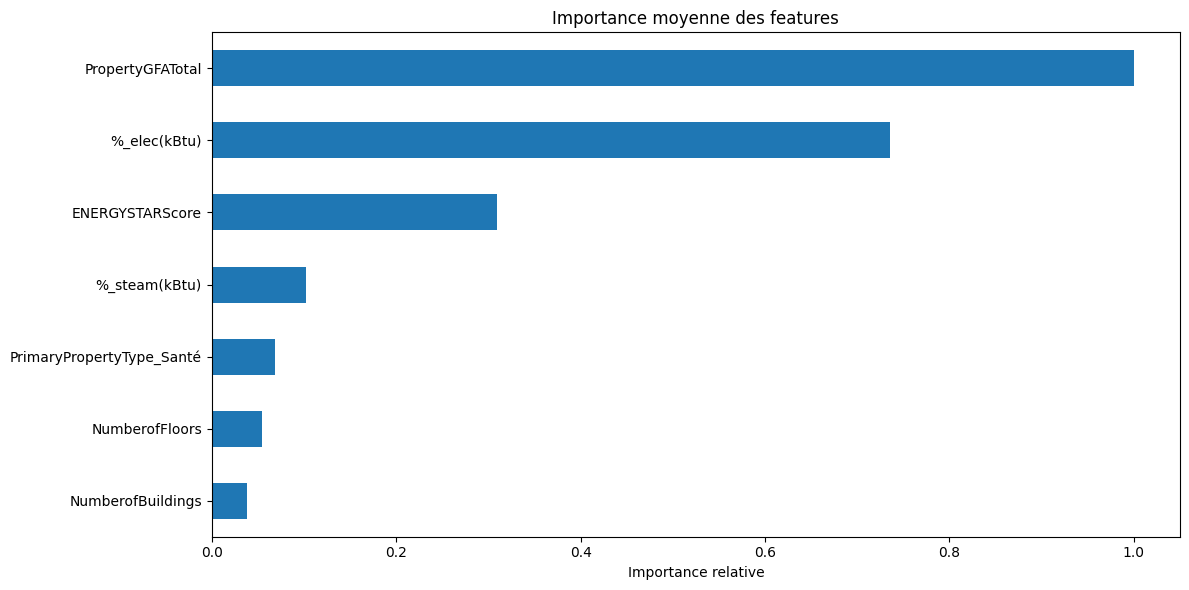

In [2998]:
models=[ridge,lasso,elastic_log]
model_names=['Ridge','Lasso','ElasticNet']

def analyze_feature_importance(models, model_names, feature_names, threshold=0.01):
    importance_summary = pd.DataFrame()
    
    for model, name in zip(models, model_names):
        # Normaliser les coefficients
        normalized_coef = np.abs(model.coef_) / np.abs(model.coef_).max()
        importance_summary[name] = normalized_coef
    
    importance_summary.index = feature_names
    
    # Calculer le score moyen d'importance
    importance_summary['Importance_moyenne'] = importance_summary.mean(axis=1)
    
    # Identifier les features importantes
    important_features = importance_summary[
        importance_summary['Importance_moyenne'] > threshold
    ].sort_values('Importance_moyenne', ascending=False)
    
    print("\nFeatures importantes (importance > {}):".format(threshold))
    print(important_features)
    col_num_sel=list(important_features.head(6).index)
    # Visualisation
    plt.figure(figsize=(12, 6))
    importance_summary['Importance_moyenne'].sort_values().plot(kind='barh')
    plt.title('Importance moyenne des features')
    plt.xlabel('Importance relative')
    plt.tight_layout()
    plt.show()
    
    return importance_summary,list(col_num_sel)

# Utilisation de la fonction
importance_analysis,_ = analyze_feature_importance(models, model_names, col_num_sel_regu_energy)

ENERGYSTARScore EST ARRIVE A LA TROISIEME PLACE EN CE QUI CONCERNE LA FEATURE IMPORTANCE DANS LE MODELE DE REGRESSION REGULARISEE

## SVR 

In [2999]:
DF_cleaned_Energy=DF_cleaned.loc[~DF_cleaned['ENERGYSTARScore'].isna()]
DF_cleaned_Energy.shape

(978, 37)

In [3000]:
_,_,_,_,svr_log_age,sclX_age,sclY_age=\
        svr_reg(DF_cleaned_Energy,col_num_sel_svr,TARGET,'log_target_feature',['PropertyGFATotal']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,True,best_params_svr)

Score R² train : 0.58
Score R² test : 0.73
Score MAE train : 8.56e+01
Score MAE test : 5.34e+01
Score MAPE train : 53.31 %
Score MAPE test : 48.80 %
Score MSE train : 2.40e+05
Score MSE test : 2.34e+04


In [3001]:
_,_,_,_,svr_log_age,sclX_age,sclY_age=\
        svr_reg(DF_cleaned_Energy,col_num_sel_svr_energy,TARGET,'log_target_feature',['PropertyGFATotal']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,True,best_params_svr)

Score R² train : 0.63
Score R² test : 0.86
Score MAE train : 7.53e+01
Score MAE test : 3.82e+01
Score MAPE train : 36.36 %
Score MAPE test : 32.39 %
Score MSE train : 2.12e+05
Score MSE test : 1.18e+04


ON OBTIENT D'EXCELLENT RESULTATS NOTAMMENT SUR LA MAPE

In [3002]:
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler


X=DF_cleaned_Energy[col_num_sel_svr_energy]
y=DF_cleaned_Energy[TARGET]

X['PropertyGFATotal']=np.log(X['PropertyGFATotal'])
y=np.log(y)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Scaling des données log-transformées
scaler = sclX_age
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaling de y aussi
scaler_y = sclY_age
y_train_scaled = scaler_y.transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()




# Calcul des permutation importances pour le SVR
result = permutation_importance(
   svr_log_age, 
   X_test_scaled,
   y_test_scaled,
   n_repeats=10,
   random_state=42
)

# Création d'un dictionnaire avec les importances moyennes
importances = result.importances_mean
feature_names = X_test.columns
importances_dict = dict(zip(feature_names, importances))

# Tri par importance décroissante
sorted_importances = dict(sorted(importances_dict.items(), key=lambda x: x[1], reverse=True))

col_num_sel_svr_energy_2=[]
col_num_sel_svr_energy_2=list(sorted_importances.keys())[:6]

# Affichage des résultats avec les écarts-types
for feature, importance in sorted_importances.items():
   std = result.importances_std[list(feature_names).index(feature)]
   print(f"{feature}: {importance:.4f} (±{std:.4f})")
   

PropertyGFATotal: 1.2232 (±0.0706)
%_elec(kBtu): 0.7898 (±0.0628)
ENERGYSTARScore: 0.1467 (±0.0186)
PrimaryPropertyType_Logistique et Stockage: 0.1441 (±0.0143)
PrimaryPropertyType_Education et Services Communautaires: 0.0286 (±0.0046)
NumberofFloors: 0.0137 (±0.0067)
%_parking: 0.0064 (±0.0032)
%_steam(kBtu): 0.0061 (±0.0035)
PrimaryPropertyType_Immobilier Commercial: 0.0048 (±0.0011)
PrimaryPropertyType_Santé: 0.0032 (±0.0019)
ZipCode: 0.0015 (±0.0016)


ICI AUSSI ENRGYSTARScore SE HISSE A LA TROISIEME PLACE

ON VA VOIR SI L'ON PEUT REDUIRE LE NOMBRE DE FEATURE NECESSAIRES SI L'ON UTILISE ENERGYSTARScore

In [3003]:
_,_,_,_,svr_log_age,sclX_age,sclY_age=\
        svr_reg(DF_cleaned_Energy,col_num_sel_svr_energy_2,TARGET,'log_target_feature',['PropertyGFATotal']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,True,best_params_svr)

Score R² train : 0.53
Score R² test : 0.87
Score MAE train : 8.39e+01
Score MAE test : 3.97e+01
Score MAPE train : 38.69 %
Score MAPE test : 33.87 %
Score MSE train : 2.68e+05
Score MSE test : 1.09e+04


# CONCLUSION

JE RECOMMANDE D'UTILISER LE MODELE SVR CAR IL OBTIENT UN R2 AUSSI BON QUE LA REGRESSION REGULARISEE MAIS AVEC UN MAPE BIEN MEILLEUR.

JE CONSEILLE LES HYPERPARAMETRES SUIVANTS :

- kernel : rbf

- C : 1

- epsilon : 0.01

- gamma : 0.01

JE RECOMMANDE D'UTILISER LA FEATURE ENERGYSTARScore POUR DES RESULTATS OPTIMAUX ET UNE QUANTITE DE FEATURE NECESSAIRE REDUITE

VOICI LES FEATURES QU'IL FAUDRAIT RECUPERER :

- PropertyGFATotal

- %_elec(kBtu)

- PrimaryPropertyType_Logistique et Stockage

- PrimaryPropertyType_Education et Services Communautaires

- NumberofFloors

DE PLUS, IL SERA NECESSAIRE D'APPLIQUER LA TRANSFORMATION DE LA TARGET AINSI QUE LA TRANSFORMATION DE LA FEATURE PropertyGFATotal AVEC LA FONCTION LOG 